About this notebook

In [1]:
from sklearn.datasets import load_iris

iris= load_iris()
x= iris.data
y=iris.target

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)


In [15]:
from sklearn.model_selection import train_test_split
# 50% split of data for testing and training

X1, X2, y1, y2 = train_test_split(x, y, random_state=0,
                                 train_size=0.5)

In [17]:
model.fit(X1, y1)
y2_model = model.predict(X2)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# evaluate teh model 

accuracy_score(y2, y2_model)

0.9066666666666666

#### Cross Validation #### 

Instead of splitting the data between trainig and test, which leaves less data for the model to train on, we can do cross validation.   


**Two-Fold Cross Validation**

In [24]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

**5-Fold Cross Validation**

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5)
# we asigned KNneighborsClassifier to model

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

**Leave One Out**

In this cross validation scheme, the model will train on all the available data except one, but it will repeat the training m-times (as many training data there is).  

The evaluation of the one test data will score 0 or 1. The average of all the runs is the performance of the model. 

In [33]:
from sklearn.model_selection import LeaveOneOut
m =len(x)
# input to leaveOneout is the number of training data) 
for _ in range(m):
    scores = cross_val_score( model, x, y, cv=LeaveOneOut())


In [34]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
#average score of model 
scores.mean()

0.96

***

![Validation Curve from book: Python Data Science Handbook by  Jake VanderPlas](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAecAAAFwCAYAAACCbrOvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd8FNX+//HX7G6yKQQSQgiBhNAJvYqAFFF6EfALIiII%0AwgWuKCg/BeViAS4oggIRBFTAi4KXIkWKdKmX3lU6SC8hvW+Z+f0xZiEkQEiyqZ/n47GPsLPJnJPJ%0AknfOmVMUTdM0hBBCCJFnGHK7AkIIIYRITcJZCCGEyGMknIUQQog8RsJZCCGEyGMknIUQQog8RsJZ%0ACCGEyGMknEWu6d+/P61atXro62fOnCEkJIQ1a9Zk6HzLli0jJCSEuLg4AF555RXefPPNh36+3W4n%0AJCSEhQsXZrjOFouFCRMmsH37dsexli1b8umnn2b4HFn1888/06dPH55++mkaNWrEyy+/zLp163Ks%0A/Mw6efIkw4YNo3HjxtSqVYvWrVszceJEIiIiMnyOvXv3EhISwunTp51Y06yZOXMmS5YscTx/3PtQ%0AiPSYcrsCovDq1q0bH3zwAceOHaNu3bppXl+zZg1eXl60bds2w+dUFMXx7wkTJmAyZe9b/NatWyxa%0AtIimTZs6js2dO5dixYplaznpsdlsDBs2jP3799O7d28GDx6M0Whk+/btvPvuu/z++++MHj3a6fXI%0AjN9//50+ffrw7LPPMnHiRLy8vLh48SJz585l165drFy5End39wyd6/6fcV5jt9uZOXMmY8aMcRxz%0AxvtQFHzyjhG5pl27dowfP57169enG87r16+nQ4cOmM3mTJ2/YsWKWa1iGumt2RMSEpLt5aRn1qxZ%0A7N69m3nz5tG4cWPH8WbNmlGiRAlmzJhB+/btqVOnTo7U50ksXLiQ8uXLExoa6jjWqFEj6tatS/fu%0A3Vm7di09e/bMxRpmj/TeH854H4qCT7q1Ra5xd3enbdu2bNiwIc1rBw8e5ObNm3Tr1s1x7NixYwwa%0ANIinnnqKWrVq0aFDB5YtW/bQ8/fu3TtVd+LFixd5/fXXqVevHu3atWPPnj1pvuZRZVy5coV27dqh%0AKArDhg3j9ddfB6BFixapurWvXr3K8OHDadq0KQ0aNODNN9/k6tWrjtenT59Or169WLNmDe3ataN2%0A7dr07NmT48ePP/R7sVgsLFq0iNatW6cK5hT9+/enT58+jlbltGnTeOqpp1J9zu+//05ISAhHjhwB%0A4L333mP48OG888471KtXj+HDh9OqVSvGjx+f6uuioqKoWbMmq1atAiA+Pp5x48bxzDPPUKdOHV57%0A7bXHdjOHh4c/9A+b0aNHU7ly5VTlffDBBzRt2pSGDRsyaNAgzp8/n+rr/vjjD3r37k3t2rVp06YN%0AK1asSPX63bt3effdd2nUqBH16tVj2LBh3Lhxw/F6ys9g5cqVtGnThrp16zJw4EDu3r3LokWLePbZ%0AZ3nqqacYPXo0FovF8XUXL15k+PDhNG7cmJo1a/L8888zZ84cQG8116xZE0VRmDRpEu3atQPSvg8z%0A8v0JIeEsclW3bt0ICwvj0KFDqY6vWbOGsmXLUr9+fQCuX7/Oa6+9RrFixQgNDWXWrFkEBwfz0Ucf%0AceHChXTPfX/3Z2xsLH379iUmJoZp06YxaNAgPvjgg1Sf87gyAgICmDFjBpqmMWrUKMaOHZumnJs3%0Ab9KjRw+uX7/O+PHjmTRpEpcvX6Z3796p7q2eP3+eWbNmMWLECL766isSEhJ455130g0wgBMnThAT%0AE0OLFi3Sfd3NzY2xY8dSu3ZtR53S6/598Ni2bdswmUx8/fXX9O3bl44dO7J58+ZUn7Nx40ZMJhNt%0A27ZF0zSGDh3Kpk2bGDlyJKGhoZhMJvr27Zsq/B7UokULzp49S9++fVm5cmWqz+3fv7+j58Rms9Gv%0AXz/27t3LqFGjmD59OvHx8bz++uuOsQSapvHpp5/SuXNn5s6dS8WKFRk7dqzjfZCYmMirr77KiRMn%0A+OSTT5gyZQo3b97k1VdfdZwD4Ny5c8yfP58xY8Ywfvx4jhw5wquvvsqaNWsYP348w4YNY/Xq1fz4%0A448AxMXF0bdvX+Li4pgyZQrffvstjRo1Yvr06ezatQuj0cjixYvRNI3+/fs7egnuv+YZ+f6EAOnW%0AFrmscePGBAQEsG7dOho2bAiA1Wpl48aNDBgwwPF5586do2HDhkydOtXxy65mzZo0bdqUQ4cOPbbr%0AcPny5cTGxrJ69WpKlCgBQJEiRXjnnXeeqIxq1aoBEBwcTIUKFdKUM2/ePFRV5fvvv8fLywuAhg0b%0A0rp1axYsWMD/+3//D4CEhASmT5/u6BK3WCwMHz6cs2fPUrVq1TTnvX37NoqiULp06Qxc1Yd7MPxV%0AVWXcuHF4eHgA4OXlxfz58zl06JDj57FhwwZatmyJh4cH27dv59ChQ/zwww+O15s1a0aHDh2YM2dO%0AmlZ3in79+nHnzh0WLlzIoUOH0DSNwMBAnn/+eQYOHEjJkiUB2Lp1K+fOnWPJkiWOPzRCQkLo1asX%0Af/75p+N8b775Jn369AGgatWqNG3alAMHDlCxYkVWrFjBtWvX+PXXXwkKCgL099mzzz7L4sWLGTx4%0AMKCH+Oeff+74mW7dupXNmzezcOFCSpYsSYsWLdiwYYOjR+PSpUtUqFCB6dOnU7RoUcd5N27cyMGD%0AB2nevLnjlkLp0qXT/Tk+7vtr1KhRBn+SoqCTlrPIdV26dGHTpk2O4NixYwexsbF07drV8TnPPvss%0A8+bNw2q1cvr0aTZs2MC3336Loiipuh0f5ujRo4SEhDiCGaBNmzapWjVZLQPg8OHDNGnSxBHMAL6+%0Avjz99NMcPHjQcczV1TXVvWp/f39AD4z0GAz6f9Xs3qemRIkSjmAGPSgqVKjguNUQERHBgQMH6NKl%0ACwD79+/H09OTevXqYbfbsdvtaJpG06ZN2bdv30PLURSF9957j507dzJx4kQ6depEUlISCxcupFOn%0ATpw6dQrQbyt4e3s7giuljlu3bnUEl6IoqcYoFC9eHDc3N2JjYx11rFChAqVLl3bU0c3Njfr167N3%0A717H1xmNRkcwp5RTokQJxx8KAN7e3o7z1qpVix9++AEPDw/Onz/Pli1bCA0NRVXVDL8/MvL9CQHS%0AchZ5QPfu3Zk7dy779u2jSZMmrFu3jkaNGhEQEOD4HLvdzqRJk1i+fDk2m42goCBHyy0jgRUdHY2P%0Aj0+qYyaTCW9v72wrI6Wc9Aa3lShRgmvXrjmePzjIzWAwoGkaqqqme94yZcqgadoju45v377tCPmM%0A8vX1TXOsc+fOLF68mLFjx7Jx40Y8PDwc3elRUVHExcVRo0aNVF+jKApubm6PLc/Hx4cXX3yRF198%0AEdC71UeNGsXnn3/OggULiIqKSrdOD3qwLEVRHNcuKiqKs2fPplvHSpUqOZ7f/0dJiseNGJ81axYL%0AFiwgPj6eMmXKUL9+fUwmU4bfHxn9/oSQcBa5rly5ctStW5f169dTu3ZtfvvttzTdozNnzmTlypV8%0A8cUXNG/eHLPZTFxcHMuXL89QGd7e3ly/fj3VMU3THK2i7CgjpZzw8PA0x+/evZvqD4EnVaNGDYoV%0AK8auXbvo0aNHmtctFgsdO3akc+fOjBs3LlVYpUhISMjQNKTOnTsTGhrK4cOH2bhxI61bt8bV1RXQ%0Au71LlizJnDlz0gTSw859/fp1evXqxSeffELr1q1Tvfbcc8/RrVs3Nm3a5Dh/evOe9+3bR3Bw8GPr%0AnnKOGjVqMGHChDR1zOzIf9BvjcycOZMJEybQoUMHPD09AXj66aczfI7HfX/3/0EqCjfp1hZ5Qteu%0AXdm2bRvbt2/HaDSmmdt8/PhxateuTevWrR2/YHfu3AlkrFX79NNPc/r06VSt1127dmGz2Z6ojJTu%0A5YdJ6Tq9P/TDw8PZv38/DRo0eOTXPio4jUYjffr0YcuWLezfvz/N63PnziUhIcHR/VykSBESEhJI%0ASEhwfM793eqPEhQURO3atVm9ejWHDh2ic+fOjtcaNGhAeHg4RYoUoUaNGo7HypUrH7pYTEpr/scf%0Af0y3Z+DSpUtUqVIFgHr16hEZGcmJEyccr0dGRvKPf/wjVZf0ozRo0IBr164RGBiYqo7z5s1jx44d%0AGTpHeo4fP05gYCA9evRwBPOJEyeIjo7O8PsjO74/UThIOIs8oVOnTsTGxhIaGkq7du3SdFvWqlWL%0AI0eOsHjxYg4ePMi3337L2LFjMRgMJCUlPfb8L774IqVLl2bo0KFs3ryZVatW8dFHH6VaHCIjZaQM%0ABNqzZw9nzpxJU86AAQNQFIXXXnuNzZs3s3HjRl5//XXc3d159dVXH1nHx/2RMXjwYOrWrcuQIUOY%0AMmUKu3fvdnQLz549m8GDBzu64Vu0aIGqqowZM4b9+/czf/58li5d+tjrlKJTp078/PPPeHt7p1pw%0ApXXr1oSEhDBo0CBWrVrFvn37+Pjjj1m0aFGq6VD3M5lM/Otf/+LAgQO88sorrFq1ikOHDrFlyxaG%0ADRvG4cOHefvttx3nr1KlCm+//TZr1qxhx44dvPnmm5QuXZr27dtn6Dq99NJLeHp60r9/fzZs2MD/%0A/vc/hg8fzqZNm6hevXqGr8GDatWqxbVr15g9ezYHDx5k8eLFvPHGG6neH4qiUKRIEQ4dOpQqgO+/%0Afo/7/oQA6dYWeUTRokVp1aoVmzZtYuLEiWleHzp0KOHh4Xz11VdYrVaCg4MZN24cK1as4OjRow89%0Ab0pr1M3NjR9++IHx48czevRovL29effdd1OVlZEyihYtysCBA1m8eDHHjh1jxYoVqaYtlSlThsWL%0AF/P5558zevRoTCYTjRs3ZubMmfj5+aWpV3p1fRg3NzcWLFjAwoULWbduHUuXLsVgMFCpUiVmzJhB%0AmzZtHJ9buXJlJkyYwNy5cxk8eDB16tQhNDSUl19+OUNlduzYkc8//5z27dun+hyj0ciCBQuYOnUq%0AU6ZMIT4+nnLlyjF58mReeOGFh9a9Q4cO+Pv7M3/+fL744guioqIoWrQoDRs2ZPny5Y57wS4uLnz/%0A/fdMnjyZf//734C+WMnnn3/uuEf8sGuXcrxIkSKOn8HHH3+M1WqlSpUqzJ49myZNmmT4ej+oZ8+e%0AXL58mcWLF/PNN98QGBjI4MGDOX36dKr34PDhwwkNDeXgwYOO1nBKWRn5/oQAULTsHv4phBBCiCyR%0Abm0hhBAij5FwFkIIIfIYCWchhBAij5FwFkIIIfKYPBPOMi5NCCGE0OWZqVSKohAWFvv4TxSZ5ufn%0AJdc4B8h1dj65xs4n1zhn+Pl5pXs8z7SchRBCCKGTcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAlnIYQQ%0AIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAln%0AIYQQIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHyGAlnIYQQIo+RcBZCCCHy%0AGAlnIYQQIo+RcBZCCCHyGAlnIYQQIo8x5XYFhBBCiPxA08Bq1R82G9hsCna7ftxuv/dQVbDblVTP%0AU75e0+79W1Ggdev0y5JwFkIIUaBpGiQn64+kJOWBj5CcrJCUpB+zWMBi0YNX/6g/t1oVrNbsr5uE%0AsxBCiALDZoO4OEhIUEhISPmo/zs+/v5jkJioOFqv+YWEsxBCiDwjpZUbF6cQG5vy8cF/KyQm5nZN%0AnUvCWQghRI6yWiE6WiEmBqKiFKKiFGJi9I/R0Xp3c2En4SyEECLbWa0QGakQEXHvER2tEB2tt4DF%0Ao0k4CyGEyBRNg9hYHOEbGakQHq5/jIlRHCOTxZOTcBZCCPFYiYkQFqZw967+CAszcPeudEE7i4Sz%0AEEIIB1WFu3cVrl+Hs2eNfwexIl3ROUzCWQghCim7XQ/i27f1x61bBsLCFGw28PSE+Hhjblex0JJw%0AFkKIQkBV9W7pmzdTwlgPYrs9t2uWv5hM4OICLi4aJhMYDGA06g+DQUv1XD+mPxQl5aGh/N0JYXzE%0A3z4SzkIIUQDFxcHNmwZu3NAD+eZNg1NWuMovTCZwc9Mwm8HNDcxmDTe3e8fMZg13d3B1BVdX7e8A%0ATv1vFxc9aHOkvjlTjBBCCGex2+HOHYUbNxRu3DBw86Y+Z7igc3ODIkU0PD01PDxwfPTw0P5+4Pjo%0A4oKjxZofKJomg92FECI/sdng+nW4fFl/XL2qr/9cUCgKFCkCRYvqDy+ve/++/5iLS27X1HnyVDiH%0AhcXmdhUKND8/L7nGOUCus/MVtmtsscCNGwpXrxq4dk3vorbZnFump6eZ+HjnzZNycwNvb41ixVI/%0AvL01ihbVu6ELAz8/r3SPF5JvXwgh8g+bTQ/jy5cNXL5s4Nat/LdxA+gB7OOjUbz4vUdKILu55Xbt%0A8jYJZyGEyGWapt8zvnxZD+Rr1/LP4C1F0VvA9wdw8eIaPj4anp756z5vXiLhLIQQuSA6GkfL+K+/%0ADPlilyUPDw0/v3uPEiU0fH01XF1zu2YFj4SzEELkALsdrl1TuHjRwMWLBsLD826T0mAAf3/w8FAp%0AWVJ1BLGnZ27XrPCQcBZCCCeJi4NLl/Qw/usvQ55ch9pohBIlNPz9Vfz9NUqV0oO4dGkzYWFOHnUm%0AHkrCWQghsommwc2bChcu6IF8+3beax37+mqULq1RurQexiVKaIVmZHR+Ij8SIYTIApsNrlxROH/e%0AwLlzBuLj804gu7lB6dIqpUtrBASoBATIKOn8QsJZCCGeUHIyXLxo4Px5vYWcV7qrfX01AgPVv1vG%0A+qhpGS2dP0k4CyFEBsTFwYULeuv48mVDrm8YoSjg56cRFKQSGKiHsgzYKjgknIUQ4iHi4+HcOQOn%0ATxu4etVAbq6naDBAqVJ6CAcFqZQpI13UBZmEsxBC3CchAc6fN3DqlB7Iubkyl6+vRrlyKsHBKkFB%0A+u5JonCQcBZCFHqJiXognz6td1nnViAXKaIRHKwRHKxSrpxKkSK5Uw+R+ySchRCFks2mB/Kffxq4%0AdCl37iGbTFC2rB7E5crpq23JAC4BEs5CiEJE0+DqVYU//zRw5owxV0ZZFyumUaGCSoUKKmXLagV6%0A20OReRLOQogCLzxc4Y8/9PvI0dE52zQ1GCAwUP07kKV1LDJGwlkIUSDFx8Pp0wb++MPIrVs5m4Zu%0AblCxokqlSnqXtQzkEk9KwlkIUWCoKvz1l8KJE0bOn8/ZgV1eXhqVK+uBHBSkYTTmXNmi4JFwFkLk%0Ae1FRcPKkkd9/NxAbm3OtZF9fPZCrVNHXqZbuapFdJJyFEPmSzQZnzxo4ccLAlSuGHCvX31+jalWV%0AKlXsFC+eY8WKQkbCWQiRr9y5o3DwIOzd60pSUs6U6eenERKiUrWqBLLIGRLOQog8z2aDM2cMHD9u%0A4No1A56eOD2YfX1TAlmlRIlcXLdTFEoSzkKIPCsqCo4fN3LypIGEBOff0PXx0ahWTQ9kPz8JZJHa%0AzZs3CAgonSNlSTgLIfIUVYVLlxSOHTNy8aLzN5twc4Nq1exUr65vtSiDukR6bt26xRtvDOLHH5fi%0A6en8dVUlnIUQeUJCApw4YeT4cecvFGI0QqVKKtWr64uDyLQn8SiqqjJx4sfcvRvGlCmf8sknE51e%0ApoSzECJXhYUpHD5s4M8/jdhszi0rKEgP5CpVVNzdnVuWKDimTZuCq6sZRVFISkrk+++/o3//QU4t%0AU8JZCJHjNA0uXlQ4dMjI5cvOnQZVtKhGzZoqNWva8fZ2alGiAPrqqy9p3LgpFSpUpFevbkyYMJkt%0AWzayePEPvPJKX6eVK+EshMgxFgv88YeBw4eNREQ4r+vaaITKlfVALldOw5Bz06BFAfPqq/3x8SnO%0ArVs3Hcc6dOhMRES4U8uVcBZCOF1MDBw5YuTECaNTp0CVKKFRq5Y+uMvT03nliMLDxyf9ie3Fi/s6%0AtVwJZyGE09y+rXDggJEzZ5y3zrWrqz7aulYtlYAAGW0tCgYJZyFEttI0uHxZD+W//nJef7Kfn0a9%0Aenor2dXVacUIkSsknIUQ2UJV9bWuDxxw3haNRiNUrarSujWYzVZpJYsCS8JZCJElVqs+yOvgQSOR%0Akc5Jy2LFNOrUUalVy46nJ/j5QViYU4oSIk+QcBZCZEpSEhw9auTwYecsrakoUKGCSr16MuJaFD4S%0AzkKIJ5KQAIcPGzlyxEhycvaf32yGWrXs1Ktnx8cn+88vRH4g4SyEyJD4eDh40MixY0Ysluw/v7e3%0ARv36+qhrszn7zy9EfiLhLIR4pLg4OHDAyPHjRqzW7D9/2bIqDRqoVKyoSte1EH+TcBZCpCsmRg/l%0AEyeyf81roxFCQlQaNrTj7y9bMwrxoDwVzn5+XrldhQJPrnHOyM/XOToadu2Co0fBbtfvAWdXN7Ob%0AGzz1FDRqBF5ZvET5+RrnF3KN77FYYgAoUaIIrjkwsT5PhXNYWGxuV6FA8/PzkmucA/LrdY6Lg337%0A9O5ruz17z+3lpdGwoZ3atfX7yUlJZGkZz/x6jfMTucapRUTEA3D3bhwuLi7Zdt6H/QGUp8JZCJHz%0AEhJg/34jR49mf/e1r69Go0b6Kl6yZ7IQGSfhLEQhlZSkj74+fDj7R18HBqo0amSnYkVZ61qIzJBw%0AFqKQsVj0HaIOHMj+HaIqVdJDOTBQBnkJkRUSzkIUEjYbHD1qYN8+E4mJ2XdeRdHXu27c2E7JkhLK%0AQmQHCWchCjhV1de+3rPHSExM9vUxK4o+HapJEzslSkgoC5GdJJyFKKA0DS5dUtixw0RYWPaFssEA%0A1aurNG5so3j6+9ALIbJIwlmIAujmTYUdO4xcuZJ9S24ZjVCjhp3Gje14e2fbaYUQ6ZBwFqIAiYyE%0AXbtMnD6dvaFcq5YeykWLZttphRCPIOEsRAEQHw979+qbUqhq9pxTUaBmTZUmTWzSUhYC0LScG1sh%0A4SxEPmazwaFDRvbty765yikDvZ55Ru4pC5GiVKkAdu06mGPlSTgLkQ9pGpw5Y2DHDiPR0dk32KtK%0AFZWmTWVKlBC5TcJZiHzm1i2FbduMXLuWffeVK1RQadbMTqlSEspC5AUSzkLkE3FxsHOnid9/z75Q%0ADgpSad5cVvQSIq+RcBYij7Na9TWw9+83YrVmzzlLlNBo2dJGhQqy9rUQeZGEsxB5lKbBqVMGdu7M%0AvpW9vLw0mjWzU6OGiiH7GuBCiGwm4SxEHnTnjsLWrUauXs2eBHVzg0aN7DRoYCcbt6IVQjiJhLMQ%0AeUhSEuzZo++tnB3zlY1GqF/fztNP2/HwyPr5hBA5Q8JZiDxA0+D33/WpUQkJ2dOFXb26SvPmNooV%0Ay5bTCSFyUIEMZ5vNxoED+zAYDDRs2AiTqUB+m6KAuH1bYcsWE9evZ08oBwaqPPecTIsSIrvcvXuX%0A27dvERxcDrPZjNFoxODkQRv5PrUsFgszZkzlxo3rTJs2C4vFwtChAzh//hwAwcHlCA2dg4+PLHUk%0A8pbERNi9W19yMztWBSxWTOPZZ+1UqaLKCGwhssGJE8eYPn0q58+fBWDatFnY7XY+/XQ8b775Ds8/%0A38ZpZef78ZoLFnzLL7+sxN+/FAAbNqzj3Lmz9OjRiw8++Ijw8HC++25OLtdSiHs0DU6cMPDdd64c%0APZr1YHZ1hRYt7AwcaKVqVQlmIbLDqVN/8Pbbw0hISKBnz96O40WLFsVkMjF+/Fj27t3jtPLzfct5%0A27bNdO7cldGjxwKwffs2PD2L8MYbIzCZTNy4cZ01a1bx3nu5XFEhgLAwhU2bsqcLW1H03aKaNbNT%0ApEg2VE4I4fDtt7MpXbo08+b9QGJiEkuXLgYgJKQ633+/mH/+cyA//LCAJk2ecUr5+T6cw8LuUKNG%0ALQCSkpI4duwITZs2c9xn9vf3JzY2JjerKARWK/zvf0YOHsyeUdhly6q0amXH31/uKwvhDL//fpL+%0A/QdiNruRlJSU6jVPzyK88EJ3vvturtPKz/fh7ONTnIiIcAD27/8fVquFpk2bOV4/f/48JUr45Vb1%0AhODiRX3AV1RU1lvLxYpptGplp3Jl6b4WwtlcXFwf+prFYkHTsml/1nRkOpxjY2Px8vLKzrpkSv36%0ADVm69CdcXV1ZsWIZbm7uNG/+LLGxsaxbt5pffllJt24v5nY1RSEUFwfbtpk4fTrrQztMJnj6aTuN%0AGskiIkLkhOrVa7B58wZ69nw5zWuJiYmsWbOKkJAaTis/U781IiIi6NOnT5qmfm4YPvz/UalSZWbN%0AmkFUVBSjR/8LLy8vLl26wKxZM6hevQYDBgzO7WqKQkRV4ehRA/PmuWZLMFeqpPL66xaeeUaCWYic%0AMmjQUM6dO8Obbw7m11/XoigKf/75O8uW/Zf+/Xtz48Z1XnvtdaeVr2jak40VtdvtDB48mD179tCp%0AUye++OKLbKtMWFhspr82MjKSIkWK4PL3b6/ExEQuXrxAjRo1s6t6+Z6fn1eWrrF4vNu3FfbtK8KZ%0AM8lZPpePj8bzz+ubU4jU5L3sfHKN4eDBfUyZ8ik3b95IddzXtwRvv/0uzz77fJbL8PNLvwf6icLZ%0AZrMxZ84cnn/+efr168d3333H3r17GTp0aJYrCFkL50eJjIzEx8fHKefOT/LbfzZVJc3mDJpGnrzX%0AarPpA74OHDDi7m4mPj7z4eziAo0b23nqKTuyfk768tt7OT+Sa6zTNI2zZ89w/fo1VNVOqVKlCQmp%0Alm2LWz0snJ/o7ElJSbz22mt4eXlhMpmoU6cOAQEBWCwWXF0ffuPc2VatWs7+/XtJSEhMdYPebreT%0AkBDPpUsX2b59X67VTzw5m02/z2qxwI0bCtHRCpUqqXh65nbN0rp+XWHDBhPh4Vn/q6FqVZVWrWwU%0ALZoNFRNCZMmtW7dYuXIZffq8RtWqIQD8+OP3bN++lT59+jl1casnCuci6UymLFmyZLZVJjMWLfoP%0Ac+bMxMXFFU9PT6Kjo/DzK0lMTDRJSUmYzWZ69Eh7Q1/kXaqqB3NcHLz6qjtXrhiIjFTw9tZ44w0L%0AbdrYKFcu97t6LRbYtcvIkSNZX0jE21ujdWvpwhYir7h48TxvvTWEuLg4WrduR9G//2KOjY1lxYpl%0AbNmyka/yEh53AAAgAElEQVS//o7Spcs4pfx8v0LY+vVrqFy5CmvXbmLOnPlomkZo6Bw2bNjOyJGj%0AsVgsct85nzEY9N2ZXnzRA6MRPvkkmZ9/TqBbNxtjx5qZPt2V2Fzubbt0SWHBAhcOH85aMBuN0KSJ%0AnQEDrBLMQuQhc+bMxMPDkx9/XEblylUcx//5z7f44YcluLi4MHv2V04rP9+H882bN2nfvhMeHp6U%0AKROIl1dRTpw4htFopHv3Hjz3XBuWLv0pt6spntDJkwbCwxXefttC58426tfXd1gCaNvWzo0bBhIS%0Acr5eiYnw668mli1zITo6a93YgYEqr71mpXlzGYUtRF7zxx8neemlVwgKKpvmtTJlAnnxxZc4duyI%0A08rP9+FsMpnwuG+j2sDAIMemF6DPg7569UpuVE08AZueu47Vs27dMnDtmkLNmnYMBliyxETv3u68%0A/76F8uVV3nnHjatXc/bte+6cgfnzXTh5MmvlurlB+/Y2eve2UaKEtJaFyIvsdpXk5IdPF9Y0jeTk%0ArM/KeJh8H87BweU4efKE43nZssGcOXPK8Tw2Ngar1ZIbVRMZpGn37jG/+66Zs2cNVKqkUry4xpYt%0AJlasMDF8uBtjxlh45x0Lvr4ax44ZOHYsZ96+CQmwZo2JlStNxMdnrbVco4bKwIEWateWFb6EyMtq%0A1qzF6tUriU3nHlpCQgJr166ienXnLUKS7ydqdOrUhS++mIzVauW998bQrFkLPvzwfebP/4bg4PIs%0AXfoTlSpVefyJRK5IGZVts0H//u6EhyuYzRaKFdOoUEHj44/NxMQofPCBhREjLKgqnD5toGRJjeBg%0A57c6z59X2Lgx66FcvLg+4CsvDGQTQjzegAGDeeutwfTr14s2bdoTGBiEoihcv36NLVs2EhERzpgx%0AHzut/Hwfzt269eDOnTusWLEUk8lEy5bP0bRpMxYs+BYAT09P/vnPt3K5luJhTCaIj4evvnLF3R3G%0Aj092hO5XXyXSrZsHRYtqlCqlEhsLJ04YmTLFlfLlVRo1sjutXklJ+tKbv/+etda5waAvu9mkicxZ%0AFiI/qVGjJtOmzWLmzOn89NMPqV6rVKkyY8Z8TM2atZ1W/hOvEJaiSZMm7N27N7vrk2k2my3VpPCD%0ABw8SHR1NvXr18PX1zcWaicc5cQLq1tX//eWX8Pbb9147dw5efRVu34YbN6BcOShZEn77TV+sw27X%0ARzxnpwsXYPVqiMniZmYBAdC1K5QqlT31EkLkjoiICK5fv46qqgQEBOTIFOI8Fc6yGo1z5ZUVf9Jb%0A+evECQNdu3pQqpTG5MlJtGhxr1UcEQHXrxs4e9ZA2bIqDRqoGAz3usSzi8UC27cbOXYsa2lfrJiZ%0AOnUSaNTInub7FNkjr7yXCzK5xjkjW1YIywt69uzKiBEjadaspeP54ygKLF262tlVExlw/z3mW7cU%0AkpKgaFGoXVtl5coEunb14MsvXfH0TKZBA33odvHiULy4Sq1a96/+lr3BfOWKvspXVrd1DApS6dMH%0AVNV5Xe5CiJyxb9//2Lz5V8LDw1HT2YhdURRmzJjtlLLzXTiXKlUKNzd3x3N/f38UGfaaL6QEalwc%0A/OMf7ly6ZODuXYUiRTRGjUrmlVdsrFmTQJcuHkyYYGbs2GQaNtT/Qzy4pnZ2dWVbrfoqX1ldTMTV%0AFVq2tFG3roqvL4SFZU/9hBC5Y8WKZUyfPgUAH5/iOb5EtXRrFyJ5oZsqMRE6dfKgSBGNl16yYTRq%0A/PabiV9+MTFihIUPPrBw+LCBF1/0oGFDO+++a6FJE+e0Qm/fVli7NutrYpcvr9K2rY1ixfTneeE6%0AF3RyjZ2vsF/jl19+EQ8Pd6ZODaV4ceeNWyow3doZERcXh8Gg4OGRB3dJKOS2bDGhafDpp8nUqKG3%0Ainv3tlGpkivTprlSubJKjx42li9PoHNnD6pUMWV7OKsqHDhgZM8eI/YsnNrNDZ57zkaNGjJnWYiC%0A5s6d2wwfPtKpwfwo+TKcNU1j3749XLp0kTJlAnnmmRaYTCYOHz7ItGlTuHLlLwAqV67KkCHDaNSo%0Ace5WWDhcumTg9m2FMmX0YE4ZHDZqlIXTpw1MnGimZUs7Tz2lsnNnAhUrpr3PkxUxMbB+vYkrV7I2%0AUqtCBZX27W2ksxeMEKIAKFOmDJGREblWfr4L59jYWN57bwR//vk7KT3yISHVGDlyNO+9NwKz2Y3m%0AzVuiqhpHjhzkvfdGMH3619Sr1yCXa174pDfNyWzWsFoVbt0y4O2ttzhT7ie3bGlnxw4TMTHg56dv%0AnwjZNyr71CkDmzebSHr4inyPZTZDq1Y2atWS1rIQBVnfvgOYMWMqLVs+R4UKFXO8/Ez/ysvkreos%0AmzdvDufPn2XkyFHUr9+Q27dvMWPGFwwfPpTAwCBmzvyGokX1m38REeEMGTKA//73RwnnHJYSqElJ%0AsHu3kehohZAQlV69rMyc6crkya7Mm5eUZqpRmTJp92zOajAnJend6X/+mbXWctmyKh063Lu3LIQo%0AuE6cOIa7uwcDBrxCUFAw3t7eGB74hZUnR2t//fXX2VmPDNuzZxddu/4f3br1AKBs2XKMGPEuI0e+%0AyYsvvuQIZoDixX3p0qUby5cvyZW6Flb378fcpYsHNhucPWugUSM706Yl8eGHyYwa5caAAW6MGmXB%0A31/jxg2FxYtdqFRJxd8/+/7wu3pVYf16U5Z2kHJx0Udi16snrWUhCov9+/eiKAolS/qTnJzE7du3%0AcrT8TIdz/fr1s7MeGRYefpfy5cunOla+vN7lUKpUQJrP9/cvRUxMdI7UTegMBn2K0qBB7hQrpjFp%0AUjJms0ZiokKlShqlStkwGpOYONFMly4emM0axYpB0aIac+cmoSjpL1TyJOx22LPHyP79WZsiVaaM%0ARocOVooXz/w5hBD5z7Jlv+Rq+fnunrPVasXV1S3VMRcX098f026KqyhKupPHhXPduKFw5YrCiBEW%0AqldPuf56SsbHK2gabN8ez08/uZCcrODvr4/SNhqzfo85KgrWrHHh5s3MN3ONRmjWzM5TT8kqX0KI%0A9EVGRuLj4+OUc+e7cBb5g9Wq78lss6UOSJsNjh0z8MknZurUURkyxJrq9ayu/HXqlIFNm0xkZZvV%0AkiU1OnWy4ecnO0gJUZitWrWc/fv3kpCQiKbdv0KhnYSEeC5dusj27fucUna+DOeYmChu3brX/x8b%0Aq3dbR0ZGpDoOEBUVlaN1K4zSG5Xt6alvk7h1q5GOHa2k/HFpMkH58hphYXrLunLl1F+X2ZW/rFbY%0AutXIiROZXzpMUaBhQzvNm8sOUkIUdosW/Yc5c2bi4uKKp6cn0dFR+PmVJCYmmqSkJMxmMz16vOy0%0A8vPlr6DQ0C8JDf0yzfHx4z/MhdoUbild0ImJsHmziUuXDHTtaqVcOY0PP0xm6FA3KlVyZehQi+O+%0AbUICVKum4u2dPS3TO3cU1qzJ2kpfXl4aHTvacmSPaCFE3rd+/RoqV67CzJnfEBkZycsvdyc0dA6l%0ASgXwyy8rmTbtc2rUqOm08vNdOHfo0Dm3qyD+9uCo7NhYhbg4uHtXYfToZLp2tXHpkoXJk105c8bA%0Ac8/ZMZs1vv/eFQ8PqFcva2MBNA2OHzewbZsJmy3z5wkJUWnTxoa7++M/VwhRONy8eZOhQ4fh4eGJ%0Ah4cnXl5FOXHiGGXKBNK9ew+OHz/K0qU/0apVa6eU/8ThrKoq169fJyAgAFVVc3wx8DFjPs7R8sTD%0AGQz6Not9+rhTsqTG7NlJuLtrBAdrxMVBbCwMHGihalWVjz82s3u3iYAAleBgje+/T8RgyPyo7KQk%0A2LjRxJkzmR+tZTbD88/L8ptCiLRMJhMeHh6O54GBQZw/f87xvH79hnzzjfOmFGc4nG02G1988QU/%0A/vgjdrudjRs3MnXqVEwmExMmTEj1TYjC48YNhagohQ8/TCYkROXOHYUff3Th669dsNsVWre28ckn%0AyTRqZCcmRm9pBwZqKErmR2XfuKF3Y2dl7nKZMhqdOlnx9s70KYQQBVhwcDlOnjxB587dAChbNpgz%0AZ045Xo+NjcFqtTit/Aw3O2bMmMHu3buZP38+ZrMZgL59+/Lnn3/y2WefOa2CIm+LjVW4cMHA5csG%0AZs924R//cOPdd80EBmo0bGjnu+9cWLfOhK+vRvnyGkFBmmMe85MGs6bB/v1GFi92yXQwGwzQvLmd%0A3r0lmIUQD9epUxfWr1/D+PEfkpiYSLNmLTh+/Cjz53/D1q2bWbr0JypVquK08jP863HdunVMmTKF%0ABg3uLYPZsGFDJk2axBtvvMH48eOdUkGRt9WqpdK7t5UxY8y4u0NwsMoPPyTSsqUdV1c4edKDP/80%0A0K1b6q970q7sxET49VcT589nvhu7WDGNLl1slC4tg76EEI/WrVsP7ty5w4oVSzGZTLRs+RxNmzZj%0AwYJvAfD09OSf/3zLaeVnOJwjIyPx9U27dZa7uztJWdlJQORbKfeLp0xJpnNnG/7+Gr6+Gn5+GnY7%0AnDtnIDlZITAwa2F465bCL7+YiIrKfDd2SIi+57Kb2+M/VwghAAYPfoPXXx+M6e9uvsmTp3Hs2BFi%0AYmKoVas2Pj7OWzoww+HcpEkTvv32W/797387jsXGxvLll1/SuLFsyViQPTiPOWUXKYMh9Y5SAL/8%0Aoi8AEhOjB6qXl8Yrr1gfcuZHSxmNvXWrKdP7LptM+qCv2rVl0JcQ4smZHrj/VrduzixdneFw/vjj%0Ajxk2bBhNmjQhOTmZIUOGcPPmTQIDA5kzZ44z6yhymdGodytv3GiidWt9D+OUUL4/8FI+Z/lyExUq%0AaFSpYmf58kRMpvQXKnkUi0U/16lTme/G9vXVeOEFWelLCPF4PXt2ZcSIkTRr1tLx/HEUBZYuXe2U%0A+mQ4nP39/Vm+fDl79+7l4sWL2Gw2ypcvT7NmzdJso5XTdu/ewY4dvxEeHo7NlraV5sxtvQqylNHU%0Amgaffmpm9WoTkZEKL71kxdPzXkCncHeHWbOSePttA0WLapQsmblR2XfvKqxenbVFRerUsfPcc3bS%0AWW5dCCHSKFWqFG5u9xY78Pf3R8nF7jZFy+DGzP/6178YPHgwwcHBTqtMWFjsE3/NqlU/8+WXkwHw%0A9vZxjCR/UG7vMJIX+Pl5Zfgap7R04+Jg8mQz584Z+O03IwEBGm+/beGll6x4eKQO6AfDGp58HvMf%0Af+hrY1sz1xOO2Qzt2tkICcm9zU6e5DqLzJFr7HyF/RrHxESn2oLYWfz8vNI9nuH2zObNmxk6dGi2%0AVSi7LFmyiPLlKzJ58jRKlSqV29UpMFK6srt08aBoUY327W107mxj4UIXPv/cFVWFl19OHdDp/ZGZ%0A0WC22WDbNiPHjmV+beyAAI0uXWSKlBAi6/r3f4UXXuhO//6DcqX8DIdz//79+eSTT+jXrx9lypRJ%0A00INCgrK9splxO3bt3jrrZESzE6we7eR8HCFL75Ion59vSX66qtW+vVzY+pUVwwG6Nkz/S7uJxET%0AA6tXZ22Lx4YN7bRsac/0xhlCCHG/6OgoihdPO0Mpp2Q4nENDQwHYs2dPmtcUReHUqVNpjueEMmUC%0AiYqKzJWyC7obNwxERSnUrKkHc2Kifl954cIk2rXzYNo0VzQNevXSW9CZcfmyvtpXQkLmgtlshg4d%0AbFSpInt2CyGyT5s27VmzZhXNmrXIlZDOcDhv3boV0KdP2Ww2VFXFaDTinct9iH37vk5o6FSaNWtJ%0A5crOW62loEvv3nD9+va/RyO68OqrVtzd7wV0v35WRo40M2eOK8WL64t7PMm9ZU2DQ4cM7NhhQs1k%0Arvr7a7zwwr3tKIUQIrsoioG//rpE9+4dCQwMwseneJrBz84cbJzhcPbz82Py5MksWbIE+9+TTo1G%0AI506dWLChAlOqVx6hg9Pe987OTmZQYP6EhRUFm9vnxy9gAVBymhqqxUuXDDg56cvJhIUpNKokZ3F%0Ai10oXVrluefsjp2b9J2obPz1l4GpU11p2zbjuzplxzSpOnXsPP+87LsshHCOQ4f2OxqfFouF27dv%0A5Wj5Gf7VNnnyZHbu3Mns2bOpV68eqqpy9OhRJk6cyLRp0xg9erQz6+lw48b1NMPbvb31plNycnKO%0AX8D8TtPubfvYu7c7ly8bSEpSGDrUwtChFt5/P5khQ9z54gszV69aeeklKydPGvj5ZxfatbPx4YfJ%0ANG7sya5dRtq2ffxKIZGRsHKlC3fvZq4b28UF2rbVd5ISQghnye0ZPhmeStW4cWNCQ0Np1KhRquP7%0A9+9n5MiR6d6LflKFedh+Trh/aoSq6sFsNOot5s6dPTCb9UU7jh838vPPJv7xDytjxybzxx8GvvjC%0AzM6dRlQVPD01ypXT+OWXBE6dMjBwoDv/+U/iYwPz4kWFtWtdyOxqr/llUZHCPgUlJ8g1dj65xo8X%0AGRmJTxbvq2V5KpWmaelWwtvbm4SEhMzXTOSosDAFPz/NcX84MVE/Vq6cyogRFqpXVwErAQGuzJmj%0AT5kaPTqZOXMSuX7dwNGjBkqU0Hj+eb2VvGCBC56e2iMDU9Ng714je/YYydifgmlVq6bSrp2NHN4+%0AXAhRiK1atZz9+/eSkJCIpt1rfNjtdhIS4rl06SLbt+9zStkZDufGjRszdepUpk6dipeXnvQxMTF8%0A+eWXPP30006pXEb07PkC8PAuUkUBV1dXvL19qF69Ji+/3CdXh8fnpuPHoW9fdz7/PIkGDfQ32ogR%0AbqxebaJUKY2xY+8l55gxFhQFZs/Wp0wNGmShShWVoCCVgweNvPuumbt3FfbtM7J8eSIlS6afuklJ%0AsH595neTMhrhueds1K0ra2MLIXLOokX/Yc6cmbi4uOLp6Ul0dBR+fiWJiYkmKSkJs9lMjx4vO638%0ADP/GHDNmDH/99RctWrSga9eudO3alRYtWnD79m0++ugjp1XwcRo0eIqEhDhu3bqB2exK5cpVqFGj%0AJsWKFeP27ZtERIRTrJg3sbEx/Pe/PzJgwCvculU470tbLPq85AYNVMdGEu+9Z6FtWzsREQqnT+tv%0Ah5TW7QcfWHjjDQs//ODCtGmuhIUp2Gzw118G/vjDiJ+fxi+/JDqmWj0oIgIWLXLJdDB7eWn07m2l%0AXj0JZiFEzlq/fg2VK1dh7dpNzJkzH03TCA2dw4YN2xk5cjQWi4UaNWo6rfwnWlt77dq17Nq1iwsX%0ALuDm5kaFChVo2rRprq4/WqVKCJs2beDTT7+gWbMWqV77/feTjBz5Jh06dKJz525cuHCekSPf5Lvv%0AZjN27LhcqnHueeopKFfOSlISvPmmGy1a2OnXz8q4cUkMG+bOqFFuzJuXSP36qmNRkffftxAbqwe3%0Ar6/eHd67t5V+/ayPXDP70iWFNWsyf385KEilSxd9kw0hhMhpN2/eZOjQYXh4eOLh4YmXV1FOnDhG%0AmTKBdO/eg+PHj7J06U+0atXaKeU/UZNm48aNaJrGP/7xD/r27cvatWvZuHGjUyqWUf/974/07Ply%0AmmAGqFmzFj169OKHH74HoGLFSnTv3oODB/fncC3zlkuXDJw6ZeD7711YtkzfQerrr/Wu6UGD3Dl8%0A2ICi3GtBT5yYzPLliRgM+kCylEBOL5hT5i8vX575YG7Y0M5LL0kwCyFyj8lkwuO+1ZUCA4M4f/6c%0A43n9+g25evWK08rPcDjPnTuXcePGkZiY6DgWEBDARx99xMKFC51SuYyIjIzAz8/voa/7+BQnLCzM%0A8bxEiRLEx8flRNXyjAf3Qq5WTWX69CSKFNGYOdOVpUtNlC+vMWdOIn5+GoMHu3PkSOqATvm3wfDw%0AZTptNtiwwcS2baZMDfxycYFOnWw895wswymEyF3BweU4efKE43nZssGcOXNvJczY2BisVovTys9w%0At/ZPP/3E9OnTeeaZZxzHhg8fTp06dRg3bhz9+vXLcmUeNqT8USpXrszmzb8ycOBruD4wlNdisbBl%0Ay69UrFjBce7Lly9QpkyZTJWVH6V0PScmwurVkJzsRZs20LEjFC8O770Hc+a4U7Qo9O0Ly5bBq6/C%0ACy94cvQoVK+esXLi4mDJErh6FTw9n7yePj7QqxeUKpX+rmL5TWF5f+UmucbOV5ivca9ePRk3bhwG%0Ag8b48ePp2LEdI0aMYMmS/1ChQgWWL/8v1apVc9o1ynA4x8TEpLu5RGBgIBEREdlSmczMqevbdyDv%0Avz+Szp270LXr/xEYGISLiwtXr15h7drVnD9/lvHjPyUsLJapUz9j7dpVDBw4pFDM30u5bxwXB506%0AeXDjhpG4OI3SpTX+8x99INe//mXgk0/MfPqpQmyshZ49bXz5pcKsWa4UL57MfZ0OD3XrlsLKlSZi%0AYzM39qB8eZXOnW0YjWSovLxO5oc6n1xj5yvs17h1685cvHiFFSuWEhWVRL16TWjatBkzZ84EwNPT%0Ak0GD3sjyNXpYuGd4EZIhQ4ZgNpv59NNP8fy7aRQfH8+HH35IdHQ08+bNy1IFIfOLkOzZs4vQ0C9S%0ArR6maRolS/rz1lvv8OyzzxMVFUX37h1o06Y9o0b9C1MBX/cxZT9mVYX33zfz118Gxo83cf58Il9/%0A7cqVKwqLFiVSp47K4cMGxo0zExurMGCAPtjrwfM8zKlTBn791YTNlrl6Nmli55ln7E+0LndeV9h/%0AqeUEucbOJ9dYZ7PZUuXF8eNHiY6Oplat2vj4FM/y+bMczteuXeP1118nLCyM4OBgAK5cuUKpUqWY%0APXu241hWZPWNcP78Oa5fv4rNZqN06TKEhFR3hLWqqqiqWqBD+dIlBQ8PfUMI0OcY/+c/LmzbZuLl%0Al60MHuxOWFgsf/xh4IMPzJw/b+Cnn/SAPnLEwFtvuVG3rsqsWY8fyaVpsGuXkX37Mndz2NVVv79c%0AuXLBW4ZTfqk5n1xj5yts13js2FG0a9eRJk2a5WhOZDmcQb+H+7///Y8LFy7g4uJCcHAwzZs3T7PR%0ARGYVpjdCdrt9W6F+fU9mz07ihRf0Zuy337rwzTf6/OS1axNo1cqTO3diURT4808D779v5uJFA4sX%0AJ1K7tsqZMwYqVVIfOxjLaoV160ycPZu5n7u3t0b37nl/Gc7MKmy/1HKDXGPnK2zX+NlnG6OqKkWK%0AePHcc61p27YDtWvXdXq52RLOcXFxuLi4YDabOXv2LDt37qRmzZo0btw4WyqZkTdCz55dGTFiJM2a%0AtXQ8fxx928PVWa5fXrdvn5HGje1YLHp3tN2ur/AVGupK06Z2Nm40ERV17xr/+aeBMWPMfy+tGU+l%0ASvpb4VFd2XFxsGKFC7duZe7+ctmyKi+8YMv0/s/5QWH7pZYb5Bo7X2G7xrGxsWzfvpWtWzdx9Ohh%0ANE3D3z+Atm3b07ZtB4KDyzml3IeFs/GTTz75JCMn2L59O7169aJevXoA9OrVi0uXLrFkyRK8vb2p%0AWTPrK6UkJDx+WPquXdtp2LARpUuXAWDnzt/w8vKiSJEij3x07Ngly/XL6wIDNex26NDBg4MHjbRt%0Aa6NJE31P5m3bTBw9qtC6tcURvH5+GjVqqBgM0KPHvf2YH9YRcvu2wpIlLkREZC6Y69e306mTHXPB%0AGJD9UJ6e5gy9l0XmyTV2vsJ2jc1mM1WrhtC+fSe6detBqVIBhIXdZvPmDaxcuYzdu3eSnJxMQEBp%0A3N2zr3Xh6Zn+L8QMt5y7du1Khw4dGDJkCNOnT2fTpk2sX7+erVu3MnnyZDZv3pzlShamv9KcadYs%0AFyZNMtOnj5WPPkrGaITQUFeWLTPToIGVmTOTcHFJ+3WPajGfP6/vKGXJxP9VgwHatLFRp07Bu7+c%0AnsLW4sgNco2dT66x7u7dMLZu3cTWrZs5deoPjEYj9es/Rfv2HWnRohVubm5ZOv/DWs4Zvml46dIl%0AunbtiqIobNu2jdatW6MoCtWqVePOnTtZqpzIvAcXGAEYNszK+PHJ/Oc/LowbZ8Zuh+HDLfTvD4cO%0AGRk+3C3dkE0vmFNW/Fq5MnPB7O4OvXpZC00wCyEKlhIl/OjVqw/ffPM9S5asYsiQN7FYkpk0aRwv%0AvNDOaeVmeEhayZIlOX36NNHR0Zw7d46U3vDdu3dTpkwZZ9UvjUmTnnxNbEVR+OCD3Nucw1lSFhiJ%0Aj4evvnIlPl6hRg07nTvbGDhQnw41ZozeZfLxx8m8/z4kJlqZMcOV8uVdGTXq0Wlrt8PWrUaOHcvc%0AiGw/P40XX7RSrFimvlwIIfIUL6+i+Pj4ULy4L2azmaTMrlGcARkO5wEDBvDWW29hMBioW7cuDRo0%0A4Ouvv+brr7/ms88+c1oFH/Trr2vTPa4oCg/roS+I4ZyyxnVcHLRr50FiokJSEqxebeL4cSP/+ldy%0AqoBWFPjqKxg2zELp0hovv2x95PmTkuCXX0z89VfmRmRXqaLSsaPsvyyEyN9iYmLYufM3fvttK0eO%0AHMRut1OhQiVee20Qbdo4r+X8RKO1T506xfXr12nWrBlubm4cO3YMNzc3QkJCsqUyGbm/cevWzTTH%0AYmKiGTiwLx99NIFateqk+3WlSgVkuX55TXIy9OzpjpsbTJiQTNmyKv36uXPqlIFOnWx8+GEyRYrA%0AvHkufPSRmR49FD77LBZ3d/3rH3aPOSoKfv7ZhfDwzA38atpUX1iksG7zKPfqnE+usfMV5mscFRX1%0AdyBv4dixI9hsNvz9S9G6dTvatu1AhQoVs62sh91zfqKZ1tWqVaNatWqO53XrOn8O2IPSC1n3v9Om%0AeHHfAhnC90tZkhPg6FEjEREK06YlUbWqyp07CsWLa5QoobFliwmjEcaM0VvQ8fEKv/1mTjVSOr1g%0AvnlT4eefTSQkPHmyGo3QoYON6tXl/rIQIn+JjIxgx45t/PbbNo4fP4LdbsfLqygdOnSmXbuO1KlT%0AL0frU3CXyyqAUu4xWyz6ClsREQo3bxoci3nMnevCX38Z+OqrJGbNcmXePBdUFd5+28Lw4RbGjzdz%0A967eJZ7edKnz5/U9mK2P7vFOl7s7dO9uJTCwYC4sIoQo2Lp164CmaZhMLjRr1pK2bTvQtGnOrhZ2%0APw6z720AACAASURBVAnnfOL+e8wdO3rw5psWWrWyU7u2naJFNX75xcTMma789FMitWqp9O9vZeVK%0AE8uXu3D3rsJ33yWl2vbxQUeOGNi6NXNbPfr6avzf/1nx9s769ymEELmhTp16tG3bgVatnsfTM/c3%0Ak5dwzuPUv3uIDQZ92czZs10pWVJfPMTPT+O775IoXhyWLXPh5Zf1vZCTkuD4cQMNGqiMGpVM8+b3%0A5ls9eB9Y02DHDiMHDmRuRHa5cvqKX1mc6ieEELkqNHROblchlUeG89WrVzN8oqCgoCxXRtwTFqbg%0A56c5WrkWC7zzjhsHDhjp3dtKjRp6avv6alitcPeugqur3uy9elXfKapOHTvPPqsHc3rzoW02+PVX%0AE6dOZW5Edt26dp5/3v7YtbiFEEI8mUeGc5s2bRy7Ot1P07RUWzMqisKpU6ecU8MHHDt2JM2xuLg4%0AAC5cOIfxIUlRt259p9YrOyUn6/OWvbw03ntPn4t844aC3a6H9rVr934mNhu4uOgDsSZOdKVlSw/i%0A4hS8vTUmTEgG9Nbxg5clMRFWrTJx9eqTB7OiQKtWNho0UAvtiGwhhHCmR4bz1q1bc6oeGfbWW0PS%0A/YMBYObM6Q/9up07DzirSk6RlASbNulrbK5caeKbb5IYMcKCm5vGokUuVKyoMmyYlZSxCj16WPH1%0A1ThwwEhAgMq771owme4NIrtfdDQsX565qVKurtCli5WKFWXglxBCOMsjwzm9lb9UVeX69esEBASg%0AqiquObzKRP/+gx4azgWF2axPgbp61cDMmXoLOiBAw9dXY+hQK3a7wqRJZtzccCw0Urq0Rp8+Vvr0%0AuTfUOr1gvnVLnyoVH//k19DLS+PFF22O/aKFEEI4R4YHhFmtVr788kt+/PFH7HY7GzduZOrUqZhM%0AJiZMmIBHDu0BOHDgkBwpJ7d5e+sjsz09NTw8YNEiF4YPtxASovLGGxYMBvjoI33SckpAP7ioyIPB%0AfPYs/PRT5qZK+flp9OhhxSv9+fJCCCGyUYbDOTQ0lN27dzN//nwGDx4MQN++ffnwww/57LPPGD9+%0AvNMqWVh9/XUSEREKU6ea+eknFzQNRoywUK2aytCh+r3o8ePNxMcrDB9ueeTArJMnDezeTaaCuVw5%0Ala5dbQV+q0chhLjf7t072LHjN8LDw7HZ0v7yVBSFGTNmO6XsDIfzunXrmDJlCg0aNHAca9iwIZMm%0ATeKNN96QcHaCoCCNoCCNTz9N4oMP3Pjvf/V70CkBPWyYheho2LbNyFtvpZ0mBfpgsP37jezcacTT%0A88nrULOmSrt2NhmRLYQoVFat+pkvv5wMgLe3D+Ycbp1kOJwjIyPx9fVNc9zd3d2pO3MICAzUmDQp%0AiTFj3Fi2zISqwv/9n5U7dxTGjLFQqZLqWGDk/oDWNPjtNyOHDmUuWZ95xk7TpoV3jWwhROG1ZMki%0Aypev+P/ZO+/4qKr0/7/vzJ2SSkIgQAgtlITeBQKEjvSOsigrYsFe+K7r2gs2VhHWXXd1dXf5KRYE%0ABCmC9CLSi/ReAmlAQnqm3Xt/f9wQWtDMZCaZJOf9euU1MOXcc08y93PPOc/zeZgxYxa1a9cu8+OX%0AOI+mW7dufPbZZzdUfsrJyeHDDz+ka9euPumc4Br16ukCHROj8vnnJjp3DmL6dAtNm6oYDLpZyfUi%0AqiiwbJnskTAbDHpqVlUuXiEQCKo2aWmpjBo1tlyEGdyYOb/22ms8/vjjdOvWDbvdztSpU0lJSSE6%0AOppPPvEvZ5XKSr16Gu+9Z2f9epn0dInHHnMUa8npcOg5zJ6UezSbYeRIJ40aiYhsgUBQdalbN5rM%0AzCvldvwSi3OtWrVYsGABW7du5fTp07hcLho1akSPHj0wFGfWLPAJV1OmrnJzulReHnz/vYmUFPen%0AvMHBGmPHilQpgUAgmDRpCh999AE9evSiadNmZX58t+o5+5qqWjvUW2Rl6R7bGRnFC3NQkIW8PHux%0Ar9WooadKhYb6sodVg6pcB7esEGPse6raGD/11CO3PHfkyCEcDgf16tUnLCz8lomoN6K1ParnPGnS%0ApBIbfnzxxRfu90rgNS5elFiwQCY31/0Zc716KqNHi+IVAoGg6pKcnHSL3oWFhQNgt9tJS0st0/78%0ApjhfnzaVmZnJ/Pnz6devH61atcJkMnH48GF++ukn7rnnHp93tKTYbDY2bdrAwIGDyrsrZcb58xKL%0AFpnwJGi+WTOVYcNctxiWCAQCQVViwYKl5d2FG/jNS/IzzzxT9O8pU6bw0ksvMXHixBve06VLFxYs%0AWOCb3nlAZuYV3nrrVfr06YfJZCrv7vickyclliwx4XK5/9m2bRUGDFCKre8sEAgEgvKjxPOlPXv2%0A8Morr9zyfPv27Xnrrbe82qnS4kfb6D7l8GEDP/4oF9V8dof4eEWkSgkEAsFtGD9+BHD7C6Qkgdls%0AJiwsnBYtWjFhwj1Ur36rF4inlHjO1KJFCz799NMbDEdycnKYPXs27dq181qHvEFlL4wBsHevgeXL%0A3RdmSYIBA1z06CGEWSAQCG5Hx46dyc/PJTU1GYvFTNOmzWjZshXVqlUjLS2FjIx0qlULIycnm2+/%0Ancv9908kNdV7+9IlnjlPnz6dhx9+mPj4eOrXr4+maSQmJhIVFcW///1vr3VI8Pts26bbcbqL0Qgj%0ARriIjfVgqi2oOGianmPncCC5nOB06Y+qqr9206Ok6X8PmsGoJ8xf/TEa0aTCf5tkNJNZT4Q3Gov3%0AihUIKhHNmsWxatVK3n13Jj16JNzw2sGDB5g27QkGDx7KsGGjOHXqJNOmPcHnn/+Ll19+wyvHL7E4%0AN27cmBUrVvDLL79w6tQpAJo2bUp8fDyyiCYqEzQNNm0ysn27+8JsscC990JwsBDmCoOqQn4+hrxc%0ApNwcyC9AshUg2WxItgIoKEAquO7/TheS0+FZdRN3MBjQzGYwmdHMJv3RakULCIQA/VELCECzBuiP%0AgUFowcEQGChEXVBh+PbbuYwfP+EWYQZo1ao148bdzZdfzmHYsFE0btyE0aPHsWiR9+Kv3FJVs9lM%0Ap06dqFmzJoqi0KBBAyHMZYSmwerVRvbtc1+YAwM1xo930aiRhUuXfNA5gftoGuTlYcjKRMrK0h9z%0AspFyc6/95OXq7/M3VBXJZgOb7Td25IrBaEQLDkYLDkENCdH/HRSCVq0aWlgYarUwCAjwVa8FAre4%0AciWDmjVr3vb18PDqXLruglqjRg3y8nK9dvwSK6vD4WDGjBnMmzcPRVHQNA1Zlhk6dCjTp0/HbDZ7%0ArVOCG1EU+PFHmSNH3A+rDgvTGD/eSXi4Dzom+G00DSk3Byk9HUOG/iNlFopxdpbvZ7j+hqIgZWXp%0A53+bt2hWK1q1sCKx1sLCUKtHoEbUwKOyagKBhzRsGMOKFcsZOXLsLZk/TqeTlSuX06BBg6Lnjh49%0ASu3adbx2/BKL84wZM9i0aRP/+te/aN++PaqqsnfvXt5++21mzZrF888/77VOCa7hcsGSJTInT7ov%0AzJGRuutXcLAPOia4hqYhZWdhuHgRQ/plcOVjPXMBKSMdyV68I5ugePQl+lRIS+XmNSItIBC1Rg20%0AiAho0gCDIQCtRg20oGCxXC7wOlOmPMxf/jKNyZP/wMiRY4mOrofJZOL8+USWLfuBkyeP8+ab7wLw%0AwQfvsWzZYh54YKrXjl9i+86uXbvy0Ucfcccdd9zw/Pbt25k2bRpbtmwpdWe8YRWXmprCXXeNZO3a%0ALRU+z9luh0WLZBIT3Rfm6GiVMWNudP2qanZ8PkFRkC5fxnAxDcOlNF2QL6bpy7yF/JZNqsA7XD/G%0AWmAQaq1aqLVq6z+RkWhh4UKwS4m4XsCWLZv56KOZN7iHaZpGZGQtnnzyWXr37kdmZiajRw9mwIBB%0A/PnPL7m91euRfef1aJpGeDFro2FhYeTn57vVmdtxu066g8ORDUCNGsEVeqk9Px8WL4b0dPdX8xo3%0Ahrvv1gNrb8YbY1xl0DTIyIALF/SfpCRIS9P3Ga7HCATdWIg9KKhsC7NXRa6NsQsuJuk/Bwqfslig%0ATh39Jzoa6tVDGMe7T1W/XowaNYRRo4Zw9OhREhMTcblcREdH07p16yKxjogIYu/evV6fDJZYnLt2%0A7coHH3zABx98QEiI/gvLzs7mww8/pEuXLl7pjDfu0jIy8gC4fDm3ws6c8/Lgu+9MXLrk/p1/bKxK%0A//4usrJufU3cCf8ONhuG5CSMKckYkpMwpKToUdBuImbOvud3xzjPDhnZcOhY0VNaSChK3bqodaJQ%0Ao+qi1qqN8K29PeJ6cY2IiLpERNQt+v/ly8UFfnngn4wXZs4vvvgif/zjH0lISKB+/foAnDt3joYN%0AG/LPf/7To04JbiU3F+bNM5Ge7r4wt2qlMmiQS9hxlpSCAowXzmM4n4jxfCKGi2n+GR0t8ApSTjby%0A0Ww4ekR/wmhErROFUq8+Sv0GqFF1oYLe0AtKz/jxI3n66Wn06NGr6P+/hyTBd9/94JP+uFXPedmy%0AZWzevJlTp05htVqJiYkhPj6+SjhylQXZ2bowX7ni/nh26qTQp49w/fpNbDaMiecwnj+HITERw+VL%0AQoyrMoqC4cJ5DBfOY9q6BYxGlKi6qPXqo9SrL8S6ilG7dm2s1mupfLVq1SpXbStxQJjNZmPhwoWc%0APn0ah8Nxy+vTp08vdWeqckBYZqYuzFlZ7v8xdO+uEB//+8Jc5ZapVBVDSjLGs2cwnj2DITmpTMTY%0AL5a1jUbd0ctkQjPJIJuuOX9JElrhY9EPXHMMU1X934qiP6oKktMFTgeSw4FHZu5epkzGWJZR6kaj%0ANGqM0igGrUaNKhVkVuWuF+VEqZe1n332WXbu3Mkdd9yBVRT+9SoZGbow5+S4/8Xv29dFp07lf7H0%0AF6TsLIxnTutifO7sDVHUFRKTCS04GDU4BC0oCAIDdectqxXNGqA7cll1Ny4s5iJB9tnehqbpon3V%0AGtTuQHLYdaeygvxrLmaF/5cKCvRc75ycWwPp/B2XC+O5sxjPnYUNa/U960Yx+k+DhogC6AJfUmJx%0A3rZtG5999hmdOnXyZX+qHJcvS8ybJ5OX554wSxIMGuSidesqLsyahiEtFePJExhPntD3jSsKBgNa%0AaKhutnHVcCMktMhFSwsO1kPu/Wm2Jkl6EJUsc3UNokRrEZqm243m5GDIy9Ed0HJyCk1JMjFk6g5p%0A/oyUk428fx/y/n1gMKBG1cXVpBlKkyZoXqxGJCgf3nnHfU9sSZJ44YVXfdAbN8S5UaNGKBXtztfP%0ASUuT+O47EwVuBgQbjTBsWBUuYOFyYUw8qwvyqVP+fVGXJLRq1YpcrrTq1VHDwtHCwtBCQn03w/U3%0AJEmf9QcGolCr+Pe4XIVWpleQrlzBkHlFd1dLT/e/37GqYrhwHvOF87BhLWpEDZQmTVGaNkOtE+Vf%0AN1SCErFixbJin5ck6bZliP1CnN977z2efvpphg4dSlRUFIabLiqjRo3yeucqM6mpujC7u+oqyzBq%0AlJOYmCoWyOR0Yjx9CuOxI8inT0ExcQ/ljRYWhhpZC5o2xG4I0MU4PFwEFZUUWUaLiECJKGYWarPp%0AFqjpl5EuXwZnHtrJc3pBED/AkH4ZQ/plTNu3ogWHoDRugqtpM9QGDfW7aYHfM3/+kluey87O4oEH%0AJvHqq9Np3bptmfanxOK8aNEizpw5w5dffnnLnrMkSUKc3SApSWLBAhPuOjuaTDB6tJOGDauIMF8v%0AyKdO+o8XtdGIWqMmamQt1MhI/bFm5LU9yJohKO4E0miamGn9HlarnpscVZhrWjOEgks5kJuL4WIa%0AxotpSBfTMKalIl25Uq5dlXJzkH/di/zrXrSAQJRmsbhi41DrN6g6KyUVkOJ8sQMKC7FUrx7hVd/s%0AklBicf722295//33GT58uC/7U+k5f15i4UKT2xM/sxnGjnVSr14lF2anUw/ouirIfjBD1qpV01Ns%0A6kTpP94yr1AUXZTFBdtzgoNRg4NRYxpfe85m0+MQrprJJCXpwWrlgFSQf02oA4NQYmNxxTZHja4n%0Afu+C36TEV5jw8HBiY2N92ZdKT2KiLszuTgCtVhg3zklUVCUVZk3DcD4R+fAhjMeOlG+xiKvGFHWj%0AUetGo9Sug88qhxQudxoSzyGfOIaja3dReckbWK2oDRrqS8qgp4dlXsGQnIwx+QKGpCQMly6WeY67%0AlJ+HvHcP8t49aMEhuOKa42rVBi0yskz7IagYlFicX375ZV577TUee+wxoqOjbzH3rlevntc75w6r%0AVq1k4MBBNzynKArr16+hf/87y6lX1yiNMN99t5NatSqfMEvp6ciHDyIfPohUnN9oWSDL+qw4up7v%0AjCc0Tc8Nvmnv0XhgP8EvP49pzy7UGjXBZKJg8oMUPPakd49f1ZEktPDqKOHVUVq20p+z2XR3uMRz%0A5eIOJ+XmYNq1A9OuHaiRtXC1bIWreUvf3QgKKhwlFufHHnsMgIceegjghgodkiRx5MgRH3Sv5ISG%0AhjJz5gzGjbsbgKysLD7+eDYTJtxbrv0Cz4U5MFDjrrtcREZWImHOz0c+ehj50EEMKcllf3xJ0mfG%0ADRuhNGioR9b62l9ZkoqEWd6xHbV+fdTadQj8eDaSw0HmkpVI+fmYN6wj6N030QICsN3/oG/7VEhK%0ASjJ16kSVybH8CqtVj65u0hQn6FauSRcwJJ7FeO6cPrMuIwwX0zBfTMO8cT1KoxhcLVujNGkqfL+r%0AOCX+7a9du9aX/Sg1XbvG43A4uP/+ewCYNOkuZs78iNjYuHLtl6fCHBysC3ONGpVAmDVNX7rdvw/5%0A+LEyN6PQQkN1l6eGjVDqN4CAgN//kKdc755VGOhlOHMa+cQxgl/8M1pQEDn/+BTp8mUsixaS/b+v%0AcLXvCICze0+Mhw8S8Mk/cHbugtKqte/6CaSmpvLYYw8yd+53BAVV8RlbQMANYi3lZOtGNmdOYzx7%0A1qMCKG6jqhhPncR46iSa1YrSvAXONu3Rat0m9UzgVfbt23PLc7m5eoGLU6dOYLxN1H27dh180p8S%0Ai3PdunV//03lTEJCbyZMuIcvv/wfjzzyBC1atCrX/ngqzKGhGnff7aSYCp0Vi9xc5EMHMe3fW7YR%0AtAaDXsygcROURo3Rqlf3bTT09cvW1wf5FApz9V5dcTWNxT50BLY/3IvSuAmWRQvQwsJwdosHwLxq%0ABZb58zCvWYWzRy8kp28D4VRV5e23X+Py5Uu8//67vP762z49XkVDCwnF1bottG57ow3s6VNlsuIj%0A2WxF+9NqVF1cbdvhim1efB1YgVd48smpt/XS/sc/Zt/2c5s27fBJfyrdusmUKQ+TmHiWkSPHlGs/%0APBXmsDBdmKtV802/fI6mYTh7BtP+fRhPHC8zH2bNatVnx02aojSKKVtrxavL1rm5WH76ESLDkdp3%0ARQsOQW0Ug6NnL8xrVpH30qsocc2v+4xM6OR7kI8eRrI7cPTqQ/acr1Hr1PG57eisWe9jNluQJAmb%0ArYA5cz5n8uSyWUqvcBgMqIUBgs7uPZFyc/QZ7onjurWnj1eCDMlJmJOTMK1bg9KipZhN+4jJkx/0%0AqyJOJS58URZUFpP18+f1PGZ3hbl6dY277nL6rCa8T43sCwqQD+zHtG83Umamb45xE1poKK5msSiN%0Am+qpKb42e7hNYBd2O4Gz3ifgs0/QwqtjtBegBASSN+3P2Cfcg+WbuYT831PkvvkOtgcfAcCQlkpY%0Av55gNpP/5LM4hgzTU7SA0Mn3oNaMJPe9D3xyTn//+4d06NCZmJjG3H33KNau3cKaNT9x5coVJk6c%0A5PXj+QK/Kcpgt+sz6hPHMZ4+VTbL34AaVRdn2/YozVv4bG/ab8a4klPqwheCklEaYZ4wwVnhgjWl%0AS5cw7d2FfOhgmZiEaKGhuGKbo8TGla1N4lWjkGLE0rx2NZZFC8h7+XUcg4YQkXoO578+JfiF51Ba%0AtMQxbATqu9ORjx0DlwtkGbVWbRz9B2LauR1Xy9a6MCsK5vVrMP28ifynnvXZzca9904mPLw6qakp%0ARc8NHjyMjIx0nxyvUmOxoMTGocTG6SUoE88hHzuK8fgxnwq1ITkJS3IS2sb1+pJ3+w5owcVf5AUV%0AEyHOXqTKCHNh4Iq8eyfGxHM+P5w+Q45DiWtefr7FkoThwnmsc+dguJyOs2cCjj790IKCsc6dg1at%0A2rUI6zax5MS2JaJ9c6z/+Te5f/snzvgeyL/uwXjsaFE6T8FDj2K4coWwccOxDx+FFhiEec1POLvF%0AY5v8gM9OJTy8erHPVxfFG0qH0ahvYzSKgQF3Yjx3BuPRoxhPHvfZNoWUn4dp6xZM27fiim2Oq2On%0Aay5qggqNEGcvUSWE2WZD3v8rpr27fJ6XrAUEojRvjqt5S/1iUxaCXFjPuNjZ8bIlBL/wJ9S6dVGj%0Aogl57CHsw0aQ8+n/kA8dxDFk2LXZtcMBgYHYR4/DvGYVUkY69nF3EfLEVEy7dhSJs9KyFdkf/5uA%0Ar7/AtH0bhotp5D3/Eva7Jwo7z4qO0YgS0wQlpoleqOXsGYxHDiOfPO6bFSZVRT5yCPnIIdQ6UTg7%0AdNLjG4Svd4VFiLMXuHDBs+CviiLMUk428q6dyPv3+da9y2hEadIUV4tWKDGNy+7CclVUb2OnKF2+%0ATNB703H27EXu62+jRURgWbwQ4/lEKChAadIMw/lEsNv1QLRCYbXfOQTr/z5HysrC0bsfao2amHbt%0AwD52vL4EqaoQHEzBw49RcP9DokBGZUWWi9K0HHY7xuPHkA8d8NmqkyElGcvyJWgb1+Ps2BlX23ai%0A9nQFRIhzKUlO9swruyIIs3TpEqad25EPH/Rp1LVaN1p3SIpt7tsc5NtRKKby3t0E/PczDGmpOO/o%0Aiu3uiaj16iPv34chNRX7G+OLrBbtY+8q+rjjzkEEvvsW8oljevqNyQToVZSwWDDkZKPKMq427TCv%0AXY3x+DFcHTrdeDMghLlqYLGgtG6D0roNUlambll76ACGjAyvH0rKzcG8cR2mbVtwtW2Pq1NnsS9d%0AgRDiXArS0jyrLuXXwlzoc23asQ3j6VO+O0xQMK7WbXC1boN2mz3QsiTg048J+PtsXB06okTVJeCT%0Aj5Gys8l78x0khwPJbkO7utR8daatKEgZGdgHDyPg77MJ/Os75L41AyJaYkhOImDOf3B27opS6PGc%0A96e/UDD5QV2YBVUerVoYzm7dcXaNx5CchHzwAMajh72+OiXZ7Zh2bMO0eyeuFq1wdu6CVqOGV48h%0A8D5CnD3k4kXP6jH7rTBrGsaTJzBt+8V3JguShNKwEa627VEaNymbZWtV1YX0N/ZwDecTsXw/H/u4%0Au8l7/S1QFPL//CJS4WzG2S2+qFqWszDaGkDKzCT4lb9gHzaS3Jl/I+TZJwkf3A8GDqDa3n3gcpE3%0A40O0amF6V2Ia31g9SSAA3VK2bjSOutHQp59ub7tvL4broum9gqIgH/gV+cCvKE2b4byjK2rdaO8e%0AQ+A1hDh7QHq6xHffyRS4mSnhl8KsqhiPH8O0dYvP/IR1t6XCWXKhUPkcVdWXjW/eR75N7WT54AHs%0Ao8dhPLAfSXGhBYcg5ecjZV5BCwvH2b0n1oXzcfTpXySwhpRkzOvX4OjdF/uEe8j6diHmVSsJOnoQ%0A+8gxFNz3AFqEiIAWuIHZjKtNO1xt2mFIS0X+dS/GI96fTRtPHMd44jhKg4Y443ug1qvv1fYFpUeI%0As5tcuQLz5snk57sXTet3wqyqGI8cxrRtC4Z03+S3Kg0b4erQSQ/uKqvatTcFd8l7dmHathUlNhZH%0Av4G3CrOmodarj6N3X4LeeIXAkBBwKUh5uWAw4Ozchby33iPvzy8RNm44QX99h/w/v4BmsWJZsQy1%0AVm2cffoB4GrdFlerNgRFhpIvzBsEpUStVRvHwMHQu3A2vXcPhrRUrx7DeO4sxnNnUeo3wNmtO2r9%0ABiJT4DbYbDY2bdpwS/VDXyHE2Q2ysmDePBO5uRVYmBUF+fBBTNt+8Y3ftdmMq1VrnO07lc2s8eaZ%0AsCQhXbwIZhPBf3oG87o1aOHheprScy9QMOVhvSzf1c8VOn7lzPoY+cghvYRf7Too0fUwXjhP0PRX%0AsX4zl9x3PyD3zXcJeudN5F/3IuXmIjkd5L7xTpGz19XjCwRe5epsunVbfW96zy7kY0e9GqRpTDyH%0AMfEcanQ9HN26ozZs5LW2KwuZmVd4661X6dOnH6YyCOAU4lxCcnJ0Yc7Odu/iGx6ue2WXuzCrKuzZ%0AQ8CPq3ySo6yFh+Ps0AlXqzZgsXi9feDaUvX1Npo3iaGUk01E66Y4+vaHwCCyFi1DjaxF0NtvEPDf%0Az1Bim+O4c/Atjl9aZCTOyEicvfoUteUEAj76sOgiaLv/QRx9+mHatQOMRuzDR4myfoKy47q9aWfv%0AbL0wxq/7kAryvXYIw4XzWOd/q3sLDLsTqtUSN5zXUZZu1+LKUgJyc3Vhzsx074+0WjVdmEPKM3tB%0A0zAePYJpyyaw5yHleXfvSmkUg6tjJ5RGjb3/JbbbCfz7LEybN5L1w4prS+PXiapp80YwGPT97NBq%0AaCGh2O6djHXuHPJeewtX2/YA5D33AmHbtmL65WddnItZZg/+v6cwJl2gYNL9uFq1xrJ4IZhM2O8c%0AUvQetWEj7GJWIShntJBQnAm9cXbrri95796F4WKa19o3JCfBV19hDY/E0bOX2JMupCwLYwhx/h3y%0A8nRhzshw75cSEqILs6+KWPwumobx1ElMmzdeC/QK8tKM1mjE1bylnpJRs6Z32rxKYdqHs2cvMJv1%0Aso83Rzi7XFjn/j+C3n8XXE604BC04BDyn/0T9lFjsQ8dhnXuHNTCnGQ0DbVBQ1zNmyPv3Y3hzGnU%0ARjHXZs+Fj44hwwh681WCX34enE4kxUX+k9Nwdu/p3XMUCLyFyVQU6+CLFEjDhfNYv5mL0igGZ89e%0AqLXreK1twW8jxPk3KCiA+fNNpKe7J8xBQbowh5VRYPLNGM6ewfzzJv3u14toFou+99WpM1qI/jBe%0AGgAAIABJREFUb+46zD9vJOCjWeTWjESJa4599Dj9hdxcru4NyHt3E/Dvf1Lw0CPYBw/DkHSewH/+%0Ag5DHH8YV2xxnz96odaIw7d6JfchwCAwEwDFoKIGz3se0fSv2RjHXDlp4N+zoNxBHl3jMmzagVa+O%0As2u8T85RIPA6koRavwH2+g2QLl7UzYOOHPLavrTxzGmMZ06jxMbh6J4g8qTLgDIKoa142O2wYIGJ%0AixfdE+aAALjrLhfVy8FXw5CSjOXbr7B+941XhVkLDsHRqy8FUx/H2aefb4S5cC/HkJaG8XyiXgsa%0AoKCAwPemU737NeOOwI8+BJOZgol/RImNw9l3ALnvfYAS07jwNRP2EaMxr/7phlxR+51D0AICMO3c%0AcS3/+WaCg3EMGSaEWVBh0SIjcQwdTsHDj+LsdAeYzV5r23jsKAH/+wzzj8uQssqmNGxVRYhzMbhc%0AsGiRTEqKe8JstcJddzmpWbNsS2RLmVcwL1mE9cs5XvXrVatXxzF4KAVTH8PVpav3/Xk17Vqh+sI7%0AfPuAQWgmEyHPP0uN2mEYLl1EC6+OIf0y8p5dABiSkvQ95shI/ZcFKE2aYhs/AfOGtUiZV7CPGacv%0A8+3fd+1wNWrgatka84a1yL/u9e65CAR+hhZaDWff/uRPfRxnQm+0wCAvNawhH9xPwOefYlq3GrcN%0AHwQlQixr34SiwJIlMomJ7t23WCy6MNeqVYbCXFCgl4vbu/uayHkBNaIGzm7d9ao23shPzsuDoKBr%0A0dZXl9oMhmsuYYWPQe+8gTEtFc1qJe+VN1HrN8DZuQtKdD2s33xFbodOut/1gV+vtQGgabjatEPK%0AyMB4PhFXuw4ozVti/mkFjn4Dimb7trsn6vV3RVCXoKoQEICzazzOjp2R9+3BtGO7nsdfWhQF066d%0AyAcP4OzWHVf7jiJ7wYuIkbwOVYUff5Q5edI9QTKbYdw4J7Vrl5Ewu1zIe3Zj2rbFq3Vi1ZqRuijH%0Axnkn8jo3l+Dpr2I8euTGaOvCR0PSBazfzMV45jSOfgOwjxhN7jvv4+rchcBZ7yM59MhypUlTnN17%0AYvlxKbnvz8LZLR7zyuW6w1HTZnqbkoSUnaU7exWaqtiHDCNw5gzyn3wWpUVLAJx9+hWZhgg856mn%0AHnH7M5Ik8be//csHvRGUCJMJV+cuuNp1QN6/D9P2bUi5pTfLkWw2zOvXYtq7G0dCH+9dP6o4QpwL%0A0TRYs8bIkSPuCbPJBGPGOKlbtwyEWdMwHjmMefMGr+Yqq7Vq44zvgdKkqXe/VMHBIEn6HvKxo/qX%0AVtOQsrMIevsNLAvno0ZHo5nMhCz7AfnXfeS98Tb2EaOwfjMXecc2yMvTl+e6xmOd9zWmTRuwjxxD%0AwOf/JuiNl8mZ+Xe0WrWQ0tOxLpyPGl1PL5EHFNz3gF6qr3kL752TAIDk5KQyTSsReBGTCVfHzrja%0Atkc+8CumbVuRcrJL3ayUmYllySLUqLo4evdFja7nhc5WXYQ4owvzxo1G9u1zrxCDLMPo0U7q1/e9%0AMBuSkzCvW+PVQC81shbOngl6QfjSXGidzhtLHiqKPqiyjH3gYMzr1mD54Xvy//wiSBLmn1Zg3rCO%0AnH//F2eXbmgGIyH/9xSW5UsoeOBhfSm7Y2fMq1Zg2r4VZ9/+uFq1wRXbnID/fkb2nK/Ie+V1gp95%0AgvAh/bAPGaZX9Ek8R+477xdVudJq1cI+ZnzpBklQLAsWLC3vLghKiyzjat8RV+u2yIcOYNq6BSm7%0A9CJtSE7C+vWXKM1icfTuixYW7oXOVj38Spxr1iwft47Nm+HQIX1btKQYjXD33dCsmY/csK6SkwNr%0A18K+wsCmUuYqBwVZoEYN6NMHWrQonSgnJ0OvXjB1KvzpT7e+fuIEVAuAjh0I2rROz0sGWPANdLmD%0AaqOG6kFmZ8+C6oSMdCI2rYZnn4Xxo2H1CsJ2boG7R0NIWxgyCD79lJpW4MH7oEEUrFhB4N690LI5%0AfPJPqrVq5fn5eJHy+lt2B4dDvxDXqBGM2YsRvRcvXiQlJYWYmBgsFguyLGPwgbd6RRjjCkOdBOgd%0AD7t3w6ZNepwIhdcLT0k6C/O+gPh46NHDq1Hj5YGvvi+3w6/E+VI5FAvYs8fAmjXuDYMkwYgRLsLD%0AVS5d8lHHXC7k3bswb/0ZHA6vNBlUtxYZbTqjtGyl7/tedj8oRN62lYD/fEr+8y+hNGyE+aU3cHXs%0AhHrd707et4fg56chHzuGs01b5JPHkfLyyFy6ClfXbliHj8HZpRtKjhPr3z/B8sP3IMsY6jVAXbiI%0ArHsfhJYdCW3QCOmXbeTsP4ZaJwpzy/aEZmWR9+HfKXjsSWjXFdp2ufEGww8KTtSsGVIuf8vukpGR%0Ah6ZpXL6c6xWv4P379zF79gecPKmnwc2a9TGKovDuu2/yxBPP0q/fgFIf4yoVZYwrHDEtILoJpj27%0ACDu0l7z00m6f2WHFarSft+Po3VcPMq2g2yEZGfoNi7e+L1e53U1mlU6lOnjQfWEGGDTIRWys90zn%0Ab0DTMJ46oecSblznFWHWgkNwDLgTnnwSpXUbzyKwC/OQJU3FsmSRntYkyziGDkcNr46Ufe1LHPDv%0Af4HBwJVlq8h78x1sE/8INhuWZYsBsE2ajBoVRdidvQl6+w2c3bqT/Z8vcPRMQD5yqCjNydk9AeOp%0Ak4ROuZfAD95DqRtNwWNP4Yprfq1fFfSL7g/Url2HzZt3euVCc+TIIZ555nHy8/MZP/4PRc+HhoYi%0AyzJvvvkyW7duKfVxBGWA2azn+T/9tP7ohb8PKScby9LFWL79CinNezajlRm/mjmXJcePG1i50v3T%0A79vXRevWvhFmKT0d87rVGM+c9kp7mtWKs0s8rg4d9S+Y0b099Rs7p4ugs1t31Oh6mDeswzFoCDic%0AhA/qgzO+Bzkf/Qt5/z7M69eQ//gzKK1aA+i1aVOSMW/aQF5+PgQGEvCP2Ug5OVxZtUG30gQwykhX%0ArmBesRxX2/bY7p6IZjETMPcLMBhQ4pqT99r0Uo6KwBd89tm/iIqK4j//+ZKCAhvfffc1AHFxLZgz%0A52seffQBvvzyf3Tr1r2ceyooMQEBun93h06Yt/+CvG9vqVM2jecTCfjiv7jatcfRPaHIvU9wK1Vy%0A5nz2rMTSpbLbznbduyt06uQDYXY6MW3aQMCcz70jzEYjzk6dKXjwEd08xNM7X0W50f7P6QTAPnoc%0A5g1rMZw7hxYWhiOht16AAj1HWsrIwFWYuoSigMGAY+AgcDiwrFwOgHzwAFp4dV2YHQ5MG9ZhWbEM%0AJa4FgbPex5CchFajBrYHpnJlwy/kT/uzV+7gBb7h4MEDDBkyHIvFestiRlBQMCNGjOa0Fz2fBWVI%0AcDCOfgMpmPLQjatWnqJpyHv3EPD5p8j79hStyglupMqJc0qKxOLFJrdvADt1UoiP957Rx1WMp04Q%0A8N9/Y9r2i1eMRFxxzSmY8hDOvgNKf1dqNILBgJSejvH0ySJxLJg0GSk9HdP2X/Sl7UFDMCQnYdq4%0AHi0oCLV2Hb2sIhR98VyxzUGWMa9dDYCjTz/kXTsIeXgywa/8heBX/oKzSzeyP5tD5pKf9JJ1IJat%0AKxAm0+2DZBwOB5rmo60gQZmghVfHMWI0tnv+iFo3utTtSbYCzKtWYv3qC7HUXQxVSpzT0yUWLDC5%0AvY3bpo1Cnz6KV3VCys7CsnghloXzvZKzrEbXw3bvfThGjC5KJXKLqzcGV+9iFQXLvK8J659A9fgO%0AVJswloCPPkTKyUZt0BAlrjmWVSuRrmTgatseJa451nlfo4WF44zvgWXRAr1YRaFjkBLXHCkzE9P2%0ArUgXL2J7YCp5L72OIT0d+eABCqY+Ts6sf6A0i9Vn+wKv89RTj7Dr6k1TMfz88ybuvfcuj9pu0aIl%0Aq1evLPa1goICli5dTFxcS4/aFvgXat1obBMnYR85Bi289GlShuQkAr74L6Z1a/SiBgKgCu055+TA%0A/Pmy2zawcXEqAwd6UZgVRY/C/mWzV4K91OrVcfbqW3oDkav70YVtBH74Vyw/fK8vZ3V4BsvC+QR8%0A9gla9Qhs996HbeIkgt55E/noEZzdumO/cwgBn38KubkU3PcAYd/PJ/CjD7FNeQg1ogbWL/4HJhOG%0Ai2lYv51LwVPTKHjiaQoeftT7nt0CAGw2G5mZ14oT7N27m4SE3kRH31qbV9NUtm37hZQUz/LoH3zw%0AEZ58cipPPPEwPXokIEkShw8f5PTpUyxY8C2pqSk899yLHp+LwM+QJJTYOAqaNEXeuxvTL1uQbKXw%0A2NY0TLt2IB87iqPfAN35r4qvmkma5j8L/r5KjSgogK+/dr/0Y0yMyujRrlLFUV2P4cJ5vVLS1frK%0ApUCzWHB264GrY6cSB3rVrBnCpbQs/Y/+pj98yw/fY537/8h97wOwO6h292hs900h/09/AfQyjaEP%0A3Y+reXOyv5yHlJtDRONo8v/0F/L/9BdM27dSbexwcmZ+hH3CPQTOeJuAOZ+j1qiJ0igG+egRbHf9%0AAVdsHK427VAbNCz1GPgr/pLmc+XKFSZOHEteCX2UNU2jc+cufPjhPzw63s6d23j//XdJSUm+4fmI%0AiBo888yf6N3be7ap/jLGlRm3xrigANPWnzHt2e2VMpVK4ya6J74fGZikpqZw110jWbt2S5mkUlX6%0AmbPTCd9/774w16unMnKkl4TZbse8aT3y3j1eaAxcrdvi6NmrqL6xW1xNo1IUXdQdDjCbMZw9g/Ho%0AEZTGTZF3bketVZuCKQ8BIP+6F8uCeWiyEfnA/iIrTmePBMyrV2K79z5czVvg7NIN63ffYJ9wD/lP%0ATcMxcBCWH5dhSLpA7tszcAwY5JXzF5SM8PBwXn11OkeOHELTNObM+ZyEhN40btz0lvcaDAbCwsLp%0A3/9Oj4/XuXNX5s1bzLFjR0lOTkJVFWrXjiIurjmyKIhQuQkIwNl3AK427TGvXYXx3NlSNWc8dZKA%0AxHM44nvi6nyHdwrwVDAq9TdGUeCHH2SSktwT5tq1NcaMcXklONh46gTmVT95xbtWjaqLo98A1DpR%0AnjeSm0vIn55CswaQO/vjoiAvtUFDpPx8UBRcnbuQPXcemM0ET3sSyw+LcPbshX3EaKwL5mFZvoT8%0A2DgK7ptC6NQpyAf34xgwCEef/gS99RqG5CTUqLq6NWD7jqU+b4HndOvWvSh9KS0tlZEjx9Kype9c%0A1CRJIi6uOXHeiOoVVDi0GjWw3/UHjCeOY16/pnTxNE4n5o3rkI8exj5oKFqtWt7rqBusWrWSgQNv%0AnFgoisL69WtKdTP7e1RacdY0WLlS5vRp9+64IiI0xo1zYimtK2deHuZ1a5CPHCplQ6AFBePo1Ud3%0A9irtPkxQEErjpgTOnIGj30A9V9lkwpCaglqvPsbTp1CaNkOtGUnIM48j79hG9n++wNm7L6gqAV/+%0AD9PG9TDtzzhGjIZHHsCy+HscvfvpbVnMqH60FCW4xosvvnbLcy6Xix07tmEwGOjU6Y4Sz3BFVSrB%0AbZEklGaxFDSKwbRzO6btW4vSMD3BkJZKwJf/w9mlG85u3cu8LGVoaCgzZ85g3Li7AcjKyuLjj2cz%0AYcK9Pj1upRRnTYP1640cOuSeMIeGaowf7yxdBpKmYTx8CPO6NUgF+aVoCDAYcHa6Q/+DLPXdQiGS%0ARP5zL2A8dpSgD94FScIxbASaxYqUm4NaGOltPHIYy3ffkD3n6yJhNm1cj3TlCqbtW7F8Px/7mPHY%0A7r0PtVZt0DSUps0ouFrCUeB3OJ1OZs9+n+TkJGbN+hiHw8Ejj9zPyZMnAGjQoCEfffQJ4SWI9i+u%0AKlVGRjoOh4OQkFCio+uhaSopKSlkZWVSrVo1GjQQNbSrFCYTzvgeuFq1xrRhHfLRI563paqYtm7B%0AePwojjuHlGnFq65d43E4HNx//z0ATJp0FzNnfkRsbJxPj1spxXnHDiO7drm3WRwQAOPHuwgN9fy4%0AUnYW5lUrMXrBbEGpVx9H/zvRatYsdVvFkf/iKwS+M53g11/mSu8+KI2bYLh8Ce3qnYmmQUAAxuNH%0AMbRoieHSRQI//gj7+AlI2dnIB/ZjHzOe3L/O8kn/BN7nv//9N0uWLGLo0BEArFy5nBMnjjN+/ASa%0ANo3l73+fxeeff1KiqOqbq1L9/PMmXn31BV588TXuvHPIDYUuVq9eyYwZbzFGVAirkmih1XCMGI2r%0ATTvMa37CkJHhcVuG9HSs38zF1aEjjp69y6yYRkJCbyZMuIcvv/wfjzzyBC1a+L7ATqUT5wMHDGzc%0A6J4wm0wwdqyTiAgPA9c1DXnfHswb15c6PUoLCNQN4lu19mkqgRLThLw33yF8QC8C33kTtXYdXC1b%0AIx8/iqtdB5TGTSi4548Ezp5JwGefYMjJxj5wMPlP/x9K41KWmBSUC+vWrWbYsJE8//zLAGzYsI6g%0AoGAee+xpZFkmOTmJpUsX89xz7rf92Wf/ZOTIMQwePOyW1wYMGMSJE8f4/PNP6NdvYGlPQ1BBURs2%0Awjb5QUzbt5bOdEnTkHfvwnjiOPaBg1FjGnu3o7dhypSHSUw8y8iRY8rkeJVKnE+elPjpJ/dOyWCA%0AkSOdREV5JsxSdhbmFctLHZ0Iuge1I6F32fjNqipqVF1yX3kD6+KFGFetRImuh1ozUn89MJC8V6fj%0AGDQU49kzeiDaVdcuQYXk0qWLtGyp+53bbDb27dtDfHyPon3mWrVqkeNh4OKFC+cZMeL2F62aNWtx%0A+bKvSrgJKgyyjLN7T1zNW2Be/VOprptSdjbWBfP062afft7b+rsNsizz1lt/9ekxbjhemR3Jx1y4%0AILFkicntFLshQ1zExHggzJqGfHA/pnVrkErpaqPWjMQxcJBXLPFKTOGyo33UWLTQaoTefw+G84lo%0A1xe1tlhw9uyFs2evsuuXwGeEh1cnIyMdgO3bf8HpdBAf36Po9ZMnT1KjhmfbKPXrN2Dt2lWMGjUW%0A4035h3a7neXLlxSbwiWommjVI/So7qNH9PicEubiF4e8fx/Gc2ewDxpaqfwTKoU4p6dLfP+9CZfL%0Avc/16+eiRQv3E+al3BzMP63AeOqk25+9AZMJR/cEXJ06l18en9WKY8gwbFMe0tMevGAgIPBPOnTo%0AxHfffYPZbOb77+djtQbQs2dvcnJyWL78B5YsWcSoUZ4t2d1772Ref/0lHnvsQYYMGU5UVF3sdjsX%0ALiSyePFCUlNTeP/92V4+I0GFRpJQmregoFEM5s0b9KpXHnpiSVlZWOd9jbNTZ5w9e1eKIjkV3iEs%0ANxe++spEVpZ7e6Dduin07Onmnoem6Xd6q38qnVUdoNRvgOPOwZ75YHtIsY4/qqrfGGia2Ef2Ev7q%0AXpWTk8MrrzzP7t07CQgI5LnnXmDAgEHs37+Pxx9/iLZt2/PuuzMJCSnesej3+PHHpXzyyT+4ciUD%0ASZK4emmpXTuKZ5997oZZemnx1zGuTJT1GBuSLmBeuRxDenqp2lEjInAMHlZhtuFu5xBWocXZbodv%0AvzWRluaeqLRtq7jvl52Xh2XNTxiPHXXrWDejWa04e/fF1bptmYuhuKCVDf4+zleuXCE4OLjIgrCg%0AoIDTp095xZxEVVWOHz9KSkoykiQRFVWXZs28n3Li72NcGSiXMXa5MG37RQ8YK80qniTpedHde5au%0Ajn0ZUOnsO6+6f7krzM2aqQwY4J4wG0+fxPzjcqT8PDd7eSNKs1gc/QeiBXs2MxEIvEF4eDiXL18m%0ALS2VBg0aYrFYaN68hVfa1jQNRVFRVQ2TSUZV/ebeX1ARkGWcPRJwNYvDsnI5htQUz9rRNEzbfsF4%0A6iT2oSPQIiO9288yoEKK81X3r7Nn3dunrV9fZdgwV8m3d6/ax+3Z7X4nr0MLCsbRfyCKj5PWBYLf%0AY//+fcye/QEnTx4HYNasj1EUhXfffZMnnniWfv0GeNz2li2bmTnzvVuismvUqMm0ac/To0dCqfou%0AqDpokZHY7r0PeecOzFs24XZAUSGGSxcJ+PJ/OBJ64+p0R4XauquQ4vzzz+67f0VGaowa5Sqx85uU%0AloZl2Q8Y0i970MNruFq3xdG7r+5yIhCUI0eOHOKZZx4nMrIW48f/gfnzvwF0e0JZlnnzzZcJDAws%0A8uJ2h19/3ctLLz1H9eoRPPzwYzRs2AhV1Th37iyLFs3n5Zf/zN///imtW7f19mkJKisGA64uXVGa%0ANtXNnRLPedaOomBevxbjmdM4hgyrMCuXFW7Ped8+A6tWuXdPUa2axj33OEtWxEnTkHftwLxpg+dJ%0A8oAWHIJj0GCUmCYet+FtxD5d2eCv4zxt2hNcvJjGf/7zJQUFNoYPH8Ds2f+kY8fO5OXl8uijDxAc%0AHMI///m5220//fSjpKWl8fnnXxB80xctLy+XBx/8I3XrRvPBBx955Vz8dYwrE341xl4yetICAnEM%0AHorSxH/S+m6351yh6nCdPCmxerV7wmy1wrhxrhIJs5Sbg2X+t5jXry2VMLtatKLg/gf9SpgFgoMH%0ADzBkyHAsFustq3tBQcGMGDGa0x5azx4+fIgRI0bdIsxX2x42bCSHDh30qG2BAEnC1b4jBfdNKZWv%0AtlSQj+X7+ZhXryxVMY6yoMIsaycnSyxdanIrDU6WS27LaTxxHPPKH0tVrEILDMIxcBBKs1iP2xAI%0AfInJdHsvYofDgab5Js9dkiRcHu4bCgRX0cKrY5twD/KunZh/3ujxXrS8dw+GxETsw0aWWynK36NC%0AzJwzMmDhQpNbNzqSBMOGuahb93eE2enEvGoFlkULSiXMSmycPlsWwizwU1q0aMnq1SuLfa2goICl%0ASxcTF9fSw7ZbsWzZDxQU3Jr/n5+fx9Kli70WES6o4hgMuO7oQsGk+/WKeJ42k36ZgLlzkHdu99j8%0AxJcYX3/99dfLuxNXyc+/dS8hNxfmzTORm+telF3//i5atfrtWYCUno51/relqiKlWQNwDBqKs0dC%0AmVVI8ZSgIEuxYyzwLv46ztHR9Zg7dw67du3A4bCza9cO6tdvwPHjx3jnnTdISUnm+edfpk6dKLfb%0AjoqK4rvvvmbVqhUoikJWViaJief4+eeNvPvudFJTU/jLX17xqO3i8Ncxrkz4/RgHBeFq3QYMBoxJ%0AFzwTWE3DePYMhtQUlIYx5eIsFhRUvCe4XweEOZ26yUhKinvC3KWLQq9ev71nbDx4AMuan0oVXKA0%0AisExeGiFif7zqwCPSow/j/POndt4//13SUlJvuH5iIgaPPPMn+jdu5/Hbf/880Y+/PCvXLp00ett%0A34w/j3FloSKNsSE1BfPypaXKrtFCQrEPH1mmtaKhAjqEqSosWSJz/Lh7K+8tWqgMHeq6fTqbw4F5%0AzSrkg/s976gs4+jVB1eHThUqb64ifdkqMv4+zpqmcfz4MZKSLqCqCrVrRxEX17yoOlVpUBSF48eP%0AkpycDGjUrh1FbGycV9q+Hn8f48pAhRtjl0v3pdi9y/M2DAacPRJwdulWZtf2CucQtmGD0W1hbtBA%0AZfDg2wuzdPEilqWLS3V3pdaoqQcRVEDHGYEA9OCs2Ng4YmPjyM3NxWCQ3BbPd955w6PjvvDCq25/%0ATiAoEbKMo99AlEYxnjs6qiqmTRswnE/EPmQ4XF+lr4zxy5nz3r0Gt1OmatbU+MMfnFitxbyoacgH%0AfsW8ZpXH0X2AXvEkoQ8ldjLxMyrcnXAFxZ/GWdM0tm3bwpkzp6lbN5ru3ROQZZndu3cya9b7JCae%0ABaBp01imTn2cO+7oWqJ2e/bsjFR4F1zSS4gkSWzatMOj87gZfxrjykqFHuPcXCwrl5cunig4BPuw%0AEaj1G3ixY7dSYZa1T5+WWLjQvZSp0FCNe++9jcmI3Y551UrkI4c87pcWFIx98FDUmMYet+EPVOgv%0AWwXCX8Y5JyeH5557msOHDxYJaFxcc6ZNe57HH38Ii8VKhw4dUVWNPXt2YrPZmD37n7Rv3/F32548%0AeSKnTp0gLCycHj160atXHzp1usPry9e3w1/GuDJT4cdY05D37NKNSzydlEkSzu49cXaN91lZ3woh%0AzgcP5vLNNya3YrSsVpg40UmNGreehnT5MpYfFpaqBJnSpCn2O4eU6/KGt6jwX7YKgr+M8+zZ77Ns%0A2Q888cQzdOjQibS0VP72t5mkpaVSp04U//jHvwkNrQZARkY6U6feT0xMY2bMmFWi9lNSktm0aT2b%0ANm3g4MH9BAQEEB/fk4SE3nTr1h2LpbhlLO/gL2NcmaksYyxduqRvZ97k+e4OSoOG2IeN9IkO+L04%0AZ2fDrFk2t1KmjEa46y4n9erdegrGo0ewrFzueTS2LOPo0w9Xuw4VKujrt6gsXzZ/x1/Gefz4ESQk%0A9OHJJ58tem7nzu1Mm/YE//d/f2HUqLE3vP+LL/7LggXzWLLkJ7ePdeXKFTZv3sDmzRvYvXsnBoOB%0Azp27kJDQh+7dEwgNDS31+VyPv4xxZaZSjbEXgsW00FDsI8egeikd8Cp+HxD29de4ncs8eLDrVmFW%0AFEwb12HatdPjvqjVq2MfPtpvnWMEgpKQnn6ZRo0a3fBco0b61kzt2nVueX+tWrXJzs7y6Fjh4eGM%0AGDGaESNGk5+fxy+//MzmzRuYPft9Zsx4i7ZtO9C7d19Gjx7nUfsCQam4GizWsBHm5cuQbLea5fwe%0AUnY21q+/xNFvAK627X0+afMbcU5Nde/9PXsqtGhxo8mIlJuDZcliDBfOe9wPV4tWOAbcCZbiE8MF%0AgoqC0+nEbL5xadlkkgsfbzVbkCQJtTQF7gsJDAyif/876d//Tk6fPsXHH/+NHTu2snfvLiHOgnJF%0AadwU2+QpWJb+gCHpggcNKJhXrcSQnKzrhA9NS/xGnN2hVSuVrl1vNBkxJJ7DsvQHpLxczxo1mXD0%0AH4irVZtKs4wtEJQHBw8eYMuWTWzevJHExLNIkkS7dh3o2bN3eXdNIEALrYZtwj2YNm/EtGObR23I%0AB/djuJiGfdQYtLBwL/ew8Bg+adVDbmdjdj2NGsG99+r7zYBu2bZ1K6xZA6hQgjZuITLHOc1HAAAO%0Am0lEQVQSxo0jqArkLt9uf0PgXfxlnFXVhtN5bd/Q6dRvXhWl4IbnAVwufanP3b47HA5++eUX1q5d%0Ay/r160lPT8disdC9e3ceeeRh+vTpQ1hYWCnP5Fb8ZYwrM5V6jMePhHYtYNEiyPegrkJeJiELv4Yx%0AY6BZM693z28Cwl5/HfLy7L/5nogIvS5zUS6zw4FlxTKMx456fFxXm3Y4+g0oF0/VsqZSBXj4Mf4y%0AztfnIl+PpmnFPn+VkuQiZ2VlFu4rb2Tnzu3YbAVUqxZGfHwPEhJ607lzFxGtXcGpKmMs5WTry9yl%0A2A51xvfAGd/Do3Qrvw8I+z0CAzXGjbsmzFLmFSzfL/A8PN5sxj5gEErLVt7rpEDgRwwePMxnbY8Y%0AcSeaplGnThQjRowmIaE3bdq0+03RFwj8ES0kVF/m/nkTpu1bPSqgYfrlZwypKXq6VbFOWO5TIWbO%0AJhNMmOCkTh29q4azZ7AsWexRxB2AGhGBfcQYtJo1Pe1uhaSq3AmXN1VhnHv27Fz075IKsiRJbNy4%0A3SvHrwpjXN5UxTE2nD6FZdkSz7WlenXso8ejRUSU+DMVduYsSTB0qEsXZk1D3rUD84Z1HtffVGLj%0AsA8aKqKxBYJS4MtZuUBQXqgxjbHddz+WHxZhSE1x+/OGjAysc+fgGDYCpXHTUvXF78W5d28XzZqp%0A4HRi/mkF8uGDnjVkMOiVpDrdIaKxBYJS8uKLr5V3FwQCn6BVC8M2cRLmtauRf93r9uclux3L9wtw%0A9OyNq0tXj/XGr8W5fXuFTp1UpOwsLIu/9+hOBgq9sUeMQq1X38s9FAgEAkGlQ5Zx3DkYNSoK8+qf%0A3Pfm1jTMm9ZjuJSGY9BQjwKO/VacY2JU+vVTMCadx7L4e8/KfwFKvfo4ho9EC67EKQECgUAg8Dqu%0A1m1RI2thWbwQKct99zz5yGEMGRnYR49FK/SxLym+KbNRSho2VBk+3IX54D6s8772WJidnbtgv+sP%0AQpgFAoFA4BFqrdoU/HEKiodVCQ1pqVi/mIPhfKJ7n/PoaD6iZk2NhASFcWMcBP+yFvPKH0FRfv+D%0AN2MyYR8+Cmeffte5lQgEAoFA4AEBAdjH3oWze0+P9pCl/Dys875G3r+vxJ/xm2Xtl16CzEynbiyy%0A5AeMJ0941I5WrRq2UeNE0QqBQCAQeI/C2s5qrdqYly9Bsv+2adYtqCrmlT8iZWTgTOj9u4YlfjNz%0ANplAys7C+vWXHguzUr8BBZPuF8IsEAgEAp+gNGmK7Z770MI989Q27diG5Yfvf7ecsd+IMxcuYP3y%0A/2G4mObRx10dO2EfPwECA73cMYFAIBAIrqHVqEHBvZNRGsV49HnjieNYv/4SKSf7tu/xH3GeM8ez%0AilJGI47BQ3H0Gyj2lwUCgUBQNlzdh76jq0cfN1xMw/rl/7vt636z5+x2HhmgBYdgHzUGNaquDzok%0AEAgEAsFvYDDg7N0XtWYklp9+dFvHpNzb26P6jzi7iRpVV6+lKdKkBAKBQFCOKC1bYYuIwLJo4W8u%0AVbuD/yxru4GrRStsE+4RwiwQCAQCv0CtXYeCSZNR60Z7pb0KJ87Onr1wDB0OcoWd9AsEAoGgMhIc%0AjO3uibhalL4UccVROJMJ+5DhKLFx5d0TgUAgEAiKR5ZxDB2OFhGBafNGz5vxYpd8hhYcgn3MONTa%0Adcq7KwKBQCAQ/DaShLNbd9Tw6lh+XOpRwLPfi7MaWQv72PFoIaHl3RWBQCAQCEqMEtccW7VqWL5f%0A4HaqsF/vOStNm2GbOEkIs0AgEAgqJGqdKGyT7kOtGenW5/xWnJ1dumEfNRbM5vLuikAgEAgEHqOF%0AVsM2cRJKk6Yl/ozfibMWFIx92Eicvfp4VP1DIBAIBAK/w2LBPmoszh4JejGJ38F/9px79sSBGVdc%0ACzFbFggEAkHlw2DAGd8DV+s2GI8fQ8q+vWGJ/4hzv364Lt3eykwgEAgEgsqAFhKKq2Pn33yP3y1r%0ACwQCgUBQ1RHiLBAIBAKBnyHEWSAQCAQCP0OIs0AgEAgEfoYQZ4FAIBAI/AwhzgKBQCAQ+BlCnAUC%0AgUAg8DOEOAsEAoFA4GcIcRYIBAKBwM8Q4iwQCAQCgZ8hxFkgEAgEAj9DiLNAIBAIBH6GEGeBQCAQ%0ACPwMSdM0rbw7IRAIBAKB4Bpi5iwQCAQCgZ8hxFkgEAgEAj9DiLNAIBAIBH6GEGeBQCAQCPwMIc4C%0AgUAgEPgZQpwFAoFAIPAzhDgLBAKBQOBnCHEWCAQCgcDPEOIsEAgEAoGfIcRZIBAIBAI/Q4izQCAQ%0ACAR+hhBngUAgEAj8DCHOAoFAIBD4GUKcBQIfMHv2bCZNmlSi9yYlJREXF8f58+d93CvP8VYfb27n%0A6NGj7Nq1yxtdFAgqFUKcBQIfIUmST95bXnijj1FRUWzZsoXo6GgAHn/8cc6ePVvqdgWCyoZc3h0Q%0ACARVB0mSiIiIKPq/KCcvEBSPmDkLqiRXl1fXrVtH3759ad++PTNmzOD48eOMGTOG9u3b8+ijj2Kz%0A2QBIS0vj6aefpkuXLnTt2pXp06fjcDiK2jt16hQTJ06kXbt2TJkyhczMzBuOl5aWxmOPPUb79u3p%0A27cvM2fOxOl0lqivFy5cYOrUqXTo0IHevXvz6aef3tBucf1y9/yuvn/p0qX06tWLzp07M336dBRF%0AKbZPxZ2Py+UCYOHChbRq1YozZ84AcP78edq3b8/ixYtvWNaeNGkSycnJvPLKK7zwwgu8/vrrPPzw%0AwzccZ+bMmTz66KMlGieBoFKhCQRVkAsXLmixsbHahAkTtGPHjmlLlizRYmNjtUGDBmnbtm3Tdu7c%0AqXXs2FGbO3eu5nA4tIEDB2oPP/ywdvz4cW379u1a//79tTfffFPTNE2z2+1a3759teeff147ffq0%0A9tVXX2ktWrTQJk2aVHS8sWPHai+++KJ25swZbdeuXdqwYcO09957r6gvcXFxWmJi4i39tNvt2sCB%0AA7Unn3xSO3nypPbzzz9rnTp10pYuXfqb/XLn/K4fj0GDBmm7d+/WduzYoSUkJGgffPDBDa9f7eNv%0AnY+madp9992nTZkyRdM0TZs8ebI2derUW841MzNT69WrlzZnzhwtJydH27lzp9aqVSstOzu7qJ3+%0A/ftry5cv99rvvThycnI0p9Pp02MIBO4ixFlQJbkqNv+/nfsLaaqN4wD+PdssMbShECi5mVdBQpsX%0AGpaUGhQduxATkrwICp2SNw5vhFEZ0oUI6UCsqKA/F+GfGy9EsUYjMjMSMVpeTJgwxCho/4hi83kv%0AXnbwbLmt931l4/X7udGdx3Oe3+8B/fn82ZxOp3KtoqJC2O125XV7e7vo7e0VL168ECaTSVU0nE6n%0AOHLkiAgEAsLhcAiz2Sx+/PihtHd2dirF+c2bN6KyslJsbm4q7e/evRNlZWUiEokkLM4Oh0OYTCYR%0ADAaVa5OTk2J2djZhXC6XK+X8to7H7Oys0j4+Pi4qKyuV9miMyfIRQgiPxyOOHj0qrFarqKioEBsb%0AG6p+ornW1NSI0dFR5TmnTp0SExMTQgghlpaWhMlkUo3rTvD7/cJut4twOLyj/RD9Ce45064WPZgE%0AANnZ2SgqKlK9/vXrF9xuNwwGA3Jzc5U2s9mMSCQCj8ejtGdnZyvtZWVleP36NQBgdXUVfr8f5eXl%0Aqr4jkQi8Xi80Gs22e69utxtGoxH79u1TrtXX1wMA7t+/v21c0SXmVPKLkiQJZrNZlYPP58PXr19V%0AMSXLp7i4GAaDAW1tbRgcHMT169dx4MCB3+YX69y5c5iamkJDQwOmpqZQW1urGtedkJubi7q6OrS2%0AtqK/vx/5+fk72h9RKlicadeSJAk6nfpXQKOJP4bxu+KwubkJIYSyJxtbXLOyspTvw+EwSkpKVHvF%0AUYWFhdjY2Nj2JPTW56Qa19avqeS3lVarjXtW7D3J8olyuVzQ6XSYn59Hc3Nzwn6jzp8/j6amJvj9%0AfkxPT8NmsyX8+Q8fPqCjo+NfnyQPh8MIBAK4fPkynj17pvqHhygdWJyJkigtLYXH44Hf70deXh4A%0AYHFxETqdDkajEd+/f8fa2hoCgYDyR/3Tp0/K/YcOHcL6+jr0er3S/v79ezx58gT9/f0J+zYajVhb%0AW0MoFFJmz0NDQ1hfX0d9ff1v49JqtaoimyohBFwuF44dOwYAWF5eRkFBAfLz8+H1ev8on5cvX8Lp%0AdOLu3buwWCxwOByoqakBoH5LVmxRPXz4MAwGAx4+fIhQKITq6uqEMZeXl+Pt27d/nGuspaUlPH78%0AGH19fTs+UydKBU9r06613VJyrKqqKpSUlKC7uxsrKyuYn59HX18fZFnG/v37UVVVhaKiIvT09MDt%0AdmNsbAzT09PK/SdOnMDBgwdhtVrx+fNnLC4uwmazQafTYc+ePQljqa6uRmFhIWw2G9xuN169eoWn%0AT5/i5MmTCePS6/X/aExu376Njx8/Ym5uDna7HS0tLXHjlSyfYDCI3t5etLa24vjx47hy5Qpu3LiB%0AUCgUl2tOTg5WV1fh8/mUa7Is49GjRzhz5kzczH8nfPnyBXNzcxgYGGBhpozB4ky7VuysbbulUUmS%0AMDw8DEmScPHiRXR1daGurg63bt0C8PfS8b179xAIBNDY2IixsTFcunRJuV+j0WBkZARarRbNzc3o%0A6OhQ3qqUrG+NRoPh4WH4fD40Njbi5s2buHbtGs6ePZs0rlTz20qWZVgsFlitVjQ1NcFiscTdnyyf%0AO3fuYO/evbh69SoAoL29HVlZWRgYGIiLo6WlBc+fP1ctX8uyjJ8/f0KW5aTx/hf0er0qT6JMIIlU%0Apw9E9L/l9Xpx+vRpzMzMoLi4OK2xLCwswGq1wul0pjUOonTinjMRAUj/p3V9+/YNCwsLePDgAS5c%0AuJDWWIjSjcvaRAQg/Z/vHQwG0dPTg5ycHGVJnGi34rI2ERFRhuHMmYiIKMOwOBMREWUYFmciIqIM%0Aw+JMRESUYViciYiIMgyLMxERUYZhcSYiIsowLM5EREQZ5i8j/j8f7uiIWgAAAABJRU5ErkJggg==)

**Essential features of Validation Curve:**

* The training score is everywhere higher than the validation score.  

* For very low model complexity (a high-bias model), the training data is under-fit, *which means that the model is a poor predictor both for the training data and for any previously unseen data.*  

* For very high model complexity (a high-variance model), the training data is over-fit, *which means that the model predicts the training data very well, but fails for any previously unseen data.*  

* For some intermediate value, the **validation** curve has a **maximum**. This level of complexity indicates a suitable trade-off between bias and variance.

In [ ]:
# kwargs stands for keyword arguments 
# ** allow kwarg to pass as a dictionary 


#### Validation Curve in Scikit-Learn ####

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [39]:
def PolynomialRegression (degree= 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [41]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly smaple teh data 
    rng = np.random.RandomState(rseed)
    X=rng.rand(N, 1)**2
    y = 10-1. /(X.ravel() + 0.1)
    if err > 0: 
        y += err * rng.randn(N)
        return X, y 
    
X, y = make_data(40)

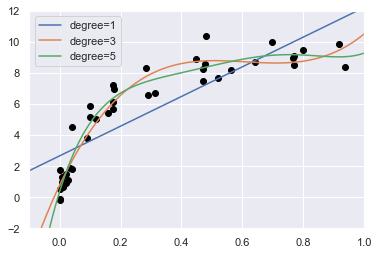

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best'); 

Degree of polynomial is the controlling knob for this model.  

Using validation_curve, we can determine which degree of plynomial best fits the data

In [46]:
from sklearn.model_selection import validation_curve


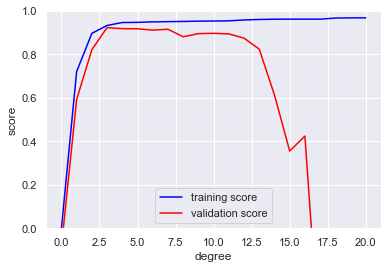

In [48]:
degree = np.arange(0, 21)

# Generate validation curve
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

# Plot the validation curve
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

***

#### Learning Curve####

How much data is good!

![Learning Curve from above referenced book](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAecAAAFwCAYAAACCbrOvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3Xd8FHX+x/HXzLb0BmkkkACGIr0JSA5OVAR7Fz2lqCB4%0AgsJ5/k49OO4U0QPlRATOLmCLp4K9gNIUsNFUeickgZDed3fm98dkNwlJIMgmuxs+z8cjj92dncx8%0Ad1jynu93vvP9Krqu6wghhBDCZ6jeLoAQQgghapJwFkIIIXyMhLMQQgjhYySchRBCCB8j4SyEEEL4%0AGAlnIYQQwsdIOAufMnToUB5//HFvF6Ne6enpdOrUiS+//LJJ9udwOFi8eDE33ngjffr0YeDAgYwe%0APZrVq1c3yf7Pxvr167nrrru44IIL6N69OyNGjGDu3LkUFxc3eBvvv/8+nTp1Ii8vrxFL+vtVVFQw%0Ac+ZMVq5c6V7m699h4R/M3i6AEP4kOjqatLQ0kpOTG31fRUVF3HXXXezbt4/Ro0czZcoUHA4Hn3zy%0ACffccw8PP/wwo0ePbvRy/B6rV69m4sSJ3HjjjYwaNYqAgAC2b9/OokWL2LhxI2+99RaKopx2O4qi%0ANGg9bzl+/DhLliyhX79+7mULFiwgLCzMi6USzYGEsxBnwGq10r179ybZ18yZM9m1axdvv/02HTt2%0AdC8fMmQIQUFBzJ49m0suuYSEhIQmKc+ZePnll0lNTeVf//qXe1n//v1p27YtEyZMYO3atQwePNiL%0AJfSMusZw6tSpkxdKIpobadYWfqe0tJTHHnuMQYMG0aNHD+644w62b99eY52tW7cyfvx4+vXrR9eu%0AXRk+fDjvvPOO+/0PPviAAQMG8PLLL9O/f38uuugiSktL6dSpEx988AFTp06ld+/eDBgwgCeeeAJN%0A04DazdoPP/wwkydPZvHixQwdOpQePXowatQo9u7dW6M8b7zxBsOGDaNHjx7ceeedLFu2jE6dOnH0%0A6NE6P2NOTg4ffvghN998c41gdrn33nu57bbbKCsrA+Bvf/sbV111VY11VqxYUWMfd9xxB9OnT+eu%0Au+6iR48eTJs2jV69evHCCy/U+L3du3fTqVMnNmzY4C7LQw89RP/+/enVqxcTJ07kyJEjp/w3ysnJ%0AcR+z6gYNGsSUKVOIi4tzLzt69Cj3338//fv3p3///kyePJmMjIwav7d+/XquvfZaunfvzpVXXsnX%0AX39d4/1Dhw5x77330rt3b/r168dDDz1Ebm6u+33Xv9Mrr7zCkCFD6NWrF/fffz9FRUXMnz+fQYMG%0AMWDAgFrN0af6HqWnp3PJJZegKAqTJ09m1KhRQO1m7YZ8PiFOJuEs/M6ECRP47LPPmDJlCvPmzcNm%0As3HHHXdw+PBhADIyMhg9ejQhISHMmzePhQsX0rZtW2bMmMHu3bvd2yksLOTjjz/mmWee4eGHHyYw%0AMBCAWbNmERUVxYIFC7j99ttZvHgxaWlp9ZZn/fr1LFu2jL///e/MmTOHgwcP8sgjj7jff+edd3j8%0A8ccZNmwYCxYsoHXr1kyfPv2UzbXr169H07R6a5cxMTE88sgjtG/fHqDebZ28/P3336d9+/YsXLiQ%0AW265haFDh/L555/XWOfTTz8lJiaGAQMGUF5ezh133MGmTZuYPn06s2fPJjs7m9tvv53CwsJ6y/+H%0AP/yBdevWMWHCBD799FOys7MBMJvNjB8/ng4dOgBG0/2tt97K7t27mTFjBk899RT79u1j/Pjx7lqp%0AruvMnDmT0aNHs3DhQkJDQ5k6dSo5OTkAnDhxgltvvZXMzExmz57NP//5TzZv3sxdd92Fw+Fwl+nb%0Ab7/lq6++4vHHH+ehhx7iq6++4oYbbmDbtm38+9//5pZbbmHp0qV8+umnwOm/RzExMcyfPx9d1/nL%0AX/7CP/7xj1rHob7PN27cuDpr3UK4SLO28Ctr165l48aNvPbaawwYMAAwguDyyy9n0aJFzJw5k927%0Ad9O7d2/mzJmDqhrnnz169OCCCy7g+++/JyUlBQBN07jvvvsYNGhQjX307t2bv//97wAMGDCAr7/+%0AmtWrVzNy5Mg6y1RSUsKLL75IixYtAMjMzOSJJ54gPz+f8PBwFixYwHXXXceDDz4IGLXHrKysU3bq%0AyszMBKBVq1a/91DVKTg4uMaJw1VXXcXEiRM5fPgwrVu3BuCLL77g8ssvB4wWhoMHD/Lxxx+7r7MP%0AHDiQiy66iCVLlnDvvffWuZ8pU6ZQUFDAsmXLWLVqFQDt2rXjsssuY+zYse5rsu+99x4nTpzgrbfe%0Acn/WuLg47rvvPvbt2wcYJxiPPvooI0aMACAyMpLrr7+eLVu2cNFFF/Haa69ht9t59dVXCQ8PB4x/%0A72HDhvHJJ59wzTXXAEaLy/z5893/TsuXL2fv3r0sW7aMwMBABg0axPLly9myZQuXX355g75HnTt3%0ABiApKcl9olTd6T5fXb8jBEjNWfiZ77//nsDAQPr27YvT6cTpdKJpGqmpqaxfvx6AwYMH8/LLL+Nw%0AONixYwdffPEFixYtQlEU7HZ7je3V1bHr5GvKsbGxlJaW1lumVq1auf/gA+4m29LSUg4ePEhWVhYX%0AX3xxjd8ZPnz4KT+nyWQCqLNp+GwkJSXVeJ2amkp4eLi79rxjxw727dvHFVdcARjHOykpidatW7uP%0At81mo0+fPu7jXRer1crMmTP5+uuvmTFjBsOGDePEiRMsWrSIK6+8kvT0dAA2b95MSkpKjZOQTp06%0AsWLFihrB1atXL/dz1zX2goICdxl79uxJSEiIu4yxsbG0b9/e3TQPxr9L9X+nFi1a0LZtW3eLCUBE%0ARIR7u2fyPapPQz+fECeTmrPwK3l5eZSWltK1a9cayxVFwWKxAEagzZo1i7S0NBwOB61bt6Zfv37o%0Aul6rKbH6H2uX6n+sAVRVPWVIBgQE1CqLqxyu655RUVE11mnZsuWpPqb7j3lGRka9f8SzsrKIjY09%0A5XZOdnI5zGYzl112GZ9//jnjxo3js88+IykpiW7dugHG8d67dy9dunSp8XuKojSox3psbCwjR45k%0A5MiRaJrG8uXLmT59OvPnz2fWrFnk5+fXKlNdqh9jVy3W9W+Zl5fH1q1b6yxjTEyM+3VwcPApt3uy%0A+r5H1fd9Og39fEKcTMJZ+JWQkBBatmzJCy+8UO8fyAULFvC///2P2bNnM3jwYAICAigrK+Pdd99t%0A4tLiDk/X9VGXk1+frH///phMJtauXUtqamqt97Ozsxk6dCj33XcfEydOBGoHRklJSYPKeOWVV5KW%0AlkZ6enqNJm0wjnfnzp2ZOXNmre1brdY6t7dlyxbuvfdeFi5cWKMVQlVVrrvuOlauXOnuMBcSElJn%0A57I1a9bUCtv6hISEMHjwYO6///5aZawrkBvKE9+j032+uk4OhQBp1hZ+pk+fPuTk5BAYGEiXLl3c%0AP8uXL+fDDz8EjHDo2rUrw4YNc9eM1qxZAzS8xuMpcXFxJCQk1OpdvGLFilP+Xnh4OFdffTVpaWk1%0AOrG5zJ07FzCCFYwQcHW6cvnxxx8bVMZ+/foRFxfHSy+9xMGDB93bBON4HzlyhFatWtU43q+88grf%0AfPNNndtLTk6muLiYJUuW1HrP6XRy+PBhd4ew3r17s2vXrhq9l/fu3cv48ePZuXNng8rfp08f9u3b%0AR0pKirt8KSkpPPfcc/z0008N2kZdGvI9cl1+qI8nPp84N0nNWfic7du38/rrr9dafuWVVzJ06FC6%0Adu3KuHHjuO+++4iPj+fzzz/n7bffdt9T261bN1588UXeeOMNOnTowNatW1mwYAGqqp7y2rEnuf54%0AK4rCvffey/Tp04mKimLgwIGsWrXKPaKUq4m2Lg8++CDbtm3j9ttv54477qBPnz4UFhby/vvvs3r1%0AaqZPn+7uxDV48GCWLl3KjBkzuPzyy9mwYUONUatOZ8SIEbz++ut07NixRjP6DTfcwJIlSxg7dizj%0Ax48nIiKCt99+mxUrVrg7Wp0sPDycKVOm8OSTT5KTk8P1119PbGwsx44d45133iErK4v58+e7t//a%0Aa68xfvx4Jk2ahKqqPPvss/Ts2ZMBAwawfPny05Z97NixLF++nLvvvptRo0ZhNpt55ZVX2Lp1Kw88%0A8ECDj8HJGvI9CgkJAeC7776jTZs2te5xPt3nE6I+Es7C5/z888/8/PPPtZb36tWLFi1a8MorrzB7%0A9mzmzJlDUVERSUlJzJo1i2uvvRaA8ePHk52dzfPPP095eTlJSUlMnz6djz76iM2bN59y3/WNSFV9%0A2cnrnG79G264gaKiIl5//XUWL15M3759mThxIs8//zxBQUH1liUqKoo333yTV199lS+++IJXX30V%0Am81Gp06deOWVVxg4cKB73T/84Q9MmTKFpUuXsnz5cgYMGMBTTz3FuHHj6i1XdVdddRWvvvpqjVoz%0AGOHzxhtv8O9//5sZM2ZQUVFBhw4dWLBgwSkHERk9ejTJycksXbqUmTNnUlBQQGRkJKmpqTzxxBPu%0ATl2hoaG88cYbPPnkkzz88MNYrVaGDBnCQw89dMoTl+qfIz4+njfffJPZs2fz0EMPoSgKXbp04bXX%0AXqsRlqf7d3K9di1ryPcoJCSE8ePHs2TJEjZt2sTy5ctrbPP3fj4hFF1uthOiUX388cf07NmTxMRE%0A97JnnnmGtLS0Gr2JhRDCRWrOQjSy9957j//+979MmjSJyMhItmzZwuLFi7n77ru9XTQhhI+SmrMQ%0AjezEiRPMnj2bdevWUVhYSEJCAjfffDNjxozxdtGEED5KwlkIIYTwMdIjQQghhPAxPhPOUoEXQggh%0ADD7TIUxRFI4fr3+WG3H2oqND5Rg3ATnOjU+OceOTY9w0oqND61zuMzVnIYQQQhgknIUQQggfI+Es%0AhBBC+BgJZyGEEMLHSDgLIYQQPkbCWQghhPAxEs5CCCGEj5FwFkIIIXyMzwxC8tZbEBRkIiVFIzpa%0ARgsTQghx7vKZcN65E4qLTaxbZ6JTJ43UVAdRUd4ulRBCCNH0fCacq9uxQ2XXLivdujm58EInoXWP%0AbiaEEEI0Sz4ZzgCaBlu2mPj1VxN9+ji54AIngYHeLpUQQgjR+Hw2nF0cDti40cSWLSYuuMBJ795O%0ArFZvl0oIIYRoPD4fzi5lZbBmjYkffjDRr5+EtBBCiObLb8LZpbRUQloIIUTz5nfh7HJySPfq5cRm%0A83aphBBCiLPnt+HsUj2k+/Z10rOndBwTQgjh3/w+nF1KS2HtWhMbN5ro3t1Jv35yC5YQQgj/5DPh%0AbPZQSSoq4McfTWzaZKJzZ40LLnDSsqWMOCaEEMJ/+MzY2pMnQ/fuThTFM9tzOuGXX1ReecXC+++b%0ASU9X0CWjhRBC+AGfqTmHhcHw4U769dNYt87Ezp2eO2/Ys0dlzx6V+Hid3r2ddOqkYTJ5bPNCCCGE%0AR/lMOLu0aKFzzTUOMjIU1q41ceCA50I6I0Phk0/MrF6t07OnRo8eToKDPbZ5IYQQwiN8Lpxd4uN1%0Abr7ZQXq6wnffmdi/33MhXVSksG6diQ0bjOvSvXs7iY2VNm8hhBC+wWfD2SUhQeemmxwcParw7bee%0ADWmHA7ZtU9m2TaV1a42ePTVSUjSPdU7zZU4nHDigYLVC69ZyYiKEEL7Eb2KoVauqkP7uOxP79nm2%0AL9vhwyqHD6sEBkK3bk569HASGenRXfiUjRtNzJtn5aKLHNxzjx1NA9VnugcKIcS5zW/C2aVVK50b%0AbzRCeuNGE7t3ezZRSkvh++9NfP+9ieRkjR49NM47r/l1INuxQ2XfPpWHHnK6l2ma8ejqMe+pnvNC%0ACCHOjN+Fs0urVjrXXecgO1vhhx9M/PabitN5+t87EwcOqBw4oBIcrNOtm0bXrk6iojy7D294/XUL%0AL7xgxW43erL37q2dstas60ZwK0rdtetff1Vp1Upr1i0NQgjRlPw2nF1attQZMcJBair88IOJrVtN%0AVFR4dh/FxQobNhgdyBITNbp21ejYUfPbsbxbttQpKTE+1/33B9CjRwk//mic4Awf7iAvT6FLFyft%0A2unouhHKp2o5mDbNRmysztNPlxEU1HSfQwghmitF131naI7jxwvPehulpbB5s4mfflIpKWm8dlmL%0ABVJSjNp0UpLuF03A0dGhHD9eSE4O3HRTEB06aMyZU4aqwqxZNl56yUL//k4yM43WghUrSnA64f33%0AzWRlKaSkaPTqpRETU/Mr43BAcTGEhxuvnc66w9wV9Dk5NIsWiPq4jrNoPHKMG58c46YRHV33ONN+%0AX3M+WWAgDBxojK29fbvKjz+aOH7c88lpt8Nvv6n89ptKWJhOly4a55+v0aKFz5zr1OvwYZXiYoXk%0AZI3gYMjOVjhyRCEsTOf22+0MHeogO1vlxAmF228PpKAAYmJ0Fiww2rTHj7fzwANG80RREezbp9K1%0Aq+be/snB7Apl1wnMP/4RwK5dKosXl8otbEIIUYdmF84uZjOV14k1Dh9W+OknE3v2qI0yhGdBgcL6%0A9SbWrzcRE6PTubNG585OwsI8vy9P2LNHxeGApCQjUHNzFfbuVenf38kNNzgAiIzUSEsz43DAY4+V%0AM2CAk/x8hZkzbbzwgoWLL3bQrZvG11+bGTcugC+/LKF9e42FC6106+akWzeN0lJo3752q8K//lVG%0AVpbqDmaHw3NjqwshRHPQ7P8kKgq0aaPTpo2DvDz4+WcT27aZKC9vnP0dO6Zw7JiJ1auN69OdOhnX%0Ap31pJLK9e1WsVp3kZCMcjx9XOH5c4bbbjB51drvRbH/99Q5uuMHhrgkHBelceqmDVauME51u3TT2%0A7FFJTNRp1Urn2DGFzz83s3y5mc6dNVatMqPrMHFiBVOnVqAouPsDdOpUVdOuHsyuzmfNrXe8EEKc%0AiWYfztVFRMDQoU4GDXLy668qmzebyM5uvIvFR46oHDmi8vXX0KaNRufOGu3ba17vNHXokEpEBLRt%0AawRkZqZCUZFCr15GOLt6ZO/cqbJ0qYXdu1Xi4nRiYzXWrzdjseBuvt+8WSUhQSMyUmfvXhNHjyrE%0AxelcfLGDGTPKef55K//9r5Xzz9cYMcLBunUm/vznAKZOrWDcODvLlxvbu/RSBxUVEBxcfzC7euOr%0AqtzmJYRo3s6pcHax2aB3b6NzU3q6wubNJnbtMpp6G4OmVd2WpaqQmGjUplNSNEJCGmefpypLRoaC%0A2ay7AzY93Wjud9VmTSZj5LSRIwNp29a4lp6fr1BWplBSApGROq1bG+vu2mUiNdWB2WyMOFZSovDw%0Aw2UMG2Yk6a232nn3XSPgR4wwrneHhhq3wgEsXmxh506VceNUFiywYjLpjBtnZ9y4ilrHRmrTQohz%0AxTkZzi6KAomJOomJDkpKjPt1t2wxkZPTeNUyTTNqrocOqXz1lTE8aUqKkw4dNCIiGm23bk4n9O3r%0AZN48K6+/buH66+0cPqwQE6O7r5HrOnz+uZn8fIV33y0lMLDq96++OhCr1Rj7vKjICPqOHY2gPnBA%0AJSrKuObuYjIZ15Tj441l+/YZTert2mmUlUFJiUJurkJhISxdWsKHH1qYN89K+/YaV19tnC2VlMCX%0AX5pZscJMfLzGrbfaiY/Xa5SrPq77s6WmLYTwJ+d0OFcXFAT9+mn07atx6JDCli3G6GOeHtjkZOnp%0ACunpZlatMnpEp6QYTd+xsY1ze5bFAn/6k53jxxV++01l0CCV3btVQkJqds6Kjtax2+Gnn0z07Gl0%0ABvv+exMbN5oYOdJBQABs3apSVgbt22vounHSER6u1xir+9gxo7btqpUfOqQQHg6tWmkcO6awY4fK%0Agw9WMGWKcTG6T59y3n3XzA8/mLj6age6DhMmBLB+vZk+fZzs3Wvm+HGFI0dUrFZ48sky2rSpv5ef%0ADEkqhPBHEs4nURRIStJJSjJq0zt2qPzyi4nMzMaverk6k337rYmQEKN22b69TlKShtXquf20aaPz%0AzDNVPeKWLCl1txa4TgguvdTBl1+aufPOQHr2dGKxwI8/mrBYjOvnANu3q4SEGK/z8oxr167majBq%0A4Pv3qwQEGNe3S0shM1MlPl4jPNwI99JSSE2tup6gqkZt23VSNG+elVWrzLzwQimpqU5KShQmTgxg%0A3ToTN9zgOGVHuw0bTBw7ptChg3EZob6THafTKKuqSpgLIXxDswznjIyjxMe3OuvtBAUZ16Z799Y4%0Aflzhl1+M+5qLixs/qIuKFLZuNbF1qxFWbdoYNer27TX3YB+/l6ZV9YhWFAgJgZAQYzQw13XdhASd%0ABQtK2bDBxM8/mwgNNWrcc+da3Scq335rJiBAJzpaJyNDJTdXYfDgqqYGux13Z7KQENizRyE/H/r1%0AMwJ81y6V4GDj0oLLiRMKxcUK7dtr2O2wfLmZSy5xMHy4sd2QEJ1Zs8r54x+DiI/XiIioWWt23VM9%0AY4aNb74xUVqqkJNj3NM9d24Z3bpp7nVcTnUtW9OqgluaxoUQTaXZhXNmZib33ns3S5emERzsud5W%0A0dE6F13kZMgQJ/v3K/zyi3E7UWM3e4NRs9u/X2X/fpUVK4ye0m3baiQnayQm6mdcq66vhnhy+ERE%0AwPDhTncwAlx2mYOiIuN5jx5OoqONk4X16417pW+7ze5et7TUCOfOnY3f379fxW5XaNeuquadmKgR%0AHl41TOj27UbB2rbVOHpUIStL4frrjd93NbmHhOg4nUaonxysimJcB1+40MK0aeXcfrudrCyVKVMC%0AmDgxgBUrSggIMAZPefddC8uXm8nNVRgwwMk991TQrl3NsD/dmOMS2EKIxtCswlnTNGbO/AfZ2ceZ%0APXsWM2bM9Pg+VNUYWKN9e4c7fH77zZhusqkGQj1xQuHECRM//mjCZIKEBI3kZJ3kZGNoTU82zZ5c%0AczSZqobpvOuuqiC++GInH39cQlxc1UEoKjKu3d9yi7HeL78Y95e7wnnvXpXOnTUCA6uCbts2Y8S1%0AhASdEycUgoNxd1RzOo1w3rFDpUUL3d3J7OSQLCgwXuTmKlRUGB3Wpk0rZ+lSCwEBxr3Wf/1rAB98%0AYGbsWDsxMTorVpiZMcPG88+XEVo5mt62bSrffmsiIkLnggucNYL75H06nVK7FkJ4TrMK57lzZ2O1%0A2lAUhbKyUl577SXGjLm70fYXGAjdu2t0765RVGSExvbtJjIymu4vtNPp6v0Na9aYCAiA5GSjVt2m%0AjVGrPZvAOFXQVx/Zy2IxjkV1CQk6q1cXu9eJjDSGOW3dWqOgAL77zsSkScbgJK7pKn/5xUTr1joh%0AITrBwVBeXjVwiWuikbVrjXuj4+PrPhtKTNS45x47L79sZdMmE2PH2rnqKgc9ehg18NWrTXzwgZkn%0AnyxnzBjjxKFrVydjxgSyerWZYcMczJ5t5e23LSQmGicJDgdMmlTB2LHG+opibKd/fycBAfWPJX6q%0A2byEEKI+zWbii+eee4bevfvRrl17brnlWlau/JYVK74gNzeX2267w4OlPL3cXNixw8T27WqjDnLS%0AEGFhRu/pNm00evUKxm4vbLTa3Zk081ZUwGefmenY0RhFzfW7PXsGk5KisWhRGS1a6Nx6ayD796ss%0AXFhKSorGRx+ZefJJG8nJGgsWlJGQoNe5X6cTXnnFQlqaha1bVfr00Zg/v5R27XQeeMDGtm0m3nqr%0A1D2JR0mJMZVm27bG9JljxgQybpydiRONk4fnnrOydKmFl18u5eKLnezerZKaGsSkSRV8+KGFqCid%0A2bONa9otW4Zy+HBhg271Er+PTMrQ+OQYN436Jr5oNuGcm5tDZGQUmZkZ3HzzNaxc+S0Wi4WcnBNE%0ARbXwYCnPTHa2wu7dKrt2qWRleTeog4NtmExlJCYaYd26tXFvdVM1xTak6XfLFmMwmD59NCoqjFvN%0AJkwI5PBhheRkHbNZZ+NGE3fcYWfGjPJaA5UUFcEDDwRw//0VdOtmVMfT0sz85S8B/PnPFdx3XwU3%0A3hhEx45GBzFVNWq3rpptcTGMHRuIwwFvvFF1j/fx4wo33hjI+edrLFxYxmefmRkzJoALLnByyy3G%0A0LA33OBAVeH990NYssRJTo5xLXvq1IparQri7EhwND45xk2j2c9KFRlZ9xyE3gxmMOZObtnSycCB%0ATvLyqAxqE+np3gnqggKF334z7nEGCA3VSUzUSUjQSEgwel43VhPsyU2/1UPRpUcPI8TsdlixwkxI%0AiM5775Wwbp2JjAyVgQOdDBkSxHnn1T26WkgIfP+9iX//28ZTT5URH69z880O/v1vnUOHVGw245p9%0AWJju3r+qGp3XrFZjyNXfflOZMKGCwMCqa+7R0TotW+oUFhr/bt9/b9xWNmVKBUOHGs3lR44o/PWv%0AAaxdC5MmOWjXTuO11yzMmGFj4cIymYFLCNFgzSac/UFEhDHQSb9+xjVqV4368GHVfc21qRUWKmzf%0Arrh7SRvXco2gTkjQGjwS1+9R10mAKzAVxRi3e/FiC2++Wcrw4U4KC508/7yVwEC48ML6u8k/+WQ5%0A06fbmD7dRteuGlu3qhw+rDBnjh2LBVq31ti2Ta1xzXzVKjP79imkpjopKlLck4JUr+VnZir062fs%0Ad+tWY+KPDh2q/uEWL7bwyy8qn38OnTtX4HQaw5TedVcA775r5r777NLDWwjRIBLOXhISAr16GeN7%0Al5YaQ1/u3auyb58x6pa32O1VHczAqOq2aGHMOpWQoBEXZ9QgG6t27dqu2WzMG52ernLbbYGEhxuz%0AYhUVKUyebDQT1xd0l13mQFGMe6Q/+MBM+/YaaWmlDBniRNfhzjvtTJoUwMKFVq680sH27SpTpwYw%0AaJCDUaPs2O1w9GjVoCyKAnv3Khw6pDJunNEhbPt2lWuucdCyZVVt+JtvzAQF6e4Zz0wmGDDASadO%0Axuxdrtm+hBDidCScfUBgIJVzQGtomhEMe/caYe3tDmXgunVLYdu2qtp1bKxWOVOVcUtTZKRna4S6%0AblwSeP75MnbvVtm0SSUvT+GPf3S6a6v17c9kghEjHIwYUXsmE0WBK690kJ5ezrPPWnnuOStt2mhc%0AcYWDxx4rw2KBiy92MH++lYEDnXTsqJGRoTB7tg1VhRtusFNaahyTtm01AgKqtr1/v4rFonP11VBe%0AHkJUlNEl/wI0AAAgAElEQVQ7fd06E5ddZoS2hLMQoiEknH2MMWuVTmKiMeBJfr4xWcTevUbzt91+%0A+m00NrvdNR1m1TKbrSqw4+KMwA4L+/2BXf33UlKMGbzOxOmG5LznHjvjxtnZudM4puefr7mbuKdP%0AL2fq1AAmTAigUyeN9HSVAwcUpk0rJzQUfvrJmF3s5DHEQ0N1br3VzrRpNr77roRdu4yhX887z+h8%0A19QzkAkh/JeEs48LD69q/nY4jN7Lruknvd37u7ry8urN4YaAAIiJMQZGiY7WiYkxpqk0N8G37nTT%0AS7qCu/oMWi7nnaczb14ZX3xhZssWY0rMuXMd7nXXrzehadCyZdXvBgXp9O7tZONGE2Fhxr9Znz4a%0AubkO1q0z079/EwwlJ4RoNiSc/YjZ7JqUw6hVFxcbgWiEteLuSewryspqB7aqGtewjbCuCu5TTWDR%0AGFw18/quWycn69xzjx2o3VTRoYPG+PF29yQfmmb0Ibj2WgePPmpj6lS46iqjs9/8+VZCQnT69pVw%0AFkI0nISzHwsOrrpWrevGddCDBxUOHzbmi/Zmx7L6aJpxz7BrykqXkBDdHdotWhg/LVvqNa7pNob6%0Amt1do3tB7Xuzhw1zMmxYVdi6ms2vusoYd/zZZwNZtCiIiAid7t017r67ot7RzIQQoi4Szs2Eorju%0Aqdbp08cI6+PHFQ4fNsL68GHfHj+yqEihqEjh4MGay12h7fpsruBu7NG3XOOI1+VUg6ncequDyZNh%0A374iMjJUEhK0Jm8VEEL4PwnnZkpRICbGuM7rCmuwsWmTw12zLi31dilPr77QDg42Qjoy0viJitKJ%0AjISIiNozVXlaQ6aYDA2F0FAZFUwI8ftIOJ8jFAWio6vmp9Z1yMlROHpUIT1dIT1d5cQJ37pmfSrF%0Axca8z9WvZ4NRow0Prx7YVc9DQxt/ABCZmUoI4QkSzucoRcHdRNytG4CT0lJjLuSjR1XS0xUyMlT3%0AjFD+QtOMqSJzcxX27av5ntlsBHdEhPETHq4THl617EznxRZCiMYi4SzcAgOhXTuddu2Mzk6uzltH%0AjxpBnZlpDEbiO1OlnBmHo2pAlboEBelERNQV4DohIae/PUsIITxFwlnUS1UhNtYYBaxXL+P6aUUF%0AZGUpZGYqZGYagZ2b2zzacUtKFEpKqoburE5RjOvcYWHGNJyhoTphYTVfBwZKk7YQwjMknMUZsVqN%0AkbGM0bGMwC4tdQW2EdZZWQr5+c0rpXTd1Tmt7vAGY2jO0FCdhAQAM6GhRmiHhBg17+BgnaCgukcs%0AE0KI6iScxVkLDDQG7UhOrrr3t6zMaBI/dkypfDTGCXfUHu662bDbjU525eVQXFx3AquqEdIhIVSG%0AdtXz6sulFi7EuU3RdX+9gli39PR0LrnkErZs2YJVevj4FE2D7GzIyoLMTOMnKwuKirxdMt9jMlFZ%0A2zZ+6nseHIzUxoVohnyq5nz8eOFZbyMnpxiA7OwiLDIFUA3R0aEeOcZnQ1EgLs74cSkpMTpqZWcr%0A7sfsbIWSEv+sOgYH2yguLj/r7RQUNGw9RYHAQKPJ3NV07noMDDRq4QEBxqPrtb93bvOF73JzJ8e4%0AaURHh9a53KfCWZybgoKMntLVZ3mC5hfajUXXqzqzNXSKUZutZmAHBBj/BnUFeUCA8b7VKk3tQjQV%0ACWfhs+oL7dJSyMtTyMlR3Pc0u577233Z3lJeDuXlCvn5AA1LXEWpCnXXY0AA2Gyu1zXfs9mosV5T%0AzEYmRHPRLP+7NLPL6OIkrlrdyZNJGD2qcQd19fDOy1PcE1mI30fXjY5+ZWWuMD+zarTZXBXkVitY%0ArcZzi8VYbrVS+Z5euaxqHdf6xqPnP5sQvsanOoTJ9Y3GdS5fQ9I0I7jz8ozbvPLylGrP8WhTuaeu%0AOYu6KQpERtqw28vcYW2x6JWPVc/NZiofq7/WK9epWrf6a2m2r3Iu/71oSnLNWZzTVBX3gCFQ+3y0%0AoqIquPPzIT/fqHEXFBjzZJdL1voMXafydrXqSeqZVK0d5sZrV3ibTFWvTSaqPeqYzVT7qf26+u+Y%0AzXIiIE5NwlkIjD/Crlm86lJWBgUFxiAkBQWK+6ewEHeAS7O5/6uogIoKo3NdlcZJ0apw16sFv/Fj%0AMhmzq7mWqWrViYFredV7euXv1FxuMumoKnW8V3sbiiInC75GwlmIBnB1doqJgbpq3poGxcVQWKhg%0ANts4cMBBUZExc1ZRUdXUl3Z7kxdd+Cin0/ipO/ybPildYa2qRuCHhUFpqQWTqWp+c9dJgsmk11pm%0A/F7VSUHNZVTbjl7Hsqp1VdXYdtXrqh/XSYRrvfrfq73c30g4C+EBquqaw1knOhpiYmpXo13Nsa5h%0AQF2BXVxc9dy13OmsYydCNKKqkwUABUU5+dJBdf6VdtWDuupRP0341zwJcL1Xcxs1l9dcptdaz1UW%0A1zKTCa65pu4ySzgL0UQUpaoG3rIl1FUDh6pe0cXFRvNqSYkR4K57mY3XVc/l9jEhTk3TqOOyU0NP%0AMBr3RETCWQg/YYz4ZdwuZjj1DRUVFbiDunp4l5ZCaanxWFZW9bqsrPE/gxDi7Eg4C+HnXLcTRUQ0%0ALMw1jTqDu6TECO6q5VVhXl7evCctEcLXSDgLcY4xZsYyxt82NGyoA4ejahASY4SxqudlZa4QN4K8%0A+nquR98ZUUEI39eswjk7O5usrEySkpKx2WyYTCZUma5HCI8wm3FPaVmlYYmr60bzuyu8jVuWjNuW%0AXMtdz43X9a8jNXhxLmgW4bx162b+85857NmzC4C5c5/H6XQya9a/uO++KVx88aVeLqEQ5zbXuNw2%0AG9QM9DOvTjudEB5uIz29wh3idjvY7cZzh4PKx+qvlcp1qtZ1PXe9Jz3khS/x+3Devv1XHnjgz8TE%0AxHLTTbfy7rtvARAWFobZbOZf//o7QUFBDBw4yMslFUJ4gslkdJgLD4ezDfrqNI0a4V49wB0Oo8bu%0A+jHCXKn23FjfeKTaulXB73rtek+IU/H7cH7xxYW0atWKl19eQmlpGWlpbwLQqdP5vPbam0yceBdL%0Alrwq4SyEOCVVNW51q+K54D+ZrnNSsBvB7brX2OEwThaqL6v5nhHyNZcb6xq/V/29utY1tuF6Lv0B%0AfI/fh/Mvv2xjzJi7sNkCKDvpHpHg4BCuvvo6Xnrpv14qnRBC1KYoVZNtVKkrIZsmNXW9Krg1zXhs%0A0cJGVlYFTqfivk+4+vtVy5Q6ltV8r6Hv63rVOprmeq1Ue06t5yevW9c2/JHfhzOAxVL/HHIVFRXo%0Augx6LIQQ9VGUqnG9XcLCqJzw5XTp5tvp5wrr+gP91CcCdQW98bxq3er7qOv1yScPrm2calhRvw/n%0A88/vwldffc5NN42s9V5paSkffbSMTp26eKFkQgghvM01dnfDnMmJRuOelPj9fUZ33z2B3bt3ct99%0A4/nss49RFIXffvuFd999mzFjbuXo0XRGj77T28UUQgghGkzRdd9pkf+9E3v/8MMGZs+eRUbG0RrL%0AW7RoyQMPPMgf/3ixJ4rn92Ty9KYhx7nxyTFufHKMm0Z0dGidy/2+WRugX78BvPPOMnbt2kl6+hE0%0AzUlcXCs6deqM2dwsPqIQQohziN83awNkZmayaNF84uNbMXToJVxyyWVs3vwTixbNJzc3x9vFE0II%0AIc6I34fzvn17uOuuP/H220vJysp0Ly8sLOT9999l7Ng/cfRouhdLKIQQQpwZvw/nRYvmExQUzNKl%0A75KS0sG9fOLESSxZ8g4Wi4WFC5/zYgmFEEKIM+P34fzrr9u4+ebbaN26Ta33EhISuf76m9m8+Wcv%0AlEwIIYT4ffw+nJ1OjfLy+meP13WdcuNOeiGEEMIv+H1X5q5du7F8+Qdcc80NhIbW7JJeUlLCxx8v%0A4/zzZRASIYQQHuAavNxuR3HYweE0HitnSVGqzX6iOF0zoFSu417mrJr9ZMxtde7G78N57NjxTJo0%0AnlGjbuHSS4eTmNgaRVFITz/CihVfkJNzgkce+Ye3iymEEKKxaZoRkHZjMnClal5Q43lFhfGevTIk%0AXQFrN0LUHbJOp/t3XQGMw24sa6K5Rf0+nLt06crcuc8zf/5/eOutJTXeO++8FB555B907drdS6UT%0AQghRL4cDystRKspRKioqn1dAWVllwFaGoytUK04K3oqKyvcrl9vt3v5EHuP34QzQo0cvXnzxdXJz%0Ac8nKysDp1IiNjaNly5beLpoQQjQ/um4EY1kplJWjlJdVC9dyKK8wAre8zP2cigqU6u+XlzVZLdQf%0ANYtwdomMjCQyMtLbxRBCCN93csCWlaKUlRmhWVoGgSrWzBNG4JaWGsFaLYzRZLa/xtQswnnDhu/4%0A6qvPOHHiBFodXxhFUXj22YVeKJkQQjQBXa8M0RIjSEtLoKTU/bz6I6UlKCWlpw/YYBvmYrnTxVv8%0APpzff/9d/vOf2QBERkZhtdY/t7MQQviNigqU4iKUkhKU4mLjeXGxEbylpcby0qoAlibi5sXvwzkt%0A7S3OOy+FOXPmERXVwtvFEUKI+tntVSFbUlLteXFlABe7A5mKCm+XVniR34fzsWNZTJ48VYJZCOE9%0Aug7FxahFhShFRSiFBZWPhShFhcZjcRFKWf0DJglRnd+Hc0JCgsw8JYRoPLpuBGxBAUp+PkphIWrR%0ASeFbVCQdpIRH+X0433HHWJ59dg5DhgylXbv23i6OEMLfOBwoBfkoBQWohZUBXFCAUpCPWmCEsVzP%0AFTWYzehmC1gs6BYzmMzGc7MZzJXPK5dhNhnPK9/TTaaq52YLwfXtokk/UCPYunUzgYFBjB17G61b%0AJxEREYGq1hwyXHprC3EO03WjmTkvDzUvFyUvDyU/DzU/3wji4iJvl1B4ksWCbrGC1WIEqNWKbnE9%0AWivft1QGp9kIVEvlumYzWMzu50YAnxy2ZlCURv8Yfh/OGzeuR1EUYmJiKS8vqzGnsxDiHOFwGOGb%0An4uSm4uan4eSm2uEcF6e1Hx9laKg22xGcFptEBCAbrUayyxWdKu1ZtharDXC1h201YIX1e/ncwLO%0AIpwLCwtrTTThDe+++6G3iyCEaAqaZjQ/5+TA3jKsew+h5OSg5uaiFBZ4u3TnHrMZ3RaAHhBQM1Rt%0AxnNstmqP1Z7bAsBWGcYWS5PUQv3R7wrnnJwcxowZQ1paGgEBAZ4uk8fl5ubKyGFC+IuyMtTcHJQT%0AJ1Bzc1BzTlSGcE7VTD4yQIZnnBywAQFGeAYGQGwUFWVa5evAGu/ptgAjWEWjOeNwdjqd/PWvf2XX%0Arl08+uijPP30041RrjOybNn/2LhxPSUlpeh6VY9Jp9NJSUkx+/fvY9WqDV4soRCilvJy1BPZqNnH%0AUbKPox4/jnriBEpRobdL5p9MJvTAIPTAQOMnKMgI1aDgymVB7keCAtEDAk8dsNGhOI7Lv4W3nFE4%0AOxwOFi1axIMPPsjWrVsZNWoUixYtYsKECY1VvtN6443XWbRoPhaLleDgYPLz84iOjqGgIJ+ysjJs%0ANhs33jjSa+UT4pxntxu13+PHUbOrfpQCaYo+JUUxgjUoCD04GD04pPK58UjQSYFrtUoTcTNyRuFc%0AVlbG6NGjCQ0NxWw206NHD+Lj46moqPDasJmffvoRKSkdmD//BXJzcxk58jrmzVtEXFw8H374AXPn%0A/psuXbp6pWxCnHOKijAdy0Q9dgzlWBbqsSzU3FxjkA4BYARucHBV0AYHVy2rFsIEBTWbzk3izJ1R%0AOIeEhNRaFhMT47HC/B4ZGRlMmPBngoKCCQoKJjQ0jK1bN5OQkMh1193Ili2bSEt7i4suusSr5RSi%0AWdF1lNwc1GPHjADOqgzkc/m2JLMZPTQULSQUPSQUPSQEPbTyeWjl65BQMJm8XVLhB/z+Viqz2UxQ%0AUJD7dWJia/bs2e1+3bt3X154YYE3iiZE8+AK4owMTJlHUbOMGvE5Nfaz2YwWFoYeGoYeHmGEbfUg%0ADg2FgABpVhYe4/fhnJSUzLZtW7nyymsBaNMmiZ07t7vfLywswG4/h/6ICHGWlKJC1IwM1Iyjxk9W%0AZrMfE1oPCEAPC0cPC0MPD0cLrf48DIKDJXhFk/L7cL7iiqt4+umnsNvt/PWvj5CaOphp0/7GK6+8%0AQFJS28pZqzp4u5hC+KaKCtSMo5gyjqJmZqBmZDTPe4ZNJrSICKPWGxGBFhGJHhGJFh6BHhYGNpu3%0ASyhEDX4fztdeeyPHjh3j/ffTMJvNDBkylAsvTOXVV18EIDg4mIkTJ3m5lEL4BqWoEPXIEdSjRzAd%0AOWI0TzeTCRv0gAD08Ai0yEgjhCMrwzcy0rjWK52rhB9RdP33daMcOHAg69ev92hhjp/FPXUOhwOz%0AuepcY/PmnykoKKBbt+5ERkZ5onh+Lzo69KyOsWgYnznOmoaSnY0p/TBqejqm9MMo+fneLtXZqawB%0AhyYnkmcOQo+KQotqgRYZZfRuFh7jM9/jZi46uu6RNv2+5uxSPZgBevbs7aWSCOEluo5y7BimQwcw%0AHT6EeuSw314r1oOC0Vq0QI80wldvEYUWGYUeEQmqSmh0KHYJDtGM+V0433TTNdx//1RSU4e4X5+O%0AokBa2vLGLpoQTUvXUY4fx3T4IKZDB1EPH0YpK/V2qc6IHhCIFh2N3rIlWstotBbGo9SCxbnO78I5%0ALi6OgIBA9+vY2FgU6UUpzgWVtzSZDuw3asaHDqGUlni7VA1jtVYLXyOA9eho9OAQ6QUtRB38Lpyf%0Ae+6/NV4/8cRswsLCvVQaIRpZWRmmQwcxHdiH6cB+lLw8b5fotPSQULSYGLSYWLTYOLSYGKM5WkJY%0ANBMZGUeJj2/VqPvwu3A+2Zgxt3H11dcxZszd3i6KEGdP01AzM4za8YH9qEfTfbc3taKgRUYaARwd%0A6w5k6hhJUIjmIjMzk3vvvZulS9MIDm6877rfh3N+fh5RUS28XQwhfr+SEkz792HatwfT/v0+e91Y%0Aj4zEGdcKLT4eLS7eCGIvjakvhDdomsbMmf8gO/s4s2fPYsaMmY22L78P50svHc5HHy0jNXWwhLTw%0AD7qOcuIEpr17jEA+ctjnJobQg4KNEI5vhTPOCGPppCXOdXPnzsZqtaEoCmVlpbz22kuN1mrr9+Gs%0AKCoHDuznuusuJzGxNZGRUagnDTagKArPPrvQSyUUAnA6UY8cxrR3N+a9e1Byc71doiomE1psHM5W%0ACWitEtBatUIPDZNrxEJU89xzzzBgwIW0a9eeW265lscee4oVK77gzTeXcNttd3h8f34fzj/+uJGI%0AiAgAKioqyMrK9HKJhKhktxvXjnfuwLRvj8/cc6wHBKIlJKAlJOJMSDRqxRaLt4slhE+7/fYxREZG%0AkZmZ4V42YsSV5OScaJT9/e5w/p0Di51SfSOlnMqqVd94vBzN2e85xuIMVFTAr78S/dtvsHt31cxN%0AJiDYS+M3R0ZCUhK0bg1t2kDLls2iVizf5cYnx7iK61hUVBhjz7dsGYLVam20Y/S7w3nBAs9Pw9hY%0AQ8Xl5uYSGRnZKNv2JzIcXyMpK8O0dw/mXTsw7d9HsM1EcXG514qjh4fjbJ2Es00SWps26Cffapjt%0A/3Muy3e58ckxrltOTjEA2dlFWDzQ4uTx4Tt79/ad4TGXLfsfGzeup6SkFF2vuu3E6XRSUlLM/v37%0AWLVqgxdLKJodux3Tnt2Yt/+Kaf8+cDqr3rOZmrQoemiYO4idbZLQwyOadP9CCM/z+2vOb7zxOosW%0AzcdisRIcHEx+fh7R0TEUFORTVlaGzWbjxhtHeruYojnQNNQD+zFv/w3z7p1VTdZNTLfZ0JKScSa3%0AxZmULAN8CNEM+X04f/rpR6SkdGD+/BfIzc1l5MjrmDdvEXFx8Xz44QfMnftvunTp6u1iCn+l66hH%0A040a8o4dKCXFTV8GRTFuaUpuizO5LVqrBJn+UIhmzu/DOSMjgwkT/kxQUDBBQcGEhoaxdetmEhIS%0Aue66G9myZRNpaW9x0UWXeLuowo8oBfmYf9mG+ZetXhkyUw8Nw9m2nbt2TGDgaX9HCNF8+H04m81m%0AgqoNjpCY2Jo9e3a7X/fu3ZcXXvB85zXRDNntmHbvwvzLVkwHDzT5wCBafCuc56XgaHceekyMNFUL%0AcQ7z+3BOSkpm27atXHnltQC0aZPEzp3b3e8XFhZgt3vn2qDwA7qOmplhBPL235r2XmSLxagZn5eC%0Ao217GZNaCOF2xuGsaRrp6enEx8ejaRpWL4+te8UVV/H0009ht9v5618fITV1MNOm/Y1XXnmBpKS2%0ApKW9xXnndfBqGYUPKi3F/Os2zFu3oGYfb7Ld6iGhOFNScLY/D2ebZDD7/fmxEKIRNPgvg8Ph4Omn%0An2bp0qU4nU6++OIL5syZg9ls5rHHHqvRtNyUrr32Ro4dO8b776dhNpsZMmQoF16YyquvvghAcHAw%0AEydO8krZhO9RM45i3rwJ847fwG5vkn3qYWE4OnTC2bGT0ZlLmquFEKeh6A0c6uvpp59m1apVTJ8+%0AnfHjx/Phhx+SlZXFtGnT6NevH//617/OujBnc8O7w+HAXK0WsmXLJvLz8+nWrTuRkVFnXbbm4Jwd%0AVMBux7z9V8ybN6FWG3qvsQQH2yiyBhmB3KGjMTymBLJHnbPf5SYkx7humZkZ3HzzNaxc+a1vDELy%0AySefMHv2bPr06eNe1rdvX5544gnuvfdej4RzQ/z97w9x2WWXM3Bgao0wNp/UPNijR68mKY/wXcqJ%0AE1g2/4Tp11+a5FqyHhmJo9P5cGFfStUgCWQhxO/W4HDOzc2lRYvaUzIGBgZS1oSdaNatW8OaNasI%0ACQll6NBLGDZsBN2792yy/Qsfp+uoB/Zj+ekHTPv2Nv7ugkNwdO6Ms3OXqhpydChIjUMIcRYaHM4D%0ABw7kxRdf5PHHH3cvKyws5JlnnmHAgAGNUri6fPTRV6xatZKVK7/ko4+W8eGHHxAbG8+wYcMZNmwE%0ASUnJTVYW4UNcTdc//tDoHbx0mw1nSkccnc9HS0qWAUGEEB7X4GvOWVlZ/PnPf+bIkSMUFBSQnJxM%0ARkYGiYmJLFq0iISEhLMuzJle38jNzeWbb1bw9ddfsXXrZgBSUjpy2WWXc8klw4iKql3TP5c1y2tI%0ARUVYNv+MedPPKKUljbcfVcXZrj2OLt1wtmt/yikWm+Vx9jFyjBufHOO6NdU15waHs8v69evZt28f%0ADoeDtm3bkpqaiuqhmsPZfBGys4+zcuWXrFz5Fdu3/4rJZKJ3734MH345gwdfREBAgEfK6M+a0382%0AJTsby/cbMG//teakEx6mtWiJo1sPHOd3afB9yM3pOPsqOcaNT45x3XwunB999FHGjx9PUlLSWRem%0APp76Ihw9ms7q1d/w7bdr+OWXrVitNr78crVHtu3PmsN/NjXjKJYN32HavavR9qHbbDg7n4+jW4/f%0A1dO6ORxnXyfHuPHJMa6bz/XW/uqrr5gwYcJZF6QphIaGERkZSVRUC2w2W5N2WBONQNdRDx4wQvnQ%0AwUbbjbNNEo7uPXGmdDhls7UQQjS2BofzmDFjmDFjBqNGjSIhIQGbzVbj/datW3u8cGeioKCANWu+%0A4ZtvVvLzzz/gdDpp1+48Ro++m0svvcyrZRO/k65j2r0Ly4bvGu3+ZD0gEEfXbjh69EKv424EIYTw%0AhgaH87x58wD49ttva72nKArbt2+vtbyx5eXlVQbyCjZv/hmHw0FsbBy33PInhg0bQbt27Zu8TMID%0AdB3Tzh1YvlvXaD2vtfhW2Hv2xtmps9SShRA+p8HhvHLlSsC4fcrhcKBpGiaTiYiIiEYrXF1yc3NY%0Avfprvvnma7Zs+Rmn00loaBgjRlzJZZddLoOP+DNXTfnbtajHj3l++xYLjvO74ujZCy02zvPbF0Kc%0AE86wH/Xv0uBwjo6O5qmnnuKdd97BWdk71mQyccUVV/DYY481WgFPdu21I9B1HbPZQmrqEIYNG8GF%0AF6bWGiFM+BFdx7RntxHKx7I8v/mwMOy9+uLo3qPp50XWNOM+aF2XEcOEaAbi4uJZu/aHRt9PgxPt%0AqaeeYs2aNSxcuJBevXqhaRqbNm1i5syZzJ07l//7v/9rzHK69ejRi2HDRnDRRRcTHCxT7Pk1Xce0%0Abw+WdWtRszI9vnmtVQL2Pv1wdugIJpPHt39Kum4Es2u/1YNZgloIcRoNvpVqwIABzJs3jwsuuKDG%0A8o0bNzJ16tQ6r0WfKem237h86dYI9chhrKu/QU0/4uENqzg6dMTR9wJjBigvqH6c1aPpBM17Bt1k%0AQktoTdmoMeghdd86IRrOl77LzZUc46Zx1rdS6bpOZGRkreURERGUlDTiyEyiWVGys7Gu+QbTnt2e%0A3bDVir17Txx9+6GHhXt22w1VvQkbsP3vHUIemoqjW3dQFMzvvIVt+XsU/20a9osu9k4ZhRB+ocHh%0APGDAAObMmcOcOXMIDTWSvqCggGeeeYb+/fs3WgFF86AUFmD5dh3mbVvc4eUJemAQjj59sffsDV6a%0AUxxdN35cI+UpCug6AW8spuLKqyn61xPoQcEARAwfSvDjMyhMSDSa24UQog4NDudHHnmEUaNGMXjw%0AYNq0aQPAwYMHSU5OZsGCBY1WQOHnysqwbFyP5acfwOHw2Gb10DDs/S7A0b0nWK0e2+4ZczqN68qK%0AgvnnHwl4Ywk8+ACm3BIs360j/72P0COMFifTju2YDh3E2a4dSkmx98oshPB5DQ7n2NhYPv74Y9au%0AXcvevXsJCAigXbt2XHjhhSjSuUWcTNMwb92MZe0aj05IobVogeOCATjO79r0nbzqYjJBSQmWDd8S%0A+tBU7L37QGgoSsYJ9PDK5vWKCsLuvB3rii8pv/EWSiZOwrxnF1psHFp8K++WXwjhk87o/qMvvviC%0AwMBAxo0bB8DDDz9MYWEhw4cPb5TCCf+kHjqI9esVHr0tSmvRAvvAVGPQEG9O0XjyrVHl5URe9kew%0A27EPuJCix58koG0b9MxctJbRhDz8IKa9e7D360/+B59gHzgIy7drCZ72MHnLPvXe5xBC+LQGh/N/%0A/8T2Vj8AACAASURBVPtfXnrpJf7xj3+4l8XHxzN9+nSOHTvGqFGjGqWADbFu3WpWr/6GEydO4HDY%0Aa72vKArPPrvQCyU7tyh5uVhXfY1p106PbVOLijJCufP53g9lqHldGcBmo3TsOEIefhBnu/buJmzn%0AeSlU/HEoga+/QtmosRQ9+bSxvsOBdcWXRlN8U99zLYTwGw0O57feeov//Oc/DBo0yL1s8uTJ9OjR%0Ag3/+859eC+dly97jmWeeAiAiIrLWmN+iCZSXG9eVf/zeY9eV9YgIKgam4uzS1buh7FJZBtPOHdg+%0A+B96ixY4k9tScelwyu4ch+2jZZh37sC8YT1cNQyA0klTsGz6Ccv677B++jFay2jMu3Zgey+NsttH%0AS5O2EH5g8uQJjBp1J337XlDn++vWrWHRovksXZrm0f02OJwLCgqIi6s95GFiYiI5OTkeLdSZeOed%0AN2jbtj1PPTW3zvKJRlQ5Brb16xUoRZ65H1IPD8d+YarvXFN20TSCnnycoP8+j6Nrd0z796KUlFA2%0A8k8UPfk0Jf/3KGF3jMS24gsYMdT4lfhWFM14gsDXXyZswp1oMXEohfmU/Pl+SidP9fIHEkLUpays%0AjLy8PPfrTZt+YvDgP5KY2KbWurqusWHDd2RkpHu8HA0O5379+vHss88ya9YsgoON20KKi4t5/vnn%0A6dOnj8cL1lBZWZlMmjRVgrmJKbk5WFd8iWn/Po9sTw8Mwj7wQhw9e4O3h2KtY8hN888/Yvv8E4pm%0AzaH88itRSkqwfvYJIY/8FS06hpK//B8Vw4Zj/fQjGHEp9DFamBz9B1DYfwDFD09DTU/H0bUbhMjI%0AdkL4qtLSUsaOvY3i4iLAuCw6b94zzJv3TJ3r67pOv36ev524wX8Fp02bxp133klqaipJSUkAHDp0%0AiLi4OBYu9N713ISERPLycr22/3OOw4Hl+w1YNnznmSZsiwV73wuw9+sPAQFnv72zcYohNwPeS0PJ%0Az6fshpvBZkOPiKTsrvFYfvyegMWvUn7t9RQ/9AgRV10G//sfSrvO6JFR7luttNZt0FrXPvMWQviW%0AyMhIpk9/jO3bf0XXdV577SUGD/4j7dun1FpXVVUiIiK55BLPT0vc4HBOTEzk448/5rvvvmPv3r1Y%0ALBaSkpL4wx/+gOrFa4J33HEn8+bNITV1CCkpHbxWjnOBun8f1pVfonriMoaq4ujWA/ugVN8ZzlJR%0AwGRCPXSQgPffRYtqYYzN3aUrano6zuS2RtgC2O1gsVA843GiunfEsmY1ZWPvpvyW2wh6czG2jl0p%0AG3OXbzXNCyEaZODAQQwcaLR+ZWVlcvXV19O1a7cmLUODx9YGKCoqwmKxYLPZ2LVrF2vWrKFr164M%0AGDDAI4VpyDiukydPqLVs+/ZfqaiooHXrNkRERNY6WZDe2obfPVZucTHWr1dg3v6rR8rhTOlAxeCL%0A0Fu08Mj2PClw3jMEP/0Uju49Me3cjh4WTsGil7H88D1Bz84h7+OvcJ5XeQZd2fwdMWwIznbnUbjo%0AZSguJvqqSym4/0HKr7neux+mGZNxnxufHOOmcdZja69atYopU6bw/PPP07p1a/70pz8RFRXF/Pnz%0A+dvf/sbIkSM9VthTOXo0vdagJxGVt6+Ul5eT1QizG52zdB3Tju1YV3zpkYFEtJbRVAy9BC25rQcK%0Ad5bqmBnK9OsvBLz7NsUPPUrZ6LGoR45g3v4rzo6d0KJaEPTsHAJefZGShx5BD48AVcW0ZzemQwep%0AuOxyYyPBwfDjj5QXVHjhQwkhztZNN13D/fdPJTV1iPv16SgKpKUt92g5GhzOc+fO5Z577mHgwIH8%0A5z//oWXLlnz66aesXLmSp556qsnC+X//+6hJ9nOuUwoLsH71hUcmqNADg7Cn/gFHj17evy3q5OvK%0A1VhXf4Pp4AHKbv0Tekgozk6djUFPAN0WQPGDfyPk0f+DgEDKbhoJFjO2tLfQomMoH35F1YZsNkDC%0AWQh/FBcXR0BA1RgEsbGxXhkFs8HhvH//fq655hoUReHrr7/mkksuQfn/9u48PKazfwP4fWbPHiJC%0AYgktYm0itpDSBiHWWKulSl5VtPhVX63aXnvtWm0V3SxdtNbaKbXV0hahVRSxJRGxZE9mn/P7YyKS%0AZjGTzCSTuD/X5Soz5znznXOVO+ec53wfQUDDhg1x7949e9ZIpUkUzW03D/8CQast2b4kEuibB0Mf%0AEuoYDTcezcKWSiE8eAD5H7/B5OMDQ/MWAABJchKMvn4QMjMhVvZ6vH1WFhQH9kHXvReyHjyA01er%0AoVr3NUR3dwhZmciYt8j8PDYRlXsff7wqz58/+WR1mdRhcThXrVoVly9fRmpqKq5evYoZM2YAAH79%0A9Vf4+ZXNurkAMGBALwCF/1QjCIBCoYCnZyU0atQEgwYNRuXKjnev0xEIKclQ7N0N6e1bJd6X0b8O%0AdGGdIVapYoPKbCT7rN15/hw4rVoB0csLktjbyJwxF+rRb0EfFAyn5Ushu/AXdDVr5WwvqNVw/nAJ%0AdJ3CkTV5OrSR/SC9egWCOgvaAYPyXR4novLr2rWrqFatOlzL+JFHi8N5+PDhGDt2LCQSCQIDAxEc%0AHIwVK1ZgxYoVmD9/vj1rLFJwcEscO3YYaWlpqF3bH7Vq+UOhUCAuLhZXrlyGQqFAgwYNkZ6ehg0b%0AvsG+fbuwatVaPhedmyhCduFPKA7+DOhKdjlWdHWDLqwTjA0CHDK0nD77BKrNPyJ9+QoY/etCeusm%0ARFdXwGCArlsPGOs3gNOXq2GsXx/G7EcnBHVW9mpSzwBAnsvdRFSxREUNxtSpsxAe/njNCIPBgAsX%0A/sSzz9YvtdC2OJwHDx6M5s2bIz4+HqGhoQCAtm3bIiwsDAEBAXYr8Enq1w/A/v178cEHSxAa2j7P%0Aexcu/IUJE95CRER39OgRiZiYa5gw4S188cVnmDp1ZhlV7GAyMqDcv6fk95YFAfrgFtC3a599z9XB%0AiKK5zejJX6FvHQJdz0jAYICxaTNI4uMgvXYVxoCGyFi4DB6R3eA8fy7UY8bC5OEJ5a4dMNb2hyGo%0A7JrtEFHpKOgBpszMDIwbNwrLln2K4OCWpVKHVa2YGjZsiIYNH58xBAYG2rwga23Y8A0GDBiUL5gB%0AoEmTpujf/yWsX78GPXpE4plnnkWfPv2xdeumMqjU8UivXoFi354Sry1s8vWDtnNXiD4+NqrMDgQB%0AUKnMK2UlJ8NlzgwIqamQn/4d0ssXIbq5Qdu9FzI+WIyMhcvgtPITePaOgMmnGoTkZGTOmme+GkBE%0ATyUrnjq2iTLuk1hyyclJ8Pb2LvT9SpUq4/79+zl/rlKlSk5btqeWVgvFwZ8hu/BniXYjqlTQd3gR%0AhmaBZX8JO7sT15Pez5gxD27vjIXqu/UQZTLoW4dAPXQ4ZJcvQvnTFui6dofmtSjowrtC+s9lSJIe%0AQtutZ9l3LyOip0q5D2d//7rYs2cXevfuB7lcnuc9vV6PvXt35bQbBYDLly+jWrXqpV2mw5DExUK5%0AazuE1NQS7cdYrz50nbs4RnevXI9GSWJvw1Sp8uP+1Y+eZ85+39AmBCm7foag1UKUSCFm/2AnpKVC%0AtfarnAU8TNV9uWoUEZWZch/OUVEjMWnSBAwb9jJ69+6HGjVqQi6XIzb2Nnbu/AnXrl3BrFkfAAAW%0AL56PnTu34T//eaOMqy4DJhNw7BhUO/c+Xpu4GERnF+g6hTvGhC+DwbxIhkQCacxVuE58G9K4WBir%0A+0I97m3owjqba/xXwxHRsxKEWzchTUmGURQBpQJOX6yCoVET87PYRERlrMhwjo2NtXhHNWvWLHEx%0AxRES0g7z5i3G8uVL8PHHS3MeFhdFEVWr+mDWrA/wwgsdkZKSgl27fkJ4eARefvnVMqm1rAgZ6VDs%0A3A48vFuiYDY0bgrdix0BZ2cbVlcCMhlgMEDy8AHc3noDJp/qUA9+EU7frIXL1EnATCN04REFDnX6%0AYiWcPl8JQ9PnAIUCsr8vION/sx+35iSip9bt2zdx7tzZnD9nZJhvhcbEXIW0kNtngYHNbVpDkb21%0AAwICCuyMIopinhAUBAGXLl0qcTEl7eN67dpVxMfHwmAwwNfXDwEBjXLqNJlMMJlMkJX1coSlTHr9%0AGhS7d0HIyoSLixKZmdY3FhHd3KHr0hXGus/aoUJrCsl7BixkpKNSm+YwNmgI0c0N6QuWQvTxgSQu%0AFh79esLQvAUy5i00rw7173adJhOUP3wH2T+XISoVUI96y7ydDbAnsf3xGNvf03qMn3++5RNzryBH%0Aj/5erM8rVm/tgwcPFuvDysqzz9bDs4Wc+UgkkjJdPavUGY2QHz0M+R+/lWg3hsZNoevYuWwnRBXS%0AclN0dYPmtSg4L54PzZDXcmaLm2rUhHbAIKg2fAfljp+gGTo8XzBDIoH25SEoYQ80Iqpghg9/vaxL%0AAGDlqlSA+Qw0Pj4e1atXh8lkgkKhsFkxlvyU5ihNyR2ZkJoC5fZtkCTcyfO6NWfOopMzdF0iYKzf%0AwB4lPtmj1pm5zngl8XFQHDoIk3dVGAIawlTbH8jKQqUX28JUszbSP10Fk092c5mMDHgO6AXR1Q0Z%0A8xebG4o82qedPa1nHKWJx9j+eIxLR2Fnzhb/S6XX67FgwQI899xz6NKlCxISEjBx4kS88847yMoq%0A+YpFliqoKXm1atWK/OXj8/R0A5PcuA7V2q/zBbM1jM88C/XwEWUSzC7T3jfX/ihEs4PZeeE8VA5p%0ADqdVn8J9+GB49u0Bp0+XA87OyJr4PuTHDkP228nH99RdXaGOGgnprZtQbt5ofu1punJCROWaxWfO%0AS5YsweHDhzF9+nSMHDkS27dvR2JiIqZNm4aWLVti1qxZJS6GP6WVgChCfvI45MePmc82C/DEM2eF%0AArqwTuZJUmUwE1t+/BicF89H5uTpMLRs/bis/XvgMmcGssaMg77d85A8fADV119A9cN3SFv3PXTh%0AEfCI7AZBo0ba6jUw1Xr86JxHZDdI7t9D2trvS22yF8847I/H2P54jEtHYWfOFodzWFgYFi1ahODg%0AYAQFBWH79u2oWbMmoqOjMWbMGJw8ebLERfJ/hGJSq6HcvQPSmGtFblZUOJt8/aDt0Qti9trYpUWS%0AeBey6LPQde0G6PXm+8oSCZCZaV4bWaOB++gRkMTeRsq23TnPLwv378P9zdchJCUhZc9ByKLPwrNX%0AF2TOmAN11Egg+3aL9MJfEEST+QeOUsJ/1OyPx9j+eIxLR7EmhOWWnJwML6/8qzk5OTlBo9EUvzIr%0AzZtnfU9sQRDw/vvT7VBN2RMSE6H6aTOElJRi7kCAvnUI9O2eL7rDlj2IIuSHDkL1/TcwBAbBVK06%0AoNfD+cPFUG76AcknzgAqFaTXY6APbmEOZr0ekMshensja+zb8OjfC/JjR6AP6wTNoMFw/vhD6FuH%0A5PTBNjZpWrrfiYjIBiwO55CQEHz++eeYM2dOzmvp6elYunQp2rRpY5fiCrJnz84CXxcEodDepxU1%0AnKV/X4By325zM45iEF1coe3eEyb/OjauzEKCAMFohDT2tnl9ZGcXaCP7QnRxMb+2fg00rw6DPjAI%0Ail8OmMfI5TmtOI3+dWDy9YP895PQh3VC1jvvQbVtCyRcX5yIyjmLL2snJibizTffRFxcHNLS0uDv%0A74+EhATUqFEDK1eutMmazpZcQrl7NyHfa2lpqfjPf17F9Omz0bSQy5cVqmWnyWR+TOr3U1YNy31Z%0A21inLrQRPR63uSxtuWZhe3Z9EbKLfwMGA5J+OweIIlxnTIXs9O9Iir4IxYH9cB8+GJlTZkD95ric%0AXUj/uYxKL4QgY8lyaF4xN5YR0tMgurmXyVd6hJcD7Y/H2P54jEtHiS9r+/j4YNOmTTh58iSuX78O%0Ag8GAOnXqIDQ0tFSfHy4oZJ2czLO3K1f2qlghXBCtFsqdPz3x/nKhJBLonn8BhlatS3/SV+7nlbM/%0AW7F/DyR37kB0cYGu/Qsw1awFAND0HQC340fhvGgesiZNg7bfQLjMnQFjnbowBAYBUqn5cnjTZtC1%0Ae/7xR5RxMBNR+TZu3CirxwiCgI8++symdVjdLiskJAQhISE2LYIsIyQnQbllEyQPHxRvB+7u0PTp%0ABpNvya9yPNG/O3I9WjVKKgXUasguX4QhsDl04RFIPtIaLnNnQX78KBTbt0LXqw/0bdtB028gnD/7%0ABJohw5A+fwmEB/fhPioKpqo+EF1cIImPR8bcBebnnYmIbODOnfh8ncCSkh5Cp9PBzc0dNWrUhCia%0AkJCQgNTUFHh4eKB2bdvfGiwynF999dUi25Xltm7dOpsURAWT3LwB5fZtEDTqYo031vYHhg+BKav4%0AvbWtotMBSuXjxh/Zk82cPloCpy9XQ9DrYAhoBPWot6DrEgF11OuQRZ+B6sfvoX++A8TKXtD16A3F%0AoYNwff+/SFv/A9K+/haKA/shvXkDEEWoo143z+gmIrKRTZt25Pnzr78exfTp72Py5P+hS5duea4U%0A//zzXixYMAd9+w6weR1FXo8ODg5G8+bN0bx5c9StWxdnzpyBp6cnQkND8eKLL8LHxwfnzp1D48aN%0AbV4YPSaLPgPVph+KHcz6kHbQDhhUKkEmSbwLjwG94TrlPfML2T/cCffuwX3IQDh9sxbqEaOQNXYC%0AJCkpcF48H0JqCoyNGkPXrQdk/1yG6vtvzXW3aAXNK0OhOHoYil07AJUKuh69oH5rPNRj/4/BTER2%0A9/nnK9C7d19ERPTIdwu3c+eu6Nt3AL74YqXNP7fIM+f/+7//y/l9VFQUpkyZgldeeSXPNq1bt8am%0ATZtsXhgh51Ej+eniNVQXVSrouvUs1ZWWRCcniO4eUBw9BOmFv3IeZZJHn4H06hWkrfoKhuYtAADS%0AmGtQbf4RTp99jKxJ06AeNgLyE79CsW83dGGdYAxoCN2LHaHa9ANU36yBrnvPUvseREQAEBcXi169%0A+hb6vre3Dx48uG/zz7V4tnZgYCC2bt2KOnXyXluPiYlBv379cO7cOZsXV5A//vgj32vp6ekYM2YM%0AJk2aVOhZfMuWLe1dmm3p9cDWrcDFi8Ub7+MDvPQSUNk2Ky1ZRKs1X8o+dAgYPx4ICAB+/NH83ogR%0AwIULwMGD5jPeTZuAzz8HEhOB9HRg2zagaVNg7Vpg2jSgRg3A2xuYOBHw9ASaNCm970FElC0yMhLO%0Azs5Yv359vuUitVotBg4cCCcnJ2zYsMGmn2txOL/yyiuoVasWZsyYAVX2CkXp6emYPHky0tPTsWbN%0AmhIXY8m0/dJezqtMZGZCtW0zJPFxxRpuaNgIuq7dzc8E51Jaj0ZI/74A1XfroNy5HRkLlkLXtRsU%0Ae3dD8vABNIOHwmXmNKjWfAn1uLdhrO0P16nvQdepC9KXm2c7qr5YCdWWTTB5eiJt9Zqye9yrmPgI%0Aiv3xGNsfj7HZwYP7MWPGFDRq1ATduvWEr68ftFot4uJuY9u2zbh7NwGLFn2Ili2L1++jxO07Y2Ji%0AMHLkSCQnJ6NWrVoQRRG3b9+Gr68vVq9eXWrPOX/55SqLJ6nlFhU1sjgllToh6SFUm3+EkJxcrPH6%0A5ztA36ZtgY9J2eovm/zUCSi2b0XmvEV5XpdFn4H7G1EwVa4MITkZ0ps3oG8bitTNO3IWnXD65CM4%0AL1uEtC/XQf9CGADAq2EdCFlZSF/0IbQDXzbP9M7MLHeh/Aj/UbM/HmP74zF+bPfuHVi58hMkJyfl%0AaXhVrZov3n57Itq2DS32vksczgCg0+lw4sQJxMTEAADq1auHtm3bQiaz+omsAj3t/yNI4mKh3LKp%0AeBO/FApou/eCsV79Qjcp8V82gwGQyeC06lNIL19CxsJlOWfnQnoa3IcNhujugazxEwCTCU4rP4Hi%0A0C/ImvAu1KPfgpCaAo9+vaAPaYfM2R8AOh0U+3bDdfK7MPn5QUhJQfIvxwFn5+LX6AD4j5r98Rjb%0AH49xXiaTCVeuXEZCwh0IggBfXz/Urx9Q4v2WuAkJACgUCrRo0QLe3t4wGo2oXbu2zYL5aSe9egXK%0AHduK1YpT9PCAps8AiFWr2qEyM+clCyC5l4jMaTOhfuPNfO9Lr16B/MwfSF/8EQyBzQEAmTPnQXT9%0AAKrv1kHbuw9Mvn4Q9HpIb16H9NpVCMlJcFq/BrpO4cia+H7pPH9NRFQMoijCaDTBZBIhl8tgMll8%0AXlssFierTqfDggUL8MMPP8BoNEIURchkMnTv3h2zZ8+GInsVILKe7K/zUOzdXehSj0Ux1qoNba8+%0Adj/blDy4D1V2kOo6d4Uk4Q48u3WCevRbUI8cA8n9+4DRCOMzz5oHmEwwVfeFtkcvyE//DqfPPkbm%0A7PnIems83N56A7Lz5yBJeghdWGdkTp0JsYBFVYiIHMHx48ewZMn8fLOyq1TxxoQJ7yE0tL3NP9Pi%0Ay9qzZ8/G0aNHMX36dAQFBcFkMiE6Ohpz585Fx44d8d5775W4mKfxEorst1NQHPmlWGMNTZpB1yXC%0A4tWkinWZKlenr8rNGsAQGIT0RR8BTqqckE06eRYA4NW0PtRvjkPWhHdzLoHDZIJnj3BIb8QgZeN2%0AGJs0hez075DevGFuxRlczmbRW4CXA+2Px9j+eIzNzp+Pxvjxo1G5shf69h0Af/86MJlE3Lp1E1u3%0AbkRS0kN8/PGqQtd1eJIS33Nu06YNli9fjlatWuV5/bfffsOECRNw/PjxYhWW21P1P4IoQn7kkNWL%0AVzyiD20PfUg7q/pjW/2X7VF3r+xlGpVbNsJt9AhkLPsEmldehey3U/AYPACaV4ch83+z4frf/4Py%0Apy1IPnQcpho1c3bj8VIfyI8cgiG4JVJ2/WzN1yyX+I+a/fEY2x+Psdn48aORmJiIL75YB9d/TVLN%0AzMzAiBFD4edXA4sXLy/W/gsLZ4tXrBBFEZUqVcr3uqenJ7KysopV1FPLZIJi7+7iBbNUCm33XtC3%0ADbXfwhVGo/m/j7rhZE/60vYdAENgEJw+XwlpzFUYWrSE5rUoOK1eAcmN61C/Pgqipyfc3hwJ2amT%0AEFKSIT90EEJqCtRvvAltr0jzmXgxLt8TEZWFixf/Rq9ekfmCGQBcXFzRo0dv/P33BZt/rsXh3KZN%0AGyxevBjp6Y9/kkpLS8PSpUvRunVrmxdWYRkMUP60BbK/zls9VFSpoOn/EoyN7diQQxRzLpMr9uyC%0A6/gxcFq9ArLz0QCAjPlLIL14AcqtmwFRhOblITDWqAnXmdNgbBCAtNVfQ5pwB54De8NjQCQ8Xn0J%0AhqaByPrve+aJZIJQ+qthERHZiSAIMBRjIu+TWDwhbPLkyRg6dCjat2+PWrXMy/rdunUL/v7+WLFi%0Ahc0Lq5D0eii3bjIv3GAl0cMDmn4vQaxSxQ6F5SIIkNy6CbdxoyE/fw6GevWh2rYZhmaBSFv9NQxB%0AwdD26Q+nr7+Arv2LMLRqDfXosXB9bwIUB/ZB16kLUjZsgeyfy5Beu4rMydOhf7GjfWsmIrKTRo2a%0AYOfOn9Cnz4Cc5YkfycrKxI4d29CwYSObf65Vzznr9XocO3YMMTExUKlUqFu3Ltq2bVuspiAFqdD3%0AN3Q6KLdshPT2LauHmnyqQdNvYImbchR4D+nRfeVHtFq4j3kdMBiQ+d9JMDZpCtW6r+EyfzY0/Qch%0Ac/YHEFJT4NWkHjT9BiJzznxArYH7mBGQxMch+cSZEtVYEfBenf3xGNsfj7HZ+fPRGDduFKpW9UHf%0AvgNRM3vN+du3b2Lr1k24dy8Ry5Z9iubZawZYq8TPOWs0GmzevBnXr1+HTqcDAFy5cgV79+4FYJ7N%0A7Qg0Gg2OHj2M8PCuZV3KYxoNVJt/LFY7TmOt2tD26W/uWW0P2cEsP3QQ+pB25ueVT/6KjOmzYWza%0ADNDrIaizILq4QrljG7Q9I2Fo1RpZb0+E89KF0HXpBl1Ed6iHDof7iNcgP/Gr+X44EVEF8NxzQZg7%0AdyGWLl2IFSs+ytMhzMurCmbOnFfsYC6KxWfOo0ePxh9//IFWrVrl9NbObenSpSUuxhY/pd29m4CB%0AA3vj4MHjkP+rt3SZUKuh2vQDJAl3rB5qrFcf2p6R5keSbKCwn4SdPvsETp9+hJQDRyFJuAO3saOQ%0AsmMfxEqV4Tx/DhSHD8LQqAnkf/wG4zP1kLbGvKRj5RbNYPL2RtoXa2Gq4g1JchJM1arbpNbyjGcc%0A9sdjbH88xnkZjUZcuXIZd+7cASCiWjVfNGgQUOJGXCU+cz516hQ+//xztGhh+58QbM2KK/X2lZUF%0A1Y/fQ3Iv0eqhhqbPmZ9hllg8Z+/JTKa8f85+RErfshVcHtwHNBoYgoKRtnoNRHcPeAzoDdn5aKR/%0AuAK6bj3gNuI1KHfvgGL3Tui69UDm+1PhMmeGeXa3UslgJqIK7VFXMLlcAalUatcOmRbvuU6dOjA+%0AesTGwdnqHniJZGZC9cN3kBRjnU99qzbQd3jR9rOaJRLAaIRy+1bzpfLsKwsmn2ow+teBcs8uqEe/%0ABWOjxlDs2Abp9Rik/LQXxuzJDoLBABiNcB8+GMknz0DbbyC0/QbatkYiIgdTFh3CLA7n+fPnY/z4%0A8ejevTt8fX0h+dcZXWRkpM2LK7cenTEXI5h1L3SEoZX9Hk1z+nIVXKa9D1n0WWSNfweilxdEZxeI%0A7u4Q0tNyJojJT50wt+Ns2AjQ6yE/eRzSmzeQMW8hJMnJMFX1ydM9jIioIjp/PhpTpkxE5cpeGDly%0ATL4OYVOnvluiDmGFsTict27dihs3bmD9+vX57jkLgsBwfkStNgfz/XvWjRME6MK7wvBckH3qyqYe%0ANgImz0pwe/dtSJIeInPydJh8/WD0rwP5iV/NZ9eiCH2btnD6YhXchw6CqWo1KPbvgb7Di9D2HQCx%0AUmW71khE5Ci++mo1qlXzLbBDWN++/TFixFCsXftlsTuEFcbicN6wYQMWLVqEnj172rSACkWjgWrj%0ABuvvMQsCtBE9YGzS1D515aZQQDvwZQhqNVRrv4L7iNeQuvZ76DqGw2XJAkji42DyqwFdpy7I6hZm%0A+wAAEsFJREFUnDMfin17IYs+g6x3J0Mz5DX710dE5EAuXvwbw4ePKLJD2DffrLX551oczpUqVUKD%0ABg1sXkCFodWaZ2XfTbBunERiXofZDg+xF0Uz5DXog1vCY8hAuL7/X4ielWCs7Q9J4l2Y/GoATk5Q%0Avz4amkGDIbq5l2ptRETlhb06hFk8FXjq1Kn43//+h2PHjuHGjRuIjY3N8+upptOZn2O+E2/dOKkU%0A2l59Sj2YH322sUlTpH25DpDJoNi/B/KjhyFkZprfz578x2AmoqfZow5harU633v27BBm8ZnzmDFj%0AAACvv/46gMczokVRhCAIuHTpks2LKxf0eii3bIQkzsofUGQyaHv3gfGZevapy0KG4JbI9KsB50Uf%0AQPXNWshP/w798x0sXoaSiKgii4p6HePGjcLQoS8V2iFs4sTJNv9ci8P54MGDNv/wcs9ohPKnLda3%0A5JTJoOnTH6Y6de1Tl5VM1aojY8FS82pXYZ3KuhwiIodRUIcwwHxias8OYRaHs5+fn80/vFwTRSh2%0A74T0eox146RShwpmAOZHomQyBjMRUQFCQzsgJCQU//xzCQkJCbBlh7DC2K+9SUUmilAc3A/Zpb+t%0AGyeVQhvZ17GCGeCzykRETyCVStGoURM0amTHJXtzYTgXg/z4McjOWrn6kkRinvxVxveYiYjoyeLi%0AYrFr13YMG/YfKJUqpKenIypqSL7txo17G88//4LNP9+GjZufDrLTv5ubdVhDIoG2ZySM9erbpygi%0AIrKZLVs2YujQl/Dtt2vx998XAAAmkxF3796Bi4sLqlWrhmrVqiElJRlLliyAVqu1eQ08c7aC9MJf%0AUPxywLpBgmB+jrlBgH2KIiIim7lw4S8sW7YQLVq0wn//+z78/GrkeX/s2LcRHNwSALB//x7Mnj0d%0Ae/bsRGRkP5vWwTNnC0mvX4Ny7y6rx2kjepTNc8xERGS1H3/8DtWr+2Lhwg/zBfO/hYdH4Jln6uHo%0A0UM2r4PhbAHJ3QQot2/Lv+TiE+g6di6dlpxERGQTf/55Dl27doc8e9W+J+nQ4UVcvXrF5nUwnJ9A%0ASEmGcvNGQKezapy+3fMwZF/6ICKi8iEtLRXVClibXqVSYdCgIfne8/auisxHnRVtiPeci6JWQ7n5%0ARwiZGVYNMwS3gL5tqJ2KIiIie/H0rITU1NR8ryuVKrz55vh8rz98+ABeXl42r4NnzoUxGKDaugmS%0Ahw+tG9aoCXRhnfnsMBFROVSnzjM4edLyJ3KOHTuCBnaY8MtwLogoQrlru9X9so3P1oMuojuDmYio%0AnOrWrQeio89g377dT9x227ZNuHLlMrp372XzOipMOO/fvzffa0ajEQcO7LN6X/JDByH957JVY4w1%0Aa0HbM5ILRhARlWNhYZ3RqlUI5s2biXnzZiI29na+beLj47Bs2UIsW7YIHTqEISTE9rcxK8w9Z3d3%0AdyxZsgD9+78EAEhNTcWnn36IQYPyd3QpiuzcWchP/27VGJNXFWj79AcsnN1HRESOSRAEzJo1DwsX%0AzsOePTuxd+8ueHlVgbd3VYiiiKSkh7h//x5EUURYWGe8995U+9QhiqJolz0Xw/376SUaf/ToYcyY%0AMQUGgx4uLq5YsmS5VX1QJbduQrVxg1WPTImubtAMGQrR3aM4JZcqb2+3Eh9jejIeZ/vjMbY/HmPz%0AY1X79+/FuXNncf9+IkwmEVWqVEHTps8hPDwCLVq0KvFneHu7Ffh6hTlzBoD27V/AoEGDsX791xg1%0A6i2rgllIegjlT1ute5ZZoYCm38ByEcxERGSdZs0C0axZYJl8doUKZwCIihqJ27dvonfvvpYPUquh%0A3LIRgkZt+RiJBJrefSH6+FhfJBERUREqzISwR2QyGebMWWj5AKMRyu1bIUlKsupztF26Od7Sj0RE%0AVCFUuHC2luKXnyG9ddOqMfrQ9jA2bWafgoiI6Kn3VIez7OxpyKLPWjXG0KQZ9CHt7FQRERHRUxzO%0Aktu3rF7+0VSjJnThXdlkhIiI7OqpDGchPc3qVaZEDw9oevcFZBVuDh0RETmYpy+cDQYot22BkGX5%0AKiKiUglN34GAi4sdCyMiIjJ76sJZcWA/JAl3LB8gCND17A3R29t+RREREeXyVIWz7Hw0ZH+es2qM%0A7oUwGOs+a6eKiIiI8ntqwlkSHwfFgf1WjTE8FwSDDdqzERERWePpCOeMDHNrTqPR4iGmGjWh6xTO%0AmdlERFTqKn44m0xQ7tgGIcPyBu6iqxs0vfpw+UciIioTFT6c5b8ehbSA9TgLJZVC27sP4Opqv6KI%0AiIiKUKHDWXI9BvJTJ6wao+vYGSa/GnaqiIiI6MkqbDgL6WlQ7tph1RhDs0AYnguyU0VERESWqZjh%0AbDRCueMnCOosi4eYqvtyAhgRETmEChnO8mNHIImLtXh70dnFfJ+ZrTmJiMgBVLhwlsZchfz3U5YP%0AEARoe/aG6O5hv6KIiIisUKHCWUhLhWLXTqvG6EPbw1Tb3z4FERERFUPFCWeTCcqd2yFo1BYPMfrX%0Agb5NWzsWRUREZL0KE87yUyesu8/s6gZt916cAEZERA6nQoSzJD4O8uPHrBgggbZnby4BSUREDqn8%0Ah7NGA+XOnwBRtHiILrQDTDVr2bEoIiKi4hNE0YpUc0SbNwN//WX59vXqAa+8wsvZRETksBzqwd77%0A9y1fnAIApH9fgPLUaYu3F93coQ7tBDzIsLa0CsHb283qY0zW43G2Px5j++MxLh3e3m4Fvl5uL2sL%0AKclQHNhnxQAB2h69AGdn+xVFRERkA+UznB89NqXVWjxEH9KO95mJiKhcKJfhLP/tJCR34i3e3uTr%0AB33bUDtWREREZDvlLpyFxETIT/xq8faiUmm+nC0pd1+ViIieUuUrsQwGKHdtB4xGi4foOnWB6FnJ%0AjkURERHZVrkKZ/nxY5A8uG/x9oZGTWBs3MSOFREREdleuQlnSXycVatNiR4e5vWZiYiIypnyEc46%0AHZS7d1jeBUwQzH2zVSr71kVERGQH5SKcFUcPQUhOtnh7fcvWMNWoaceKiIiI7Mfhw1ly8wZkZ89Y%0AvL2pijf0oe3tWBEREZF9OXY463RQ7ttt+fYSCXTdewIyh+pKSkREZBWHDmf5r0cgpKZavL2+3fMw%0A+VSzY0VERET257DhLImPg/yM5YtamKr7Qt86xI4VERERlQ7HDGeDAYq9uyyfnS2TQdutJ7uAERFR%0AheCQaSY/eRyShw8t3l7X/gWIXl52rIiIiKj0OFw4C4mJkP920uLtTTVqwhDc0o4VERERlS7HCmej%0AEcq9uwCTybLtZTJou3YDBMG+dREREZUihwpn2R+/Q5J41+LtdW2fh1iZl7OJiKhicZxwTkqC4sQx%0Aizc3VasOQ6vWdiyIiIiobDhOOO/aBRgMlm0rkUDbpRtnZxMRUYXkOOkWE2PxpvrWIRB9fOxYDBER%0AUdlxnHC2kMmrCvQh7cq6DCIiIrspX+EsCNBFdGfvbCIiqtDKVTgbmgfD5OtX1mUQERHZVbkJZ9HV%0ADbrQDmVdBhERkd2Vm3DWdewMKJVlXQYREZHdlYtwNtZ9Bsb6Dcq6DCIiolLh+OEsl0PXuQtbdBIR%0A0VPD4cNZFxIK0cOzrMsgIiIqNQ4dzqYq3jC0bFXWZRAREZUqhw5nXZcIQCot6zKIiIhKlcOGsyEw%0ACCa/GmVdBhERUalzyHA2+teBLqxzWZdBRERUJhyqD6bo7g5985YwBDVni04iInpqOU4CTp8O9cPM%0Asq6CiIiozDnOZW2uzUxERATAkcKZiIiIADCciYiIHA7DmYiIyMEwnImIiBwMw5mIiMjBMJyJiIgc%0ADMOZiIjIwTCciYiIHAzDmYiIyMEwnImIiBwMw5mIiMjBMJyJiIgcDMOZiIjIwTCciYiIHAzDmYiI%0AyMEwnImIiBwMw5mIiMjBMJyJiIgcDMOZiIjIwTCciYiIHAzDmYiIyMEwnImIiBwMw5mIiMjBMJyJ%0AiIgcjCCKoljWRRAREdFjPHMmIiJyMAxnIiIiB8NwJiIicjAMZyIiIgfDcCYiInIwDGciIiIHw3Am%0AIiJyMAxnIiIiB8NwJiIicjAMZyIiIgfDcCYiInIwDGciIiIHw3AmIiJyMAxnolwuX76M06dPF2ts%0AfHw8AgICEBsba9NtS1Nxv7+jfh+i8orhTJTLm2++iZs3bxZrrK+vL44fP44aNWrYdNvSVNzv76jf%0Ah6i8kpV1AUSOpCTLmwuCAC8vL5tvW5qK+/0d9fsQlVc8cybK9uqrr+LOnTuYNm0a3n//fQQEBGDF%0AihVo1aoVpkyZAgCIjo7G4MGDERgYiKCgIIwYMQL37t0DkPfS7qPf79+/H+Hh4WjWrBlGjhyJlJQU%0Aq7cFgNjYWAwbNgyBgYHo1asXvvrqK4SFhRX4Pb799lt06tQJzZo1Q+/evXH48OGc9xITEzFmzBgE%0ABQUhLCwMS5YsgcFgKPD7W7Pv3N/nk08+QUBAABo2bIiGDRsiICAAAQEB2LZt2xNrIKJsIhGJoiiK%0AKSkpYocOHcQ1a9aIly5dEhs0aCBGRUWJt2/fFm/evClmZGSIrVq1Ej/99FMxPj5ePHv2rNilSxdx%0A5syZoiiKYlxcnBgQECDevn1bjIuLExs0aCD269dP/PPPP8Xz58+Lbdu2FRcvXmz1tgaDQYyIiBDH%0Ajh0rXrt2Tdy5c6cYFBQkhoWF5fsOFy9eFBs3biz+8ssv4p07d8TPPvtMDAwMFNPT00VRFMV+/fqJ%0AkydPFm/cuCGePn1a7NGjhzh//vx83//R9pbuO/f3ycrKEh88eJDza+bMmWJ4eLhFNdhTenq6qNfr%0A7f45RLbAy9pE2Tw8PCCRSODi4gI3NzcAwNChQ1GzZk0AwIMHDzBq1CgMHz4cgPk+a3h4OKKjowvd%0A59ixY9G0aVMAQM+ePfHXX39Zve3JkyeRkJCAH3/8Ea6urnjmmWfwzz//YNeuXfn2ER8fD4lEgurV%0Aq6N69ep444030KxZM8jlcpw8eRJxcXHYuHEjBEGAv78/pk+fjqioKEycODHP93d1dbVq37k5OTnB%0AyckJAHDkyBFs3boV33//PVxdXZ9Yg0Riv4t5oihi5cqVGD16NKRSqd0+h8gWGM5ERfDz88v5fZUq%0AVRAZGYk1a9bg0qVLuHbtGv755x8899xzhY7PPUHK1dW1yMu3hW175coV1K5dO09gBgYGFhjOoaGh%0AaNSoESIjI1GvXj2EhYWhf//+UCqVuH79OtLS0tC8efM8Y4xGI+Lj43N+CClMUfsuSFxcHN59911M%0AnjwZAQEBAFDiGkrCzc0NHTt2xMiRI7Fo0SJUrlzZbp9FVFIMZ6Ii5A6exMRE9OvXD40bN0ZoaCgG%0ADhyIw4cP4+zZs4WOVygUef4sFjHhqrBtpVJpvnGF7UelUmHDhg04c+YMDh8+jP379+O7777Dt99+%0AC4PBAH9/f6xatSrfuOrVqxdalyX7dnFxyVOTTqfDuHHj8MILL2DAgAE5rxe3hrNnz2LMmDEQBOGJ%0AdRbFYDAgPT0dw4YNw7fffptzhYTI0TCciXIp6h//AwcOwM3NLU+wrFu3rtCgtCZIitq2Xr16uH37%0ANjIyMnLOni9cuFDgtufOncOJEycwZswYBAcHY8KECejatSuOHj2K+vXrIyEhAZ6enjmhdPr0aaxf%0Avx6LFi16Yh1F7TsiIiLPtjNnzoROp8OsWbPyvF6nTp0n1lCQ5s2b49SpU4W+b6nz589j3bp1mDt3%0ALlQqVYn3R2QvnK1NlIuzszOuX7+O1NTUfO95enoiMTERJ06cQGxsLFavXo2ff/4ZOp0uZ5vcQV3U%0AWbI124aEhMDPzw9TpkxBTEwM9u3bh/Xr1xcYpCqVCitWrMAPP/yA+Ph4HDx4EImJiWjSpAlCQ0NR%0Ao0YNvPPOO7h8+TKio6Mxbdo0yGSynLP2or5/UfvObePGjdi9ezfmzp2LjIwMPHjwAA8ePEBGRoZF%0ANdjLvXv3cPLkSSxZsoTBTA6PZ85EuQwZMgQLFy5EXFxcvvCLiIjA6dOn8fbbbwMAmjRpgsmTJ2Pp%0A0qU5AZ17zJPOnC3dVhAEfPzxx5g2bRr69OmDunXron///jhy5Ei+bQMCAjB//nysWLEC8+bNQ9Wq%0AVTFp0iS0adMGALBy5UrMmTMHL7/8MlQqFTp37oxJkyYV+P2XL19u8b7j4+NzvsP27duh0WgwaNCg%0APOMjIyPxwQcfPLEGe/H09MSoUaPs/jlEtiCIT/rxnojKVFJSEi5evIjQ0NCc17788kscOXIE69at%0AK8PKiMheeFmbqBwYPXo0vvvuO9y5cwcnTpzA2rVr893nJaKKg2fOROXAL7/8gg8//BC3bt2Cl5cX%0AXn75Zbz++utlXRYR2QnDmYiIyMHwsjYREZGDYTgTERE5GIYzERGRg2E4ExERORiGMxERkYNhOBMR%0AETkYhjMREZGDYTgTERE5mP8Hlp/kNMiE2u4AAAAASUVORK5CYII=)

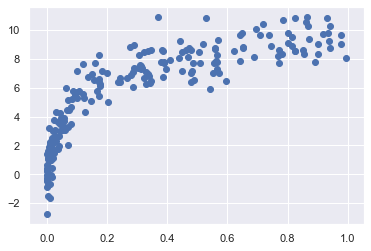

In [49]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

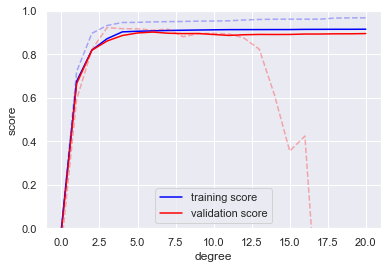

In [51]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, **once you have enough points that a particular model has converged, adding more training data will not help you!** The only way to increase model performance in this case is to use another (often more complex) model.

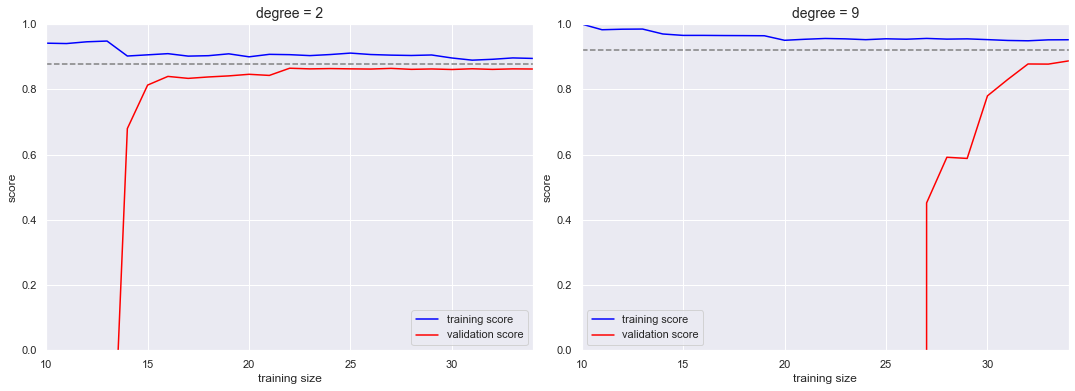

In [53]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')